In [ ]:
from sklearn.utils import shuffle  
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn

In [ ]:
test_data = pd.read_csv('original_test_data.csv')
test_data = test_data[['sentence','maslow']]
test_data.head(2)

,sentence,maslow
0,Jamies job requires her to travel a lot.She ha...,esteem
1,Andy was craving some cereal.He picked out som...,physiological


In [ ]:
test_data[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
esteem,1038
love,900
none,509
physiological,455
spiritual growth,472
stability,745


In [ ]:
test_data_need_category = test_data[test_data['maslow']!='none']
test_data_need_category.shape[0]

3610

In [ ]:
t = test_data_need_category[400:800]
from google.colab import files

t.to_excel('test_data_need_category_set_3.xlsx')
files.download('test_data_need_category_set_3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
t

,sentence,maslow
219,Phil got a job delivering newspapers on his bi...,need
220,The man tried on a fake mustache.He snuck up b...,need
221,A man wanted to increase his intelligence.He t...,need
222,Lane's dad had been in the army and he wanted ...,need
223,The man went fishing.He caught more than his l...,need
...,...,...
443,There lived a mercenary with no feelings or em...,need
444,Jackson wasn't feeling well to his stomach.His...,need
445,Julio wanted to impress the girl in his wilder...,need
446,Michael lost a tooth.,need


#### Merging

In [ ]:
annotated_needcat_test_data_1 = pd.read_excel("/content/test_data_need_category_set_1.xlsx")
annotated_needcat_test_data_2 = pd.read_excel('/content/test_data_need_category_set_2.xlsx')
annotated_needcat_test_data_3 = pd.read_excel('/content/test_data_need_category_set_3.xlsx')
annotated_needcat_test_data = pd.concat([annotated_needcat_test_data_1,annotated_needcat_test_data_2,annotated_needcat_test_data_3])
annotated_needcat_test_data = shuffle(annotated_needcat_test_data)
annotated_needcat_test_data['maslow'] = annotated_needcat_test_data['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['need','need','need','need','need'])
annotated_needcat_test_data['our'] = annotated_needcat_test_data['our'].replace([0,1],['need','no need'])

In [ ]:
annotated_needcat_test_data.head()

,Unnamed: 0,sentence,maslow,our,annotator
180,197,Sam was a car dealer.He tried to sell a car to...,need,need,ajinkya
6,9,Lily was flying alone for the first time.,need,no need,ajinkya
88,318,Cassie's Mom packed her lunch and wave her off...,need,need,anish
148,163,Lucy and her mother were hunting for a movie t...,need,need,ajinkya
41,267,"My dog, Ninja, likes to run in our small yard....",need,need,anish


In [ ]:
annotated_needcat_test_data[['maslow','sentence','our','annotator']].groupby(['maslow','annotator','our']).count()

sentence
maslow annotator our              
need   ajinkya   need          176
                 no need        24
       anish     need          192
                 no need         8
       gurudeep  need          184
                 no need        15

In [ ]:
lb = LabelEncoder() 
annotated_needcat_test_data['maslowLabel'] = lb.fit_transform(annotated_needcat_test_data['maslow'])
annotated_needcat_test_data['ourlabel'] = lb.fit_transform(annotated_needcat_test_data['our']) 

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
uniqueClassesMaslowLabel2 = list(annotated_needcat_test_data['maslow'].unique())
uniqueClassesMaslow2 = list(annotated_needcat_test_data['maslowLabel'].unique())
uniqueClassesMaslowLabel2 = ['need','no need']
uniqueClassesMaslow2 = [0,1]
print(uniqueClassesMaslowLabel2)
print(uniqueClassesMaslow2)

['need', 'no need']
[0, 1]


In [ ]:
integer_label = annotated_needcat_test_data['maslowLabel']
review_predictions2 = annotated_needcat_test_data['ourlabel']

[[552   0]
 [ 47   0]]


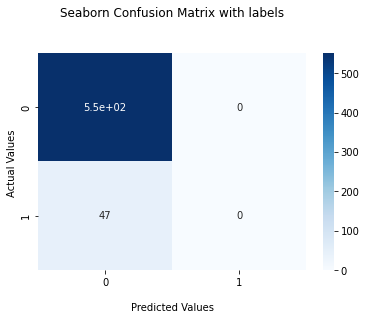

In [ ]:
from sklearn.metrics import confusion_matrix
r2 = confusion_matrix(review_predictions2, integer_label)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in long_scalars


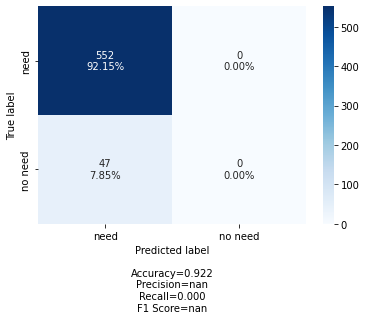

In [ ]:
make_confusion_matrix(r2, group_names=uniqueClassesMaslow2, categories=uniqueClassesMaslowLabel2, cmap='Blues')

#### BERT

https://www.youtube.com/watch?v=RgpANRh44ao

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

In [ ]:
df_train = pd.read_csv('original_train_data.csv')
df_test = pd.read_csv('original_test_data.csv')
df_test = df_test[df_test['maslow']!='none']
df_train = df_train[df_train['maslow']!='none']
df_test = df_test[['sentence','maslow']]
df_train = df_train[['sentence','maslow']]
df_full = pd.concat([df_train,df_test],axis = 0)
df_full

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,physiological
2,The family shared a basket of fries.The son at...,physiological
3,Poppy started going to dance school.She knew s...,stability
4,Our neighbor Tracy has a boy and a girl in ele...,love
5,Sarah found herself easily distracted.She felt...,esteem
...,...,...
4112,Gina was crying because she couldn't find her ...,love
4113,Alison was playing in the park.She started pla...,physiological
4114,Candy heard that her very favorite band was pl...,esteem
4115,"Morgan loved riding her bicycle.One day, she r...",stability


In [ ]:
df_full['maslow'] = df_full['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])

In [ ]:
!pip install text_hammer
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.6 MB/s 
     |████████████████████████████████| 6.6 MB 47.2 MB/s 
     |████████████████████████████████| 120 kB 64.2 MB/s 


In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook 
import text_hammer as th
tqdm_notebook.pandas()

def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)
df_cleaned = text_preprocessing(df_full,'sentence')

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

  0%|          | 0/18050 [00:00<?, ?it/s]

In [ ]:
df_cleaned.head()

,sentence,maslow
0,melissa never drank winemelissa broke up with ...,basic_needs
2,the family shared a basket of friesthe son ate...,basic_needs
3,poppy started going to dance schoolshe knew sh...,basic_needs
4,our neighbor tracy has a boy and a girl in ele...,basic_needs
5,sarah found herself easily distractedshe felt ...,advanced_needs


In [ ]:
df_cleaned = df_cleaned.copy()

In [ ]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))
df_cleaned.head()

,sentence,maslow,num_words
0,melissa never drank winemelissa broke up with ...,basic_needs,18
2,the family shared a basket of friesthe son ate...,basic_needs,21
3,poppy started going to dance schoolshe knew sh...,basic_needs,27
4,our neighbor tracy has a boy and a girl in ele...,basic_needs,25
5,sarah found herself easily distractedshe felt ...,advanced_needs,28


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 4118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   18050 non-null  object
 1   maslow     18050 non-null  object
 2   num_words  18050 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 564.1+ KB


In [ ]:
df_cleaned['maslow'] = df_cleaned.maslow.astype('category')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18050 entries, 0 to 4118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sentence   18050 non-null  object  
 1   maslow     18050 non-null  category
 2   num_words  18050 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 440.8+ KB


In [ ]:
print(df_cleaned.maslow.unique())

['basic_needs', 'advanced_needs']
Categories (2, object): ['advanced_needs', 'basic_needs']


In [ ]:
df_cleaned.maslow

0          basic_needs
2          basic_needs
3          basic_needs
4          basic_needs
5       advanced_needs
             ...      
4112       basic_needs
4113       basic_needs
4114    advanced_needs
4115       basic_needs
4118       basic_needs
Name: maslow, Length: 18050, dtype: category
Categories (2, object): ['advanced_needs', 'basic_needs']

In [ ]:
print(df_cleaned.maslow.cat.codes)

0       1
2       1
3       1
4       1
5       0
       ..
4112    1
4113    1
4114    0
4115    1
4118    1
Length: 18050, dtype: int8


In [ ]:
#encoded_dict = {'esteem':0, 'love':1, 'none':2, 'physiological':3, 'spiritual growth':4, 'stability':5}
encoded_dict = {'advanced_needs':0, 'basic_needs':1}
df_cleaned['maslow'] = df_cleaned.maslow.cat.codes
df_cleaned.maslow

0       1
2       1
3       1
4       1
5       0
       ..
4112    1
4113    1
4114    0
4115    1
4118    1
Name: maslow, Length: 18050, dtype: int8

In [ ]:
df_cleaned.head()

,sentence,maslow,num_words
0,melissa never drank winemelissa broke up with ...,1,18
2,the family shared a basket of friesthe son ate...,1,21
3,poppy started going to dance schoolshe knew sh...,1,27
4,our neighbor tracy has a boy and a girl in ele...,1,25
5,sarah found herself easily distractedshe felt ...,0,28


In [ ]:
df_cleaned.num_words.max()

67

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_cleaned, test_size = 0.2, random_state = 0, stratify = df_cleaned.maslow)
print(data_train.shape)
print(data_test.shape)

(14440, 3)
(3610, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical
to_categorical(data_train.maslow)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#tokenizer.save_pretrained('bert-tokenizer')
#bert.save_pretrained('bert-model')

In [ ]:
#import shutil 
#shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
#shutil.make_archive('bert-model','zip','bert-model')

In [ ]:
#from transformers import BertTokenizer, TFBertModel, BertConfig, TFDistilBertModel, DistilBertTokenizer, DistilBertConfig
#dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [ ]:
x_train

{'input_ids': <tf.Tensor: shape=(14440, 70), dtype=int32, numpy=
array([[  101,  4551,  1125, ...,     0,     0,     0],
       [  101,   179,  2225, ...,     0,     0,     0],
       [  101,  1122,  1108, ...,     0,     0,     0],
       ...,
       [  101, 21718,  1306, ...,     0,     0,     0],
       [  101,  1141,  2303, ...,     0,     0,     0],
       [  101,   180,  6348, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(14440, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
x_test

{'input_ids': <tf.Tensor: shape=(3610, 70), dtype=int32, numpy=
array([[  101,   179, 10559, ...,     0,     0,     0],
       [  101,   175, 14687, ...,     0,     0,     0],
       [  101,  1143,  1233, ...,     0,     0,     0],
       ...,
       [  101,   178, 18791, ...,     0,     0,     0],
       [  101,   176,  1874, ...,     0,     0,     0],
       [  101, 10801,  1253, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3610, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf 
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
max_len = 70 
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(2, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

In [ ]:
model.layers

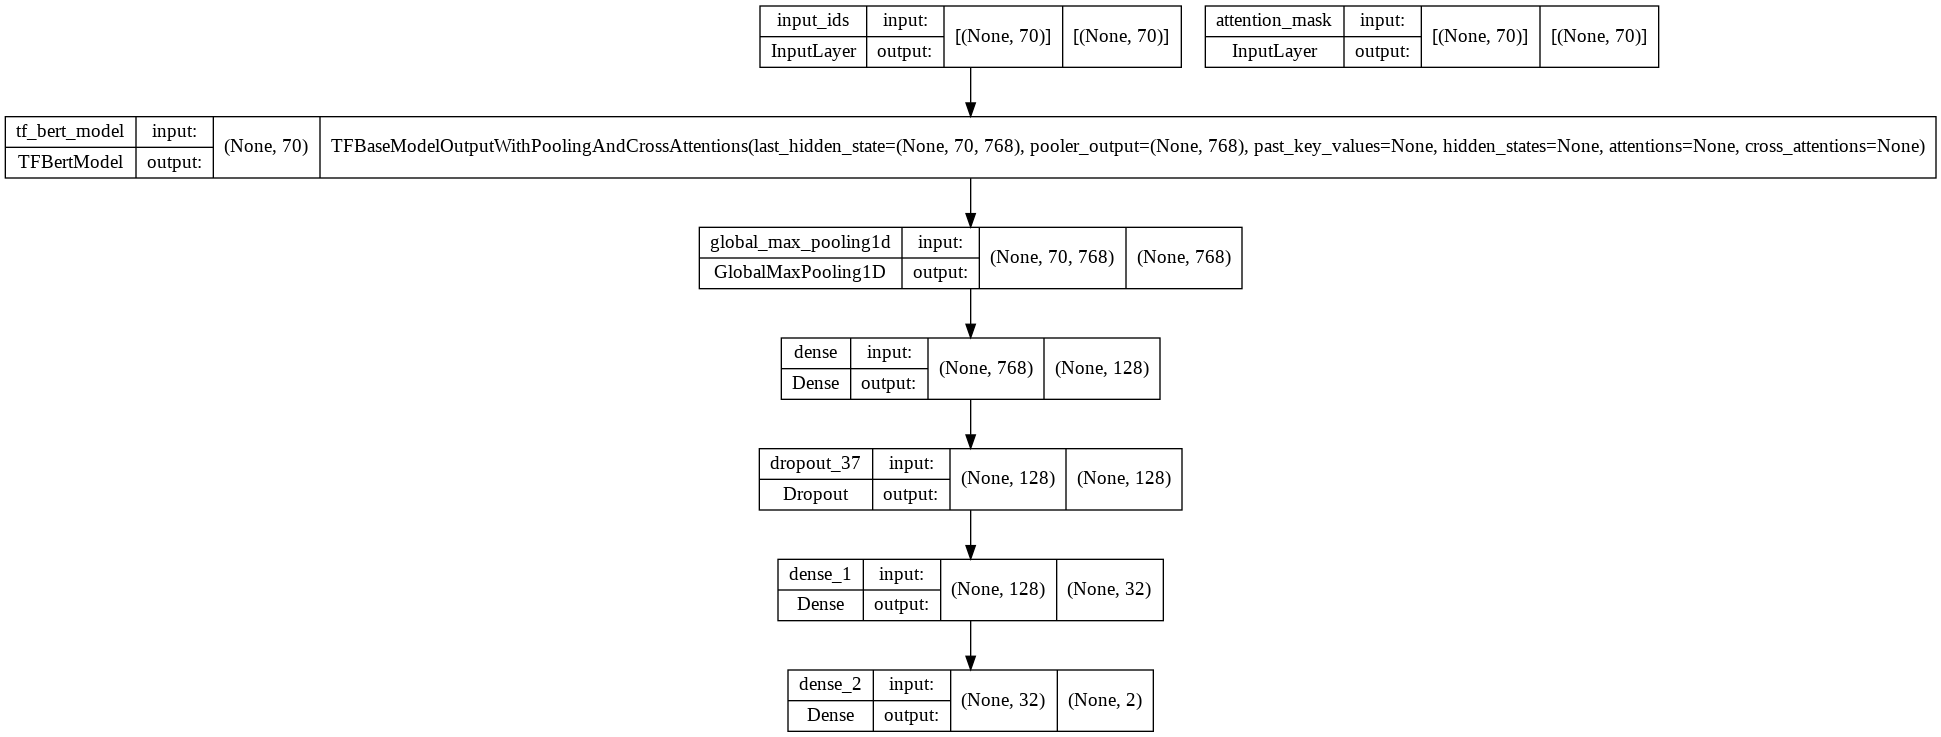

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)

#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


  1/402 [..............................] - ETA: 16:08 - loss: 0.6674 - balanced_accuracy: 0.7222

  2/402 [..............................] - ETA: 4:44 - loss: 0.6301 - balanced_accuracy: 0.7083 

  3/402 [..............................] - ETA: 4:51 - loss: 0.6390 - balanced_accuracy: 0.6667

  4/402 [..............................] - ETA: 4:50 - loss: 0.6518 - balanced_accuracy: 0.6250

  5/402 [..............................] - ETA: 4:47 - loss: 0.6450 - balanced_accuracy: 0.6333

  6/402 [..............................] - ETA: 4:47 - loss: 0.6518 - balanced_accuracy: 0.6343

  7/402 [..............................] - ETA: 4:46 - loss: 0.6502 - balanced_accuracy: 0.6270

  8/402 [..............................] - ETA: 4:46 - loss: 0.6564 - balanced_accuracy: 0.6146

  9/402 [..............................] - ETA: 4:44 - loss: 0.6559 - balanced_accuracy: 0.6265

 10/402 [..............................] - ETA: 4:44 - loss: 0.6662 - balanced_accuracy: 0.6083

 11/402 [..............................] - ETA: 4:43 - loss: 0.6656 - balanced_accuracy: 0.6086

 12/402 [..............................] - ETA: 4:43 - loss: 0.6705 - balanced_accuracy: 0.5995

 13/402 [..............................] - ETA: 4:42 - loss: 0.6690 - balanced_accuracy: 0.6026

 14/402 [>.............................] - ETA: 4:42 - loss: 0.6690 - balanced_accuracy: 0.6032

 15/402 [>.............................] - ETA: 4:41 - loss: 0.6682 - balanced_accuracy: 0.6037

 16/402 [>.............................] - ETA: 4:40 - loss: 0.6676 - balanced_accuracy: 0.5990

 17/402 [>.............................] - ETA: 4:40 - loss: 0.6727 - balanced_accuracy: 0.5915

 18/402 [>.............................] - ETA: 4:39 - loss: 0.6734 - balanced_accuracy: 0.5895

 19/402 [>.............................] - ETA: 4:39 - loss: 0.6757 - balanced_accuracy: 0.5848

 20/402 [>.............................] - ETA: 4:38 - loss: 0.6723 - balanced_accuracy: 0.5861

 21/402 [>.............................] - ETA: 4:37 - loss: 0.6724 - balanced_accuracy: 0.5873

 22/402 [>.............................] - ETA: 4:36 - loss: 0.6765 - balanced_accuracy: 0.5859

 23/402 [>.............................] - ETA: 4:36 - loss: 0.6744 - balanced_accuracy: 0.5882

 24/402 [>.............................] - ETA: 4:35 - loss: 0.6737 - balanced_accuracy: 0.5891

 25/402 [>.............................] - ETA: 4:34 - loss: 0.6713 - balanced_accuracy: 0.5900

 26/402 [>.............................] - ETA: 4:33 - loss: 0.6708 - balanced_accuracy: 0.5929

 27/402 [=>............................] - ETA: 4:33 - loss: 0.6708 - balanced_accuracy: 0.5916

 28/402 [=>............................] - ETA: 4:32 - loss: 0.6681 - balanced_accuracy: 0.5962

 29/402 [=>............................] - ETA: 4:31 - loss: 0.6648 - balanced_accuracy: 0.6034

 30/402 [=>............................] - ETA: 4:30 - loss: 0.6616 - balanced_accuracy: 0.6074

 31/402 [=>............................] - ETA: 4:30 - loss: 0.6619 - balanced_accuracy: 0.6075

 32/402 [=>............................] - ETA: 4:29 - loss: 0.6618 - balanced_accuracy: 0.6085

 33/402 [=>............................] - ETA: 4:28 - loss: 0.6551 - balanced_accuracy: 0.6145

 34/402 [=>............................] - ETA: 4:28 - loss: 0.6529 - balanced_accuracy: 0.6185

 35/402 [=>............................] - ETA: 4:27 - loss: 0.6479 - balanced_accuracy: 0.6246

 36/402 [=>............................] - ETA: 4:26 - loss: 0.6449 - balanced_accuracy: 0.6265

 37/402 [=>............................] - ETA: 4:28 - loss: 0.6484 - balanced_accuracy: 0.6246

 38/402 [=>............................] - ETA: 4:30 - loss: 0.6490 - balanced_accuracy: 0.6250

 39/402 [=>............................] - ETA: 4:31 - loss: 0.6490 - balanced_accuracy: 0.6239

 40/402 [=>............................] - ETA: 4:32 - loss: 0.6485 - balanced_accuracy: 0.6236

 41/402 [==>...........................] - ETA: 4:31 - loss: 0.6471 - balanced_accuracy: 0.6260

 42/402 [==>...........................] - ETA: 4:30 - loss: 0.6477 - balanced_accuracy: 0.6230

 43/402 [==>...........................] - ETA: 4:29 - loss: 0.6486 - balanced_accuracy: 0.6227

 44/402 [==>...........................] - ETA: 4:29 - loss: 0.6473 - balanced_accuracy: 0.6244

 45/402 [==>...........................] - ETA: 4:28 - loss: 0.6465 - balanced_accuracy: 0.6235

 46/402 [==>...........................] - ETA: 4:27 - loss: 0.6463 - balanced_accuracy: 0.6232

 47/402 [==>...........................] - ETA: 4:26 - loss: 0.6463 - balanced_accuracy: 0.6235

 48/402 [==>...........................] - ETA: 4:25 - loss: 0.6461 - balanced_accuracy: 0.6244

 49/402 [==>...........................] - ETA: 4:24 - loss: 0.6429 - balanced_accuracy: 0.6276

 50/402 [==>...........................] - ETA: 4:24 - loss: 0.6442 - balanced_accuracy: 0.6267

 51/402 [==>...........................] - ETA: 4:23 - loss: 0.6422 - balanced_accuracy: 0.6296

 52/402 [==>...........................] - ETA: 4:22 - loss: 0.6411 - balanced_accuracy: 0.6314

 53/402 [==>...........................] - ETA: 4:21 - loss: 0.6396 - balanced_accuracy: 0.6342

 54/402 [===>..........................] - ETA: 4:20 - loss: 0.6383 - balanced_accuracy: 0.6343

 55/402 [===>..........................] - ETA: 4:19 - loss: 0.6378 - balanced_accuracy: 0.6354

 56/402 [===>..........................] - ETA: 4:19 - loss: 0.6362 - balanced_accuracy: 0.6364

 57/402 [===>..........................] - ETA: 4:18 - loss: 0.6353 - balanced_accuracy: 0.6369

 58/402 [===>..........................] - ETA: 4:17 - loss: 0.6343 - balanced_accuracy: 0.6365

 59/402 [===>..........................] - ETA: 4:16 - loss: 0.6332 - balanced_accuracy: 0.6379

 60/402 [===>..........................] - ETA: 4:15 - loss: 0.6331 - balanced_accuracy: 0.6389

 61/402 [===>..........................] - ETA: 4:15 - loss: 0.6316 - balanced_accuracy: 0.6393

 62/402 [===>..........................] - ETA: 4:14 - loss: 0.6315 - balanced_accuracy: 0.6384

 63/402 [===>..........................] - ETA: 4:13 - loss: 0.6300 - balanced_accuracy: 0.6411

 64/402 [===>..........................] - ETA: 4:12 - loss: 0.6278 - balanced_accuracy: 0.6428

 65/402 [===>..........................] - ETA: 4:11 - loss: 0.6275 - balanced_accuracy: 0.6436

 66/402 [===>..........................] - ETA: 4:10 - loss: 0.6269 - balanced_accuracy: 0.6435

 67/402 [====>.........................] - ETA: 4:10 - loss: 0.6257 - balanced_accuracy: 0.6459

 68/402 [====>.........................] - ETA: 4:09 - loss: 0.6248 - balanced_accuracy: 0.6467

 69/402 [====>.........................] - ETA: 4:08 - loss: 0.6260 - balanced_accuracy: 0.6469

 70/402 [====>.........................] - ETA: 4:07 - loss: 0.6242 - balanced_accuracy: 0.6492

 71/402 [====>.........................] - ETA: 4:06 - loss: 0.6233 - balanced_accuracy: 0.6510

 72/402 [====>.........................] - ETA: 4:06 - loss: 0.6228 - balanced_accuracy: 0.6508

 73/402 [====>.........................] - ETA: 4:07 - loss: 0.6228 - balanced_accuracy: 0.6511

 74/402 [====>.........................] - ETA: 4:06 - loss: 0.6220 - balanced_accuracy: 0.6520

 75/402 [====>.........................] - ETA: 4:06 - loss: 0.6215 - balanced_accuracy: 0.6519

 76/402 [====>.........................] - ETA: 4:05 - loss: 0.6219 - balanced_accuracy: 0.6513

 77/402 [====>.........................] - ETA: 4:04 - loss: 0.6206 - balanced_accuracy: 0.6519

 78/402 [====>.........................] - ETA: 4:03 - loss: 0.6186 - balanced_accuracy: 0.6535

 79/402 [====>.........................] - ETA: 4:02 - loss: 0.6181 - balanced_accuracy: 0.6537

 80/402 [====>.........................] - ETA: 4:02 - loss: 0.6193 - balanced_accuracy: 0.6535

 81/402 [=====>........................] - ETA: 4:01 - loss: 0.6189 - balanced_accuracy: 0.6540

 82/402 [=====>........................] - ETA: 4:00 - loss: 0.6186 - balanced_accuracy: 0.6541

 83/402 [=====>........................] - ETA: 3:59 - loss: 0.6175 - balanced_accuracy: 0.6556

 84/402 [=====>........................] - ETA: 3:58 - loss: 0.6177 - balanced_accuracy: 0.6564

 85/402 [=====>........................] - ETA: 3:58 - loss: 0.6145 - balanced_accuracy: 0.6592

 86/402 [=====>........................] - ETA: 3:57 - loss: 0.6148 - balanced_accuracy: 0.6586

 87/402 [=====>........................] - ETA: 3:56 - loss: 0.6144 - balanced_accuracy: 0.6584

 88/402 [=====>........................] - ETA: 3:55 - loss: 0.6137 - balanced_accuracy: 0.6591

 89/402 [=====>........................] - ETA: 3:54 - loss: 0.6125 - balanced_accuracy: 0.6601

 90/402 [=====>........................] - ETA: 3:54 - loss: 0.6119 - balanced_accuracy: 0.6608

 91/402 [=====>........................] - ETA: 3:53 - loss: 0.6102 - balanced_accuracy: 0.6624

 92/402 [=====>........................] - ETA: 3:52 - loss: 0.6119 - balanced_accuracy: 0.6612

 93/402 [=====>........................] - ETA: 3:51 - loss: 0.6131 - balanced_accuracy: 0.6604

 94/402 [======>.......................] - ETA: 3:50 - loss: 0.6110 - balanced_accuracy: 0.6622

 95/402 [======>.......................] - ETA: 3:50 - loss: 0.6095 - balanced_accuracy: 0.6635

 96/402 [======>.......................] - ETA: 3:49 - loss: 0.6092 - balanced_accuracy: 0.6644

 97/402 [======>.......................] - ETA: 3:48 - loss: 0.6095 - balanced_accuracy: 0.6649

 98/402 [======>.......................] - ETA: 3:47 - loss: 0.6089 - balanced_accuracy: 0.6655

 99/402 [======>.......................] - ETA: 3:47 - loss: 0.6095 - balanced_accuracy: 0.6655

100/402 [======>.......................] - ETA: 3:46 - loss: 0.6080 - balanced_accuracy: 0.6669

101/402 [======>.......................] - ETA: 3:45 - loss: 0.6075 - balanced_accuracy: 0.6678

102/402 [======>.......................] - ETA: 3:44 - loss: 0.6077 - balanced_accuracy: 0.6678

103/402 [======>.......................] - ETA: 3:43 - loss: 0.6075 - balanced_accuracy: 0.6675

104/402 [======>.......................] - ETA: 3:43 - loss: 0.6064 - balanced_accuracy: 0.6683

105/402 [======>.......................] - ETA: 3:42 - loss: 0.6062 - balanced_accuracy: 0.6685

106/402 [======>.......................] - ETA: 3:41 - loss: 0.6048 - balanced_accuracy: 0.6698

107/402 [======>.......................] - ETA: 3:40 - loss: 0.6042 - balanced_accuracy: 0.6708

108/402 [=======>......................] - ETA: 3:40 - loss: 0.6033 - balanced_accuracy: 0.6718

109/402 [=======>......................] - ETA: 3:39 - loss: 0.6017 - balanced_accuracy: 0.6728

110/402 [=======>......................] - ETA: 3:38 - loss: 0.6019 - balanced_accuracy: 0.6732

111/402 [=======>......................] - ETA: 3:37 - loss: 0.6009 - balanced_accuracy: 0.6737

112/402 [=======>......................] - ETA: 3:36 - loss: 0.6002 - balanced_accuracy: 0.6739

113/402 [=======>......................] - ETA: 3:36 - loss: 0.6008 - balanced_accuracy: 0.6738

114/402 [=======>......................] - ETA: 3:35 - loss: 0.6013 - balanced_accuracy: 0.6737

115/402 [=======>......................] - ETA: 3:34 - loss: 0.6017 - balanced_accuracy: 0.6737

116/402 [=======>......................] - ETA: 3:33 - loss: 0.6000 - balanced_accuracy: 0.6750

117/402 [=======>......................] - ETA: 3:33 - loss: 0.5990 - balanced_accuracy: 0.6759

118/402 [=======>......................] - ETA: 3:32 - loss: 0.5976 - balanced_accuracy: 0.6773

119/402 [=======>......................] - ETA: 3:31 - loss: 0.5970 - balanced_accuracy: 0.6781

120/402 [=======>......................] - ETA: 3:30 - loss: 0.5966 - balanced_accuracy: 0.6782

121/402 [========>.....................] - ETA: 3:30 - loss: 0.5968 - balanced_accuracy: 0.6781

122/402 [========>.....................] - ETA: 3:29 - loss: 0.5974 - balanced_accuracy: 0.6778

123/402 [========>.....................] - ETA: 3:28 - loss: 0.5973 - balanced_accuracy: 0.6780

124/402 [========>.....................] - ETA: 3:27 - loss: 0.5970 - balanced_accuracy: 0.6785

125/402 [========>.....................] - ETA: 3:27 - loss: 0.5956 - balanced_accuracy: 0.6798

126/402 [========>.....................] - ETA: 3:26 - loss: 0.5956 - balanced_accuracy: 0.6797

127/402 [========>.....................] - ETA: 3:25 - loss: 0.5954 - balanced_accuracy: 0.6800

128/402 [========>.....................] - ETA: 3:25 - loss: 0.5957 - balanced_accuracy: 0.6793

129/402 [========>.....................] - ETA: 3:24 - loss: 0.5949 - balanced_accuracy: 0.6800

130/402 [========>.....................] - ETA: 3:23 - loss: 0.5938 - balanced_accuracy: 0.6810

131/402 [========>.....................] - ETA: 3:23 - loss: 0.5931 - balanced_accuracy: 0.6819

132/402 [========>.....................] - ETA: 3:22 - loss: 0.5930 - balanced_accuracy: 0.6822

133/402 [========>.....................] - ETA: 3:21 - loss: 0.5917 - balanced_accuracy: 0.6827

134/402 [=========>....................] - ETA: 3:20 - loss: 0.5922 - balanced_accuracy: 0.6820

135/402 [=========>....................] - ETA: 3:20 - loss: 0.5916 - balanced_accuracy: 0.6823

136/402 [=========>....................] - ETA: 3:19 - loss: 0.5906 - balanced_accuracy: 0.6832

137/402 [=========>....................] - ETA: 3:18 - loss: 0.5907 - balanced_accuracy: 0.6831

138/402 [=========>....................] - ETA: 3:17 - loss: 0.5909 - balanced_accuracy: 0.6828

139/402 [=========>....................] - ETA: 3:17 - loss: 0.5911 - balanced_accuracy: 0.6829

140/402 [=========>....................] - ETA: 3:16 - loss: 0.5902 - balanced_accuracy: 0.6841

141/402 [=========>....................] - ETA: 3:15 - loss: 0.5894 - balanced_accuracy: 0.6846

142/402 [=========>....................] - ETA: 3:14 - loss: 0.5888 - balanced_accuracy: 0.6845

143/402 [=========>....................] - ETA: 3:14 - loss: 0.5886 - balanced_accuracy: 0.6849

144/402 [=========>....................] - ETA: 3:13 - loss: 0.5879 - balanced_accuracy: 0.6854

145/402 [=========>....................] - ETA: 3:12 - loss: 0.5886 - balanced_accuracy: 0.6851

146/402 [=========>....................] - ETA: 3:11 - loss: 0.5891 - balanced_accuracy: 0.6849

147/402 [=========>....................] - ETA: 3:10 - loss: 0.5883 - balanced_accuracy: 0.6856

148/402 [==========>...................] - ETA: 3:10 - loss: 0.5882 - balanced_accuracy: 0.6858

149/402 [==========>...................] - ETA: 3:09 - loss: 0.5886 - balanced_accuracy: 0.6853

150/402 [==========>...................] - ETA: 3:08 - loss: 0.5885 - balanced_accuracy: 0.6856

151/402 [==========>...................] - ETA: 3:07 - loss: 0.5882 - balanced_accuracy: 0.6852

152/402 [==========>...................] - ETA: 3:07 - loss: 0.5879 - balanced_accuracy: 0.6857

153/402 [==========>...................] - ETA: 3:06 - loss: 0.5878 - balanced_accuracy: 0.6857

154/402 [==========>...................] - ETA: 3:05 - loss: 0.5868 - balanced_accuracy: 0.6863

155/402 [==========>...................] - ETA: 3:04 - loss: 0.5862 - balanced_accuracy: 0.6867

156/402 [==========>...................] - ETA: 3:04 - loss: 0.5858 - balanced_accuracy: 0.6873

157/402 [==========>...................] - ETA: 3:03 - loss: 0.5849 - balanced_accuracy: 0.6884

158/402 [==========>...................] - ETA: 3:02 - loss: 0.5851 - balanced_accuracy: 0.6883

159/402 [==========>...................] - ETA: 3:02 - loss: 0.5845 - balanced_accuracy: 0.6887

160/402 [==========>...................] - ETA: 3:01 - loss: 0.5839 - balanced_accuracy: 0.6894

161/402 [===========>..................] - ETA: 3:00 - loss: 0.5839 - balanced_accuracy: 0.6894

162/402 [===========>..................] - ETA: 2:59 - loss: 0.5834 - balanced_accuracy: 0.6896

163/402 [===========>..................] - ETA: 2:59 - loss: 0.5845 - balanced_accuracy: 0.6881

164/402 [===========>..................] - ETA: 2:58 - loss: 0.5839 - balanced_accuracy: 0.6889

165/402 [===========>..................] - ETA: 2:57 - loss: 0.5839 - balanced_accuracy: 0.6887

166/402 [===========>..................] - ETA: 2:56 - loss: 0.5831 - balanced_accuracy: 0.6893

167/402 [===========>..................] - ETA: 2:56 - loss: 0.5830 - balanced_accuracy: 0.6891

168/402 [===========>..................] - ETA: 2:55 - loss: 0.5834 - balanced_accuracy: 0.6887

169/402 [===========>..................] - ETA: 2:54 - loss: 0.5835 - balanced_accuracy: 0.6884

170/402 [===========>..................] - ETA: 2:53 - loss: 0.5828 - balanced_accuracy: 0.6892

171/402 [===========>..................] - ETA: 2:53 - loss: 0.5831 - balanced_accuracy: 0.6889

172/402 [===========>..................] - ETA: 2:52 - loss: 0.5823 - balanced_accuracy: 0.6898

173/402 [===========>..................] - ETA: 2:51 - loss: 0.5821 - balanced_accuracy: 0.6896

174/402 [===========>..................] - ETA: 2:50 - loss: 0.5825 - balanced_accuracy: 0.6893

175/402 [============>.................] - ETA: 2:50 - loss: 0.5828 - balanced_accuracy: 0.6895

176/402 [============>.................] - ETA: 2:49 - loss: 0.5829 - balanced_accuracy: 0.6896

177/402 [============>.................] - ETA: 2:48 - loss: 0.5827 - balanced_accuracy: 0.6902

178/402 [============>.................] - ETA: 2:47 - loss: 0.5825 - balanced_accuracy: 0.6904

179/402 [============>.................] - ETA: 2:47 - loss: 0.5828 - balanced_accuracy: 0.6899

180/402 [============>.................] - ETA: 2:46 - loss: 0.5826 - balanced_accuracy: 0.6906

181/402 [============>.................] - ETA: 2:45 - loss: 0.5828 - balanced_accuracy: 0.6903

182/402 [============>.................] - ETA: 2:44 - loss: 0.5824 - balanced_accuracy: 0.6911

183/402 [============>.................] - ETA: 2:44 - loss: 0.5818 - balanced_accuracy: 0.6917

184/402 [============>.................] - ETA: 2:43 - loss: 0.5818 - balanced_accuracy: 0.6914

185/402 [============>.................] - ETA: 2:42 - loss: 0.5814 - balanced_accuracy: 0.6917

186/402 [============>.................] - ETA: 2:41 - loss: 0.5815 - balanced_accuracy: 0.6922

187/402 [============>.................] - ETA: 2:41 - loss: 0.5816 - balanced_accuracy: 0.6924

188/402 [=============>................] - ETA: 2:40 - loss: 0.5810 - balanced_accuracy: 0.6933

189/402 [=============>................] - ETA: 2:39 - loss: 0.5805 - balanced_accuracy: 0.6939

190/402 [=============>................] - ETA: 2:38 - loss: 0.5802 - balanced_accuracy: 0.6942

191/402 [=============>................] - ETA: 2:38 - loss: 0.5792 - balanced_accuracy: 0.6950

192/402 [=============>................] - ETA: 2:37 - loss: 0.5792 - balanced_accuracy: 0.6952

193/402 [=============>................] - ETA: 2:36 - loss: 0.5791 - balanced_accuracy: 0.6953

194/402 [=============>................] - ETA: 2:36 - loss: 0.5794 - balanced_accuracy: 0.6953

195/402 [=============>................] - ETA: 2:35 - loss: 0.5790 - balanced_accuracy: 0.6956

196/402 [=============>................] - ETA: 2:34 - loss: 0.5797 - balanced_accuracy: 0.6949

197/402 [=============>................] - ETA: 2:33 - loss: 0.5788 - balanced_accuracy: 0.6959

198/402 [=============>................] - ETA: 2:33 - loss: 0.5778 - balanced_accuracy: 0.6964

199/402 [=============>................] - ETA: 2:32 - loss: 0.5771 - balanced_accuracy: 0.6967

200/402 [=============>................] - ETA: 2:31 - loss: 0.5769 - balanced_accuracy: 0.6968

201/402 [==============>...............] - ETA: 2:30 - loss: 0.5763 - balanced_accuracy: 0.6973

202/402 [==============>...............] - ETA: 2:30 - loss: 0.5765 - balanced_accuracy: 0.6972

203/402 [==============>...............] - ETA: 2:29 - loss: 0.5764 - balanced_accuracy: 0.6973

204/402 [==============>...............] - ETA: 2:28 - loss: 0.5768 - balanced_accuracy: 0.6973

205/402 [==============>...............] - ETA: 2:27 - loss: 0.5762 - balanced_accuracy: 0.6974

206/402 [==============>...............] - ETA: 2:27 - loss: 0.5766 - balanced_accuracy: 0.6974

207/402 [==============>...............] - ETA: 2:26 - loss: 0.5768 - balanced_accuracy: 0.6973

208/402 [==============>...............] - ETA: 2:25 - loss: 0.5766 - balanced_accuracy: 0.6972

209/402 [==============>...............] - ETA: 2:24 - loss: 0.5764 - balanced_accuracy: 0.6975

210/402 [==============>...............] - ETA: 2:24 - loss: 0.5757 - balanced_accuracy: 0.6980

211/402 [==============>...............] - ETA: 2:23 - loss: 0.5757 - balanced_accuracy: 0.6976

212/402 [==============>...............] - ETA: 2:22 - loss: 0.5755 - balanced_accuracy: 0.6979

213/402 [==============>...............] - ETA: 2:21 - loss: 0.5750 - balanced_accuracy: 0.6984

214/402 [==============>...............] - ETA: 2:21 - loss: 0.5746 - balanced_accuracy: 0.6986

215/402 [===============>..............] - ETA: 2:20 - loss: 0.5742 - balanced_accuracy: 0.6992

216/402 [===============>..............] - ETA: 2:19 - loss: 0.5744 - balanced_accuracy: 0.6991

217/402 [===============>..............] - ETA: 2:19 - loss: 0.5740 - balanced_accuracy: 0.6993

218/402 [===============>..............] - ETA: 2:18 - loss: 0.5734 - balanced_accuracy: 0.6998

219/402 [===============>..............] - ETA: 2:17 - loss: 0.5733 - balanced_accuracy: 0.6998

220/402 [===============>..............] - ETA: 2:16 - loss: 0.5731 - balanced_accuracy: 0.6996

221/402 [===============>..............] - ETA: 2:16 - loss: 0.5731 - balanced_accuracy: 0.6992

222/402 [===============>..............] - ETA: 2:15 - loss: 0.5727 - balanced_accuracy: 0.6993

223/402 [===============>..............] - ETA: 2:14 - loss: 0.5722 - balanced_accuracy: 0.7000

224/402 [===============>..............] - ETA: 2:13 - loss: 0.5719 - balanced_accuracy: 0.7003

225/402 [===============>..............] - ETA: 2:13 - loss: 0.5720 - balanced_accuracy: 0.7002

226/402 [===============>..............] - ETA: 2:12 - loss: 0.5718 - balanced_accuracy: 0.7003

227/402 [===============>..............] - ETA: 2:11 - loss: 0.5713 - balanced_accuracy: 0.7003

228/402 [================>.............] - ETA: 2:10 - loss: 0.5716 - balanced_accuracy: 0.7002

229/402 [================>.............] - ETA: 2:10 - loss: 0.5716 - balanced_accuracy: 0.7004

230/402 [================>.............] - ETA: 2:09 - loss: 0.5714 - balanced_accuracy: 0.7004

231/402 [================>.............] - ETA: 2:08 - loss: 0.5714 - balanced_accuracy: 0.7005

232/402 [================>.............] - ETA: 2:07 - loss: 0.5714 - balanced_accuracy: 0.7006

233/402 [================>.............] - ETA: 2:07 - loss: 0.5707 - balanced_accuracy: 0.7016

234/402 [================>.............] - ETA: 2:06 - loss: 0.5706 - balanced_accuracy: 0.7018

235/402 [================>.............] - ETA: 2:05 - loss: 0.5705 - balanced_accuracy: 0.7019

236/402 [================>.............] - ETA: 2:04 - loss: 0.5706 - balanced_accuracy: 0.7016

237/402 [================>.............] - ETA: 2:04 - loss: 0.5700 - balanced_accuracy: 0.7022

238/402 [================>.............] - ETA: 2:03 - loss: 0.5695 - balanced_accuracy: 0.7026

239/402 [================>.............] - ETA: 2:02 - loss: 0.5687 - balanced_accuracy: 0.7032

240/402 [================>.............] - ETA: 2:01 - loss: 0.5687 - balanced_accuracy: 0.7034

241/402 [================>.............] - ETA: 2:01 - loss: 0.5682 - balanced_accuracy: 0.7036

242/402 [=================>............] - ETA: 2:00 - loss: 0.5683 - balanced_accuracy: 0.7040

243/402 [=================>............] - ETA: 1:59 - loss: 0.5678 - balanced_accuracy: 0.7043

244/402 [=================>............] - ETA: 1:58 - loss: 0.5676 - balanced_accuracy: 0.7045

245/402 [=================>............] - ETA: 1:58 - loss: 0.5672 - balanced_accuracy: 0.7045

246/402 [=================>............] - ETA: 1:57 - loss: 0.5670 - balanced_accuracy: 0.7051

247/402 [=================>............] - ETA: 1:56 - loss: 0.5670 - balanced_accuracy: 0.7052

248/402 [=================>............] - ETA: 1:55 - loss: 0.5668 - balanced_accuracy: 0.7054

249/402 [=================>............] - ETA: 1:55 - loss: 0.5668 - balanced_accuracy: 0.7052

250/402 [=================>............] - ETA: 1:54 - loss: 0.5664 - balanced_accuracy: 0.7053

251/402 [=================>............] - ETA: 1:53 - loss: 0.5675 - balanced_accuracy: 0.7048

252/402 [=================>............] - ETA: 1:52 - loss: 0.5672 - balanced_accuracy: 0.7052

253/402 [=================>............] - ETA: 1:52 - loss: 0.5678 - balanced_accuracy: 0.7048

254/402 [=================>............] - ETA: 1:51 - loss: 0.5680 - balanced_accuracy: 0.7044

255/402 [==================>...........] - ETA: 1:50 - loss: 0.5676 - balanced_accuracy: 0.7047

256/402 [==================>...........] - ETA: 1:49 - loss: 0.5668 - balanced_accuracy: 0.7053

257/402 [==================>...........] - ETA: 1:49 - loss: 0.5664 - balanced_accuracy: 0.7059

258/402 [==================>...........] - ETA: 1:48 - loss: 0.5661 - balanced_accuracy: 0.7063

259/402 [==================>...........] - ETA: 1:47 - loss: 0.5664 - balanced_accuracy: 0.7061

260/402 [==================>...........] - ETA: 1:46 - loss: 0.5662 - balanced_accuracy: 0.7064

261/402 [==================>...........] - ETA: 1:46 - loss: 0.5662 - balanced_accuracy: 0.7064

262/402 [==================>...........] - ETA: 1:45 - loss: 0.5660 - balanced_accuracy: 0.7066

263/402 [==================>...........] - ETA: 1:44 - loss: 0.5665 - balanced_accuracy: 0.7061

264/402 [==================>...........] - ETA: 1:43 - loss: 0.5665 - balanced_accuracy: 0.7062

265/402 [==================>...........] - ETA: 1:43 - loss: 0.5666 - balanced_accuracy: 0.7059

266/402 [==================>...........] - ETA: 1:42 - loss: 0.5662 - balanced_accuracy: 0.7062

267/402 [==================>...........] - ETA: 1:41 - loss: 0.5666 - balanced_accuracy: 0.7063

268/402 [===================>..........] - ETA: 1:40 - loss: 0.5665 - balanced_accuracy: 0.7062

269/402 [===================>..........] - ETA: 1:40 - loss: 0.5662 - balanced_accuracy: 0.7064

270/402 [===================>..........] - ETA: 1:39 - loss: 0.5661 - balanced_accuracy: 0.7063

271/402 [===================>..........] - ETA: 1:38 - loss: 0.5657 - balanced_accuracy: 0.7064

272/402 [===================>..........] - ETA: 1:37 - loss: 0.5657 - balanced_accuracy: 0.7063

273/402 [===================>..........] - ETA: 1:37 - loss: 0.5652 - balanced_accuracy: 0.7067

274/402 [===================>..........] - ETA: 1:36 - loss: 0.5654 - balanced_accuracy: 0.7066

275/402 [===================>..........] - ETA: 1:35 - loss: 0.5649 - balanced_accuracy: 0.7070

276/402 [===================>..........] - ETA: 1:34 - loss: 0.5648 - balanced_accuracy: 0.7069

277/402 [===================>..........] - ETA: 1:34 - loss: 0.5645 - balanced_accuracy: 0.7069

278/402 [===================>..........] - ETA: 1:33 - loss: 0.5644 - balanced_accuracy: 0.7070

279/402 [===================>..........] - ETA: 1:32 - loss: 0.5647 - balanced_accuracy: 0.7070

280/402 [===================>..........] - ETA: 1:31 - loss: 0.5639 - balanced_accuracy: 0.7077

281/402 [===================>..........] - ETA: 1:31 - loss: 0.5633 - balanced_accuracy: 0.7081

282/402 [====================>.........] - ETA: 1:30 - loss: 0.5631 - balanced_accuracy: 0.7081

283/402 [====================>.........] - ETA: 1:29 - loss: 0.5627 - balanced_accuracy: 0.7086

284/402 [====================>.........] - ETA: 1:28 - loss: 0.5628 - balanced_accuracy: 0.7086

285/402 [====================>.........] - ETA: 1:28 - loss: 0.5626 - balanced_accuracy: 0.7088

286/402 [====================>.........] - ETA: 1:27 - loss: 0.5623 - balanced_accuracy: 0.7089

287/402 [====================>.........] - ETA: 1:26 - loss: 0.5618 - balanced_accuracy: 0.7093

288/402 [====================>.........] - ETA: 1:25 - loss: 0.5619 - balanced_accuracy: 0.7091

289/402 [====================>.........] - ETA: 1:25 - loss: 0.5616 - balanced_accuracy: 0.7092

290/402 [====================>.........] - ETA: 1:24 - loss: 0.5616 - balanced_accuracy: 0.7095

291/402 [====================>.........] - ETA: 1:23 - loss: 0.5616 - balanced_accuracy: 0.7094

292/402 [====================>.........] - ETA: 1:22 - loss: 0.5618 - balanced_accuracy: 0.7092

293/402 [====================>.........] - ETA: 1:22 - loss: 0.5616 - balanced_accuracy: 0.7094

294/402 [====================>.........] - ETA: 1:21 - loss: 0.5611 - balanced_accuracy: 0.7100

295/402 [=====================>........] - ETA: 1:20 - loss: 0.5613 - balanced_accuracy: 0.7097

296/402 [=====================>........] - ETA: 1:19 - loss: 0.5615 - balanced_accuracy: 0.7098

297/402 [=====================>........] - ETA: 1:19 - loss: 0.5614 - balanced_accuracy: 0.7097

298/402 [=====================>........] - ETA: 1:18 - loss: 0.5612 - balanced_accuracy: 0.7101

299/402 [=====================>........] - ETA: 1:17 - loss: 0.5607 - balanced_accuracy: 0.7104

300/402 [=====================>........] - ETA: 1:16 - loss: 0.5606 - balanced_accuracy: 0.7106

301/402 [=====================>........] - ETA: 1:16 - loss: 0.5602 - balanced_accuracy: 0.7109

302/402 [=====================>........] - ETA: 1:15 - loss: 0.5600 - balanced_accuracy: 0.7109

303/402 [=====================>........] - ETA: 1:14 - loss: 0.5601 - balanced_accuracy: 0.7109

304/402 [=====================>........] - ETA: 1:13 - loss: 0.5599 - balanced_accuracy: 0.7112

305/402 [=====================>........] - ETA: 1:12 - loss: 0.5598 - balanced_accuracy: 0.7112

306/402 [=====================>........] - ETA: 1:12 - loss: 0.5599 - balanced_accuracy: 0.7111

307/402 [=====================>........] - ETA: 1:11 - loss: 0.5596 - balanced_accuracy: 0.7115

308/402 [=====================>........] - ETA: 1:10 - loss: 0.5598 - balanced_accuracy: 0.7112

309/402 [======================>.......] - ETA: 1:10 - loss: 0.5594 - balanced_accuracy: 0.7116

310/402 [======================>.......] - ETA: 1:09 - loss: 0.5591 - balanced_accuracy: 0.7120

311/402 [======================>.......] - ETA: 1:08 - loss: 0.5588 - balanced_accuracy: 0.7121

312/402 [======================>.......] - ETA: 1:07 - loss: 0.5584 - balanced_accuracy: 0.7127

313/402 [======================>.......] - ETA: 1:07 - loss: 0.5583 - balanced_accuracy: 0.7129

314/402 [======================>.......] - ETA: 1:06 - loss: 0.5583 - balanced_accuracy: 0.7128

315/402 [======================>.......] - ETA: 1:05 - loss: 0.5585 - balanced_accuracy: 0.7130

316/402 [======================>.......] - ETA: 1:04 - loss: 0.5581 - balanced_accuracy: 0.7132

317/402 [======================>.......] - ETA: 1:04 - loss: 0.5582 - balanced_accuracy: 0.7132

318/402 [======================>.......] - ETA: 1:03 - loss: 0.5577 - balanced_accuracy: 0.7135

319/402 [======================>.......] - ETA: 1:02 - loss: 0.5574 - balanced_accuracy: 0.7138

320/402 [======================>.......] - ETA: 1:01 - loss: 0.5570 - balanced_accuracy: 0.7141

321/402 [======================>.......] - ETA: 1:01 - loss: 0.5566 - balanced_accuracy: 0.7143

322/402 [=======================>......] - ETA: 1:00 - loss: 0.5564 - balanced_accuracy: 0.7145

323/402 [=======================>......] - ETA: 59s - loss: 0.5566 - balanced_accuracy: 0.7147 

324/402 [=======================>......] - ETA: 59s - loss: 0.5567 - balanced_accuracy: 0.7146

325/402 [=======================>......] - ETA: 58s - loss: 0.5564 - balanced_accuracy: 0.7148

326/402 [=======================>......] - ETA: 57s - loss: 0.5560 - balanced_accuracy: 0.7150

327/402 [=======================>......] - ETA: 56s - loss: 0.5559 - balanced_accuracy: 0.7151

328/402 [=======================>......] - ETA: 56s - loss: 0.5554 - balanced_accuracy: 0.7154

329/402 [=======================>......] - ETA: 55s - loss: 0.5555 - balanced_accuracy: 0.7154

330/402 [=======================>......] - ETA: 54s - loss: 0.5557 - balanced_accuracy: 0.7153

331/402 [=======================>......] - ETA: 53s - loss: 0.5554 - balanced_accuracy: 0.7155

332/402 [=======================>......] - ETA: 53s - loss: 0.5553 - balanced_accuracy: 0.7157

333/402 [=======================>......] - ETA: 52s - loss: 0.5553 - balanced_accuracy: 0.7158

334/402 [=======================>......] - ETA: 51s - loss: 0.5553 - balanced_accuracy: 0.7157

335/402 [========================>.....] - ETA: 50s - loss: 0.5549 - balanced_accuracy: 0.7160

336/402 [========================>.....] - ETA: 50s - loss: 0.5548 - balanced_accuracy: 0.7159

337/402 [========================>.....] - ETA: 49s - loss: 0.5549 - balanced_accuracy: 0.7158

338/402 [========================>.....] - ETA: 48s - loss: 0.5547 - balanced_accuracy: 0.7158

339/402 [========================>.....] - ETA: 47s - loss: 0.5545 - balanced_accuracy: 0.7161

340/402 [========================>.....] - ETA: 46s - loss: 0.5541 - balanced_accuracy: 0.7163

341/402 [========================>.....] - ETA: 46s - loss: 0.5540 - balanced_accuracy: 0.7163

342/402 [========================>.....] - ETA: 45s - loss: 0.5539 - balanced_accuracy: 0.7165

343/402 [========================>.....] - ETA: 44s - loss: 0.5533 - balanced_accuracy: 0.7170

344/402 [========================>.....] - ETA: 43s - loss: 0.5529 - balanced_accuracy: 0.7172

345/402 [========================>.....] - ETA: 43s - loss: 0.5526 - balanced_accuracy: 0.7175

346/402 [========================>.....] - ETA: 42s - loss: 0.5526 - balanced_accuracy: 0.7173

347/402 [========================>.....] - ETA: 41s - loss: 0.5528 - balanced_accuracy: 0.7172

348/402 [========================>.....] - ETA: 40s - loss: 0.5524 - balanced_accuracy: 0.7174

349/402 [=========================>....] - ETA: 40s - loss: 0.5518 - balanced_accuracy: 0.7178

350/402 [=========================>....] - ETA: 39s - loss: 0.5521 - balanced_accuracy: 0.7178

351/402 [=========================>....] - ETA: 38s - loss: 0.5518 - balanced_accuracy: 0.7179

352/402 [=========================>....] - ETA: 37s - loss: 0.5515 - balanced_accuracy: 0.7182

353/402 [=========================>....] - ETA: 37s - loss: 0.5511 - balanced_accuracy: 0.7185

354/402 [=========================>....] - ETA: 36s - loss: 0.5512 - balanced_accuracy: 0.7185

355/402 [=========================>....] - ETA: 35s - loss: 0.5509 - balanced_accuracy: 0.7188

356/402 [=========================>....] - ETA: 34s - loss: 0.5506 - balanced_accuracy: 0.7190

357/402 [=========================>....] - ETA: 34s - loss: 0.5509 - balanced_accuracy: 0.7187

358/402 [=========================>....] - ETA: 33s - loss: 0.5509 - balanced_accuracy: 0.7187

359/402 [=========================>....] - ETA: 32s - loss: 0.5506 - balanced_accuracy: 0.7190

360/402 [=========================>....] - ETA: 31s - loss: 0.5510 - balanced_accuracy: 0.7188

361/402 [=========================>....] - ETA: 31s - loss: 0.5508 - balanced_accuracy: 0.7189

362/402 [==========================>...] - ETA: 30s - loss: 0.5506 - balanced_accuracy: 0.7192

363/402 [==========================>...] - ETA: 29s - loss: 0.5501 - balanced_accuracy: 0.7195

364/402 [==========================>...] - ETA: 28s - loss: 0.5503 - balanced_accuracy: 0.7193

365/402 [==========================>...] - ETA: 28s - loss: 0.5503 - balanced_accuracy: 0.7194

366/402 [==========================>...] - ETA: 27s - loss: 0.5503 - balanced_accuracy: 0.7195

367/402 [==========================>...] - ETA: 26s - loss: 0.5503 - balanced_accuracy: 0.7194

368/402 [==========================>...] - ETA: 25s - loss: 0.5500 - balanced_accuracy: 0.7196

369/402 [==========================>...] - ETA: 24s - loss: 0.5497 - balanced_accuracy: 0.7198

370/402 [==========================>...] - ETA: 24s - loss: 0.5495 - balanced_accuracy: 0.7201

371/402 [==========================>...] - ETA: 23s - loss: 0.5493 - balanced_accuracy: 0.7201

372/402 [==========================>...] - ETA: 22s - loss: 0.5488 - balanced_accuracy: 0.7205

373/402 [==========================>...] - ETA: 21s - loss: 0.5488 - balanced_accuracy: 0.7205

374/402 [==========================>...] - ETA: 21s - loss: 0.5492 - balanced_accuracy: 0.7205

375/402 [==========================>...] - ETA: 20s - loss: 0.5487 - balanced_accuracy: 0.7208

376/402 [===========================>..] - ETA: 19s - loss: 0.5483 - balanced_accuracy: 0.7210

377/402 [===========================>..] - ETA: 18s - loss: 0.5484 - balanced_accuracy: 0.7208

378/402 [===========================>..] - ETA: 18s - loss: 0.5481 - balanced_accuracy: 0.7211

379/402 [===========================>..] - ETA: 17s - loss: 0.5480 - balanced_accuracy: 0.7213

380/402 [===========================>..] - ETA: 16s - loss: 0.5479 - balanced_accuracy: 0.7216

381/402 [===========================>..] - ETA: 15s - loss: 0.5474 - balanced_accuracy: 0.7220

382/402 [===========================>..] - ETA: 15s - loss: 0.5470 - balanced_accuracy: 0.7223

383/402 [===========================>..] - ETA: 14s - loss: 0.5468 - balanced_accuracy: 0.7225

384/402 [===========================>..] - ETA: 13s - loss: 0.5468 - balanced_accuracy: 0.7224

385/402 [===========================>..] - ETA: 12s - loss: 0.5465 - balanced_accuracy: 0.7229

386/402 [===========================>..] - ETA: 12s - loss: 0.5461 - balanced_accuracy: 0.7231

387/402 [===========================>..] - ETA: 11s - loss: 0.5462 - balanced_accuracy: 0.7230

388/402 [===========================>..] - ETA: 10s - loss: 0.5459 - balanced_accuracy: 0.7232

389/402 [============================>.] - ETA: 9s - loss: 0.5463 - balanced_accuracy: 0.7229 

390/402 [============================>.] - ETA: 9s - loss: 0.5464 - balanced_accuracy: 0.7229

391/402 [============================>.] - ETA: 8s - loss: 0.5462 - balanced_accuracy: 0.7230

392/402 [============================>.] - ETA: 7s - loss: 0.5462 - balanced_accuracy: 0.7232

393/402 [============================>.] - ETA: 6s - loss: 0.5461 - balanced_accuracy: 0.7233

394/402 [============================>.] - ETA: 6s - loss: 0.5461 - balanced_accuracy: 0.7232

395/402 [============================>.] - ETA: 5s - loss: 0.5460 - balanced_accuracy: 0.7233

396/402 [============================>.] - ETA: 4s - loss: 0.5465 - balanced_accuracy: 0.7232

397/402 [============================>.] - ETA: 3s - loss: 0.5466 - balanced_accuracy: 0.7231

398/402 [============================>.] - ETA: 3s - loss: 0.5464 - balanced_accuracy: 0.7233

399/402 [============================>.] - ETA: 2s - loss: 0.5464 - balanced_accuracy: 0.7232

400/402 [============================>.] - ETA: 1s - loss: 0.5462 - balanced_accuracy: 0.7233

401/402 [============================>.] - ETA: 0s - loss: 0.5461 - balanced_accuracy: 0.7236

402/402 [==============================] - 326s 808ms/step - loss: 0.5460 - balanced_accuracy: 0.7237 - val_loss: 0.4972 - val_balanced_accuracy: 0.7657
Epoch 2/5


  1/402 [..............................] - ETA: 5:06 - loss: 0.4712 - balanced_accuracy: 0.7778

  2/402 [..............................] - ETA: 5:01 - loss: 0.4287 - balanced_accuracy: 0.7917

  3/402 [..............................] - ETA: 5:04 - loss: 0.4053 - balanced_accuracy: 0.8241

  4/402 [..............................] - ETA: 5:03 - loss: 0.4344 - balanced_accuracy: 0.7917

  5/402 [..............................] - ETA: 5:02 - loss: 0.4611 - balanced_accuracy: 0.7889

  6/402 [..............................] - ETA: 5:01 - loss: 0.4443 - balanced_accuracy: 0.8009

  7/402 [..............................] - ETA: 5:01 - loss: 0.4493 - balanced_accuracy: 0.8016

  8/402 [..............................] - ETA: 4:59 - loss: 0.4525 - balanced_accuracy: 0.8021

  9/402 [..............................] - ETA: 4:58 - loss: 0.4434 - balanced_accuracy: 0.8148

 10/402 [..............................] - ETA: 4:57 - loss: 0.4509 - balanced_accuracy: 0.8000

 11/402 [..............................] - ETA: 4:56 - loss: 0.4504 - balanced_accuracy: 0.7980

 12/402 [..............................] - ETA: 4:55 - loss: 0.4507 - balanced_accuracy: 0.7963

 13/402 [..............................] - ETA: 4:54 - loss: 0.4446 - balanced_accuracy: 0.8013

 14/402 [>.............................] - ETA: 4:53 - loss: 0.4481 - balanced_accuracy: 0.7976

 15/402 [>.............................] - ETA: 4:53 - loss: 0.4413 - balanced_accuracy: 0.8019

 16/402 [>.............................] - ETA: 4:52 - loss: 0.4392 - balanced_accuracy: 0.8056

 17/402 [>.............................] - ETA: 4:51 - loss: 0.4387 - balanced_accuracy: 0.8072

 18/402 [>.............................] - ETA: 4:50 - loss: 0.4402 - balanced_accuracy: 0.8071

 19/402 [>.............................] - ETA: 4:49 - loss: 0.4452 - balanced_accuracy: 0.8056

 20/402 [>.............................] - ETA: 4:49 - loss: 0.4444 - balanced_accuracy: 0.8069

 21/402 [>.............................] - ETA: 4:48 - loss: 0.4451 - balanced_accuracy: 0.8042

 22/402 [>.............................] - ETA: 4:47 - loss: 0.4475 - balanced_accuracy: 0.8018

 23/402 [>.............................] - ETA: 4:46 - loss: 0.4498 - balanced_accuracy: 0.7995

 24/402 [>.............................] - ETA: 4:45 - loss: 0.4457 - balanced_accuracy: 0.8021

 25/402 [>.............................] - ETA: 4:44 - loss: 0.4505 - balanced_accuracy: 0.7989

 26/402 [>.............................] - ETA: 4:43 - loss: 0.4444 - balanced_accuracy: 0.8013

 27/402 [=>............................] - ETA: 4:42 - loss: 0.4448 - balanced_accuracy: 0.8025

 28/402 [=>............................] - ETA: 4:42 - loss: 0.4462 - balanced_accuracy: 0.8006

 29/402 [=>............................] - ETA: 4:41 - loss: 0.4509 - balanced_accuracy: 0.7979

 30/402 [=>............................] - ETA: 4:40 - loss: 0.4505 - balanced_accuracy: 0.7991

 31/402 [=>............................] - ETA: 4:39 - loss: 0.4467 - balanced_accuracy: 0.8020

 32/402 [=>............................] - ETA: 4:39 - loss: 0.4466 - balanced_accuracy: 0.8021

 33/402 [=>............................] - ETA: 4:38 - loss: 0.4494 - balanced_accuracy: 0.8013

 34/402 [=>............................] - ETA: 4:37 - loss: 0.4495 - balanced_accuracy: 0.8007

 35/402 [=>............................] - ETA: 4:36 - loss: 0.4556 - balanced_accuracy: 0.7976

 36/402 [=>............................] - ETA: 4:36 - loss: 0.4538 - balanced_accuracy: 0.7986

 37/402 [=>............................] - ETA: 4:35 - loss: 0.4522 - balanced_accuracy: 0.7988

 38/402 [=>............................] - ETA: 4:34 - loss: 0.4543 - balanced_accuracy: 0.7990

 39/402 [=>............................] - ETA: 4:33 - loss: 0.4538 - balanced_accuracy: 0.7991

 40/402 [=>............................] - ETA: 4:32 - loss: 0.4550 - balanced_accuracy: 0.7993

 41/402 [==>...........................] - ETA: 4:32 - loss: 0.4517 - balanced_accuracy: 0.8015

 42/402 [==>...........................] - ETA: 4:31 - loss: 0.4523 - balanced_accuracy: 0.7996

 43/402 [==>...........................] - ETA: 4:30 - loss: 0.4534 - balanced_accuracy: 0.7965

 44/402 [==>...........................] - ETA: 4:29 - loss: 0.4557 - balanced_accuracy: 0.7948

 45/402 [==>...........................] - ETA: 4:29 - loss: 0.4579 - balanced_accuracy: 0.7920

 46/402 [==>...........................] - ETA: 4:28 - loss: 0.4570 - balanced_accuracy: 0.7929

 47/402 [==>...........................] - ETA: 4:27 - loss: 0.4536 - balanced_accuracy: 0.7949

 48/402 [==>...........................] - ETA: 4:26 - loss: 0.4527 - balanced_accuracy: 0.7951

 49/402 [==>...........................] - ETA: 4:26 - loss: 0.4533 - balanced_accuracy: 0.7937

 50/402 [==>...........................] - ETA: 4:25 - loss: 0.4523 - balanced_accuracy: 0.7944

 51/402 [==>...........................] - ETA: 4:24 - loss: 0.4545 - balanced_accuracy: 0.7930

 52/402 [==>...........................] - ETA: 4:23 - loss: 0.4545 - balanced_accuracy: 0.7927

 53/402 [==>...........................] - ETA: 4:23 - loss: 0.4543 - balanced_accuracy: 0.7930

 54/402 [===>..........................] - ETA: 4:22 - loss: 0.4534 - balanced_accuracy: 0.7932

 55/402 [===>..........................] - ETA: 4:21 - loss: 0.4531 - balanced_accuracy: 0.7929

 56/402 [===>..........................] - ETA: 4:20 - loss: 0.4515 - balanced_accuracy: 0.7932

 57/402 [===>..........................] - ETA: 4:20 - loss: 0.4490 - balanced_accuracy: 0.7953

 58/402 [===>..........................] - ETA: 4:19 - loss: 0.4495 - balanced_accuracy: 0.7945

 59/402 [===>..........................] - ETA: 4:18 - loss: 0.4484 - balanced_accuracy: 0.7952

 60/402 [===>..........................] - ETA: 4:18 - loss: 0.4456 - balanced_accuracy: 0.7977

 61/402 [===>..........................] - ETA: 4:17 - loss: 0.4451 - balanced_accuracy: 0.7964

 62/402 [===>..........................] - ETA: 4:16 - loss: 0.4440 - balanced_accuracy: 0.7970

 63/402 [===>..........................] - ETA: 4:16 - loss: 0.4435 - balanced_accuracy: 0.7972

 64/402 [===>..........................] - ETA: 4:15 - loss: 0.4428 - balanced_accuracy: 0.7973

 65/402 [===>..........................] - ETA: 4:14 - loss: 0.4436 - balanced_accuracy: 0.7966

 66/402 [===>..........................] - ETA: 4:13 - loss: 0.4453 - balanced_accuracy: 0.7955

 67/402 [====>.........................] - ETA: 4:13 - loss: 0.4450 - balanced_accuracy: 0.7956

 68/402 [====>.........................] - ETA: 4:13 - loss: 0.4480 - balanced_accuracy: 0.7933

 69/402 [====>.........................] - ETA: 4:12 - loss: 0.4478 - balanced_accuracy: 0.7927

 70/402 [====>.........................] - ETA: 4:11 - loss: 0.4506 - balanced_accuracy: 0.7909

 71/402 [====>.........................] - ETA: 4:11 - loss: 0.4486 - balanced_accuracy: 0.7923

 72/402 [====>.........................] - ETA: 4:10 - loss: 0.4475 - balanced_accuracy: 0.7928

 73/402 [====>.........................] - ETA: 4:09 - loss: 0.4490 - balanced_accuracy: 0.7915

 74/402 [====>.........................] - ETA: 4:08 - loss: 0.4484 - balanced_accuracy: 0.7917

 75/402 [====>.........................] - ETA: 4:08 - loss: 0.4453 - balanced_accuracy: 0.7937

 76/402 [====>.........................] - ETA: 4:07 - loss: 0.4434 - balanced_accuracy: 0.7946

 77/402 [====>.........................] - ETA: 4:06 - loss: 0.4442 - balanced_accuracy: 0.7944

 78/402 [====>.........................] - ETA: 4:05 - loss: 0.4457 - balanced_accuracy: 0.7931

 79/402 [====>.........................] - ETA: 4:05 - loss: 0.4464 - balanced_accuracy: 0.7936

 80/402 [====>.........................] - ETA: 4:04 - loss: 0.4470 - balanced_accuracy: 0.7927

 81/402 [=====>........................] - ETA: 4:03 - loss: 0.4468 - balanced_accuracy: 0.7925

 82/402 [=====>........................] - ETA: 4:02 - loss: 0.4463 - balanced_accuracy: 0.7930

 83/402 [=====>........................] - ETA: 4:02 - loss: 0.4446 - balanced_accuracy: 0.7935

 84/402 [=====>........................] - ETA: 4:01 - loss: 0.4440 - balanced_accuracy: 0.7937

 85/402 [=====>........................] - ETA: 4:00 - loss: 0.4429 - balanced_accuracy: 0.7944

 86/402 [=====>........................] - ETA: 3:59 - loss: 0.4411 - balanced_accuracy: 0.7962

 87/402 [=====>........................] - ETA: 3:59 - loss: 0.4393 - balanced_accuracy: 0.7973

 88/402 [=====>........................] - ETA: 3:58 - loss: 0.4395 - balanced_accuracy: 0.7973

 89/402 [=====>........................] - ETA: 3:57 - loss: 0.4387 - balanced_accuracy: 0.7974

 90/402 [=====>........................] - ETA: 3:56 - loss: 0.4395 - balanced_accuracy: 0.7969

 91/402 [=====>........................] - ETA: 3:56 - loss: 0.4397 - balanced_accuracy: 0.7976

 92/402 [=====>........................] - ETA: 3:55 - loss: 0.4402 - balanced_accuracy: 0.7974

 93/402 [=====>........................] - ETA: 3:54 - loss: 0.4404 - balanced_accuracy: 0.7975

 94/402 [======>.......................] - ETA: 3:53 - loss: 0.4414 - balanced_accuracy: 0.7967

 95/402 [======>.......................] - ETA: 3:52 - loss: 0.4416 - balanced_accuracy: 0.7968

 96/402 [======>.......................] - ETA: 3:52 - loss: 0.4423 - balanced_accuracy: 0.7963

 97/402 [======>.......................] - ETA: 3:51 - loss: 0.4418 - balanced_accuracy: 0.7964

 98/402 [======>.......................] - ETA: 3:50 - loss: 0.4419 - balanced_accuracy: 0.7968

 99/402 [======>.......................] - ETA: 3:49 - loss: 0.4423 - balanced_accuracy: 0.7969

100/402 [======>.......................] - ETA: 3:49 - loss: 0.4414 - balanced_accuracy: 0.7975

101/402 [======>.......................] - ETA: 3:48 - loss: 0.4436 - balanced_accuracy: 0.7959

102/402 [======>.......................] - ETA: 3:47 - loss: 0.4454 - balanced_accuracy: 0.7947

103/402 [======>.......................] - ETA: 3:46 - loss: 0.4466 - balanced_accuracy: 0.7945

104/402 [======>.......................] - ETA: 3:46 - loss: 0.4473 - balanced_accuracy: 0.7938

105/402 [======>.......................] - ETA: 3:45 - loss: 0.4486 - balanced_accuracy: 0.7929

106/402 [======>.......................] - ETA: 3:44 - loss: 0.4482 - balanced_accuracy: 0.7932

107/402 [======>.......................] - ETA: 3:43 - loss: 0.4482 - balanced_accuracy: 0.7936

108/402 [=======>......................] - ETA: 3:43 - loss: 0.4469 - balanced_accuracy: 0.7942

109/402 [=======>......................] - ETA: 3:42 - loss: 0.4473 - balanced_accuracy: 0.7938

110/402 [=======>......................] - ETA: 3:41 - loss: 0.4461 - balanced_accuracy: 0.7947

111/402 [=======>......................] - ETA: 3:40 - loss: 0.4469 - balanced_accuracy: 0.7943

112/402 [=======>......................] - ETA: 3:39 - loss: 0.4476 - balanced_accuracy: 0.7941

113/402 [=======>......................] - ETA: 3:39 - loss: 0.4471 - balanced_accuracy: 0.7947

114/402 [=======>......................] - ETA: 3:38 - loss: 0.4471 - balanced_accuracy: 0.7943

115/402 [=======>......................] - ETA: 3:37 - loss: 0.4476 - balanced_accuracy: 0.7937

116/402 [=======>......................] - ETA: 3:36 - loss: 0.4474 - balanced_accuracy: 0.7936

117/402 [=======>......................] - ETA: 3:36 - loss: 0.4467 - balanced_accuracy: 0.7944

118/402 [=======>......................] - ETA: 3:35 - loss: 0.4465 - balanced_accuracy: 0.7945

119/402 [=======>......................] - ETA: 3:34 - loss: 0.4472 - balanced_accuracy: 0.7937

120/402 [=======>......................] - ETA: 3:33 - loss: 0.4477 - balanced_accuracy: 0.7937

121/402 [========>.....................] - ETA: 3:33 - loss: 0.4472 - balanced_accuracy: 0.7943

122/402 [========>.....................] - ETA: 3:32 - loss: 0.4480 - balanced_accuracy: 0.7939

123/402 [========>.....................] - ETA: 3:31 - loss: 0.4486 - balanced_accuracy: 0.7934

124/402 [========>.....................] - ETA: 3:30 - loss: 0.4484 - balanced_accuracy: 0.7937

125/402 [========>.....................] - ETA: 3:30 - loss: 0.4478 - balanced_accuracy: 0.7940

126/402 [========>.....................] - ETA: 3:29 - loss: 0.4482 - balanced_accuracy: 0.7934

127/402 [========>.....................] - ETA: 3:28 - loss: 0.4473 - balanced_accuracy: 0.7944

128/402 [========>.....................] - ETA: 3:27 - loss: 0.4472 - balanced_accuracy: 0.7947

129/402 [========>.....................] - ETA: 3:27 - loss: 0.4467 - balanced_accuracy: 0.7954

130/402 [========>.....................] - ETA: 3:26 - loss: 0.4473 - balanced_accuracy: 0.7951

131/402 [========>.....................] - ETA: 3:25 - loss: 0.4473 - balanced_accuracy: 0.7952

132/402 [========>.....................] - ETA: 3:24 - loss: 0.4481 - balanced_accuracy: 0.7946

133/402 [========>.....................] - ETA: 3:23 - loss: 0.4474 - balanced_accuracy: 0.7951

134/402 [=========>....................] - ETA: 3:23 - loss: 0.4468 - balanced_accuracy: 0.7952

135/402 [=========>....................] - ETA: 3:22 - loss: 0.4464 - balanced_accuracy: 0.7953

136/402 [=========>....................] - ETA: 3:21 - loss: 0.4459 - balanced_accuracy: 0.7955

137/402 [=========>....................] - ETA: 3:20 - loss: 0.4455 - balanced_accuracy: 0.7958

138/402 [=========>....................] - ETA: 3:20 - loss: 0.4446 - balanced_accuracy: 0.7959

139/402 [=========>....................] - ETA: 3:19 - loss: 0.4460 - balanced_accuracy: 0.7952

140/402 [=========>....................] - ETA: 3:18 - loss: 0.4465 - balanced_accuracy: 0.7948

141/402 [=========>....................] - ETA: 3:17 - loss: 0.4460 - balanced_accuracy: 0.7953

142/402 [=========>....................] - ETA: 3:17 - loss: 0.4486 - balanced_accuracy: 0.7936

143/402 [=========>....................] - ETA: 3:16 - loss: 0.4483 - balanced_accuracy: 0.7937

144/402 [=========>....................] - ETA: 3:15 - loss: 0.4494 - balanced_accuracy: 0.7930

145/402 [=========>....................] - ETA: 3:15 - loss: 0.4485 - balanced_accuracy: 0.7937

146/402 [=========>....................] - ETA: 3:14 - loss: 0.4479 - balanced_accuracy: 0.7943

147/402 [=========>....................] - ETA: 3:13 - loss: 0.4474 - balanced_accuracy: 0.7944

148/402 [==========>...................] - ETA: 3:12 - loss: 0.4473 - balanced_accuracy: 0.7941

149/402 [==========>...................] - ETA: 3:11 - loss: 0.4471 - balanced_accuracy: 0.7942

150/402 [==========>...................] - ETA: 3:11 - loss: 0.4475 - balanced_accuracy: 0.7935

151/402 [==========>...................] - ETA: 3:10 - loss: 0.4477 - balanced_accuracy: 0.7932

152/402 [==========>...................] - ETA: 3:09 - loss: 0.4476 - balanced_accuracy: 0.7929

153/402 [==========>...................] - ETA: 3:09 - loss: 0.4474 - balanced_accuracy: 0.7930

154/402 [==========>...................] - ETA: 3:08 - loss: 0.4475 - balanced_accuracy: 0.7933

155/402 [==========>...................] - ETA: 3:07 - loss: 0.4471 - balanced_accuracy: 0.7935

156/402 [==========>...................] - ETA: 3:06 - loss: 0.4461 - balanced_accuracy: 0.7940

157/402 [==========>...................] - ETA: 3:05 - loss: 0.4466 - balanced_accuracy: 0.7935

158/402 [==========>...................] - ETA: 3:05 - loss: 0.4467 - balanced_accuracy: 0.7936

159/402 [==========>...................] - ETA: 3:04 - loss: 0.4471 - balanced_accuracy: 0.7933

160/402 [==========>...................] - ETA: 3:03 - loss: 0.4469 - balanced_accuracy: 0.7934

161/402 [===========>..................] - ETA: 3:02 - loss: 0.4471 - balanced_accuracy: 0.7937

162/402 [===========>..................] - ETA: 3:02 - loss: 0.4474 - balanced_accuracy: 0.7934

163/402 [===========>..................] - ETA: 3:01 - loss: 0.4478 - balanced_accuracy: 0.7936

164/402 [===========>..................] - ETA: 3:00 - loss: 0.4477 - balanced_accuracy: 0.7937

165/402 [===========>..................] - ETA: 2:59 - loss: 0.4472 - balanced_accuracy: 0.7936

166/402 [===========>..................] - ETA: 2:59 - loss: 0.4478 - balanced_accuracy: 0.7932

167/402 [===========>..................] - ETA: 2:58 - loss: 0.4476 - balanced_accuracy: 0.7932

168/402 [===========>..................] - ETA: 2:57 - loss: 0.4481 - balanced_accuracy: 0.7928

169/402 [===========>..................] - ETA: 2:56 - loss: 0.4480 - balanced_accuracy: 0.7934

170/402 [===========>..................] - ETA: 2:56 - loss: 0.4488 - balanced_accuracy: 0.7928

171/402 [===========>..................] - ETA: 2:55 - loss: 0.4497 - balanced_accuracy: 0.7922

172/402 [===========>..................] - ETA: 2:54 - loss: 0.4515 - balanced_accuracy: 0.7912

173/402 [===========>..................] - ETA: 2:53 - loss: 0.4509 - balanced_accuracy: 0.7919

174/402 [===========>..................] - ETA: 2:53 - loss: 0.4502 - balanced_accuracy: 0.7926

175/402 [============>.................] - ETA: 2:52 - loss: 0.4504 - balanced_accuracy: 0.7925

176/402 [============>.................] - ETA: 2:52 - loss: 0.4503 - balanced_accuracy: 0.7926

177/402 [============>.................] - ETA: 2:51 - loss: 0.4499 - balanced_accuracy: 0.7928

178/402 [============>.................] - ETA: 2:50 - loss: 0.4500 - balanced_accuracy: 0.7931

179/402 [============>.................] - ETA: 2:50 - loss: 0.4499 - balanced_accuracy: 0.7930

180/402 [============>.................] - ETA: 2:49 - loss: 0.4497 - balanced_accuracy: 0.7932

181/402 [============>.................] - ETA: 2:48 - loss: 0.4505 - balanced_accuracy: 0.7930

182/402 [============>.................] - ETA: 2:47 - loss: 0.4501 - balanced_accuracy: 0.7927

183/402 [============>.................] - ETA: 2:47 - loss: 0.4499 - balanced_accuracy: 0.7927

184/402 [============>.................] - ETA: 2:46 - loss: 0.4496 - balanced_accuracy: 0.7926

185/402 [============>.................] - ETA: 2:45 - loss: 0.4490 - balanced_accuracy: 0.7932

186/402 [============>.................] - ETA: 2:44 - loss: 0.4483 - balanced_accuracy: 0.7939

187/402 [============>.................] - ETA: 2:44 - loss: 0.4490 - balanced_accuracy: 0.7938

188/402 [=============>................] - ETA: 2:43 - loss: 0.4498 - balanced_accuracy: 0.7934

189/402 [=============>................] - ETA: 2:42 - loss: 0.4507 - balanced_accuracy: 0.7926

190/402 [=============>................] - ETA: 2:41 - loss: 0.4513 - balanced_accuracy: 0.7925

191/402 [=============>................] - ETA: 2:40 - loss: 0.4513 - balanced_accuracy: 0.7928

192/402 [=============>................] - ETA: 2:40 - loss: 0.4506 - balanced_accuracy: 0.7930

193/402 [=============>................] - ETA: 2:39 - loss: 0.4507 - balanced_accuracy: 0.7927

194/402 [=============>................] - ETA: 2:38 - loss: 0.4506 - balanced_accuracy: 0.7930

195/402 [=============>................] - ETA: 2:37 - loss: 0.4508 - balanced_accuracy: 0.7925

196/402 [=============>................] - ETA: 2:37 - loss: 0.4508 - balanced_accuracy: 0.7925

197/402 [=============>................] - ETA: 2:36 - loss: 0.4501 - balanced_accuracy: 0.7929

198/402 [=============>................] - ETA: 2:35 - loss: 0.4495 - balanced_accuracy: 0.7932

199/402 [=============>................] - ETA: 2:34 - loss: 0.4486 - balanced_accuracy: 0.7937

200/402 [=============>................] - ETA: 2:34 - loss: 0.4493 - balanced_accuracy: 0.7935

201/402 [==============>...............] - ETA: 2:33 - loss: 0.4492 - balanced_accuracy: 0.7933

202/402 [==============>...............] - ETA: 2:32 - loss: 0.4494 - balanced_accuracy: 0.7932

203/402 [==============>...............] - ETA: 2:31 - loss: 0.4504 - balanced_accuracy: 0.7923

204/402 [==============>...............] - ETA: 2:31 - loss: 0.4507 - balanced_accuracy: 0.7919

205/402 [==============>...............] - ETA: 2:30 - loss: 0.4506 - balanced_accuracy: 0.7921

206/402 [==============>...............] - ETA: 2:29 - loss: 0.4503 - balanced_accuracy: 0.7927

207/402 [==============>...............] - ETA: 2:28 - loss: 0.4496 - balanced_accuracy: 0.7932

208/402 [==============>...............] - ETA: 2:27 - loss: 0.4496 - balanced_accuracy: 0.7934

209/402 [==============>...............] - ETA: 2:27 - loss: 0.4496 - balanced_accuracy: 0.7932

210/402 [==============>...............] - ETA: 2:26 - loss: 0.4494 - balanced_accuracy: 0.7934

211/402 [==============>...............] - ETA: 2:25 - loss: 0.4499 - balanced_accuracy: 0.7933

212/402 [==============>...............] - ETA: 2:24 - loss: 0.4498 - balanced_accuracy: 0.7931

213/402 [==============>...............] - ETA: 2:24 - loss: 0.4494 - balanced_accuracy: 0.7936

214/402 [==============>...............] - ETA: 2:23 - loss: 0.4495 - balanced_accuracy: 0.7934

215/402 [===============>..............] - ETA: 2:22 - loss: 0.4498 - balanced_accuracy: 0.7934

216/402 [===============>..............] - ETA: 2:21 - loss: 0.4499 - balanced_accuracy: 0.7932

217/402 [===============>..............] - ETA: 2:21 - loss: 0.4510 - balanced_accuracy: 0.7925

218/402 [===============>..............] - ETA: 2:20 - loss: 0.4509 - balanced_accuracy: 0.7922

219/402 [===============>..............] - ETA: 2:19 - loss: 0.4513 - balanced_accuracy: 0.7919

220/402 [===============>..............] - ETA: 2:18 - loss: 0.4507 - balanced_accuracy: 0.7923

221/402 [===============>..............] - ETA: 2:17 - loss: 0.4508 - balanced_accuracy: 0.7922

222/402 [===============>..............] - ETA: 2:17 - loss: 0.4506 - balanced_accuracy: 0.7922

223/402 [===============>..............] - ETA: 2:16 - loss: 0.4511 - balanced_accuracy: 0.7920

224/402 [===============>..............] - ETA: 2:15 - loss: 0.4509 - balanced_accuracy: 0.7924

225/402 [===============>..............] - ETA: 2:14 - loss: 0.4512 - balanced_accuracy: 0.7920

226/402 [===============>..............] - ETA: 2:14 - loss: 0.4516 - balanced_accuracy: 0.7918

227/402 [===============>..............] - ETA: 2:13 - loss: 0.4515 - balanced_accuracy: 0.7917

228/402 [================>.............] - ETA: 2:12 - loss: 0.4512 - balanced_accuracy: 0.7919

229/402 [================>.............] - ETA: 2:11 - loss: 0.4515 - balanced_accuracy: 0.7916

230/402 [================>.............] - ETA: 2:11 - loss: 0.4513 - balanced_accuracy: 0.7915

231/402 [================>.............] - ETA: 2:10 - loss: 0.4510 - balanced_accuracy: 0.7916

232/402 [================>.............] - ETA: 2:09 - loss: 0.4507 - balanced_accuracy: 0.7917

233/402 [================>.............] - ETA: 2:08 - loss: 0.4504 - balanced_accuracy: 0.7918

234/402 [================>.............] - ETA: 2:08 - loss: 0.4500 - balanced_accuracy: 0.7921

235/402 [================>.............] - ETA: 2:07 - loss: 0.4490 - balanced_accuracy: 0.7928

236/402 [================>.............] - ETA: 2:06 - loss: 0.4490 - balanced_accuracy: 0.7926

237/402 [================>.............] - ETA: 2:05 - loss: 0.4491 - balanced_accuracy: 0.7927

238/402 [================>.............] - ETA: 2:04 - loss: 0.4491 - balanced_accuracy: 0.7926

239/402 [================>.............] - ETA: 2:04 - loss: 0.4490 - balanced_accuracy: 0.7927

240/402 [================>.............] - ETA: 2:03 - loss: 0.4497 - balanced_accuracy: 0.7926

241/402 [================>.............] - ETA: 2:02 - loss: 0.4490 - balanced_accuracy: 0.7932

242/402 [=================>............] - ETA: 2:01 - loss: 0.4491 - balanced_accuracy: 0.7935

243/402 [=================>............] - ETA: 2:01 - loss: 0.4494 - balanced_accuracy: 0.7934

244/402 [=================>............] - ETA: 2:00 - loss: 0.4493 - balanced_accuracy: 0.7936

245/402 [=================>............] - ETA: 1:59 - loss: 0.4496 - balanced_accuracy: 0.7934

246/402 [=================>............] - ETA: 1:58 - loss: 0.4497 - balanced_accuracy: 0.7934

247/402 [=================>............] - ETA: 1:58 - loss: 0.4495 - balanced_accuracy: 0.7934

248/402 [=================>............] - ETA: 1:57 - loss: 0.4493 - balanced_accuracy: 0.7932

249/402 [=================>............] - ETA: 1:56 - loss: 0.4488 - balanced_accuracy: 0.7938

250/402 [=================>............] - ETA: 1:55 - loss: 0.4490 - balanced_accuracy: 0.7936

251/402 [=================>............] - ETA: 1:55 - loss: 0.4494 - balanced_accuracy: 0.7935

252/402 [=================>............] - ETA: 1:54 - loss: 0.4491 - balanced_accuracy: 0.7940

253/402 [=================>............] - ETA: 1:53 - loss: 0.4490 - balanced_accuracy: 0.7942

254/402 [=================>............] - ETA: 1:52 - loss: 0.4489 - balanced_accuracy: 0.7943

255/402 [==================>...........] - ETA: 1:51 - loss: 0.4490 - balanced_accuracy: 0.7941

256/402 [==================>...........] - ETA: 1:51 - loss: 0.4490 - balanced_accuracy: 0.7943

257/402 [==================>...........] - ETA: 1:50 - loss: 0.4493 - balanced_accuracy: 0.7937

258/402 [==================>...........] - ETA: 1:49 - loss: 0.4491 - balanced_accuracy: 0.7937

259/402 [==================>...........] - ETA: 1:48 - loss: 0.4487 - balanced_accuracy: 0.7940

260/402 [==================>...........] - ETA: 1:48 - loss: 0.4491 - balanced_accuracy: 0.7938

261/402 [==================>...........] - ETA: 1:47 - loss: 0.4490 - balanced_accuracy: 0.7940

262/402 [==================>...........] - ETA: 1:46 - loss: 0.4492 - balanced_accuracy: 0.7940

263/402 [==================>...........] - ETA: 1:45 - loss: 0.4498 - balanced_accuracy: 0.7935

264/402 [==================>...........] - ETA: 1:45 - loss: 0.4492 - balanced_accuracy: 0.7938

265/402 [==================>...........] - ETA: 1:44 - loss: 0.4486 - balanced_accuracy: 0.7941

266/402 [==================>...........] - ETA: 1:43 - loss: 0.4489 - balanced_accuracy: 0.7935

267/402 [==================>...........] - ETA: 1:42 - loss: 0.4487 - balanced_accuracy: 0.7936

268/402 [===================>..........] - ETA: 1:42 - loss: 0.4482 - balanced_accuracy: 0.7941

269/402 [===================>..........] - ETA: 1:41 - loss: 0.4483 - balanced_accuracy: 0.7937

270/402 [===================>..........] - ETA: 1:40 - loss: 0.4483 - balanced_accuracy: 0.7941

271/402 [===================>..........] - ETA: 1:39 - loss: 0.4481 - balanced_accuracy: 0.7942

272/402 [===================>..........] - ETA: 1:38 - loss: 0.4483 - balanced_accuracy: 0.7942

273/402 [===================>..........] - ETA: 1:38 - loss: 0.4484 - balanced_accuracy: 0.7943

274/402 [===================>..........] - ETA: 1:37 - loss: 0.4483 - balanced_accuracy: 0.7941

275/402 [===================>..........] - ETA: 1:36 - loss: 0.4485 - balanced_accuracy: 0.7939

276/402 [===================>..........] - ETA: 1:36 - loss: 0.4491 - balanced_accuracy: 0.7935

277/402 [===================>..........] - ETA: 1:35 - loss: 0.4489 - balanced_accuracy: 0.7935

278/402 [===================>..........] - ETA: 1:34 - loss: 0.4493 - balanced_accuracy: 0.7933

279/402 [===================>..........] - ETA: 1:33 - loss: 0.4494 - balanced_accuracy: 0.7931

280/402 [===================>..........] - ETA: 1:32 - loss: 0.4497 - balanced_accuracy: 0.7930

281/402 [===================>..........] - ETA: 1:32 - loss: 0.4498 - balanced_accuracy: 0.7928

282/402 [====================>.........] - ETA: 1:31 - loss: 0.4496 - balanced_accuracy: 0.7931

283/402 [====================>.........] - ETA: 1:30 - loss: 0.4493 - balanced_accuracy: 0.7934

284/402 [====================>.........] - ETA: 1:29 - loss: 0.4492 - balanced_accuracy: 0.7935

285/402 [====================>.........] - ETA: 1:29 - loss: 0.4492 - balanced_accuracy: 0.7934

286/402 [====================>.........] - ETA: 1:28 - loss: 0.4497 - balanced_accuracy: 0.7930

287/402 [====================>.........] - ETA: 1:27 - loss: 0.4501 - balanced_accuracy: 0.7926

288/402 [====================>.........] - ETA: 1:26 - loss: 0.4501 - balanced_accuracy: 0.7926

289/402 [====================>.........] - ETA: 1:26 - loss: 0.4504 - balanced_accuracy: 0.7923

290/402 [====================>.........] - ETA: 1:25 - loss: 0.4499 - balanced_accuracy: 0.7928

291/402 [====================>.........] - ETA: 1:24 - loss: 0.4493 - balanced_accuracy: 0.7931

292/402 [====================>.........] - ETA: 1:23 - loss: 0.4500 - balanced_accuracy: 0.7929

293/402 [====================>.........] - ETA: 1:23 - loss: 0.4501 - balanced_accuracy: 0.7929

294/402 [====================>.........] - ETA: 1:22 - loss: 0.4502 - balanced_accuracy: 0.7929

295/402 [=====================>........] - ETA: 1:21 - loss: 0.4502 - balanced_accuracy: 0.7926

296/402 [=====================>........] - ETA: 1:20 - loss: 0.4504 - balanced_accuracy: 0.7922

297/402 [=====================>........] - ETA: 1:19 - loss: 0.4504 - balanced_accuracy: 0.7925

298/402 [=====================>........] - ETA: 1:19 - loss: 0.4498 - balanced_accuracy: 0.7930

299/402 [=====================>........] - ETA: 1:18 - loss: 0.4499 - balanced_accuracy: 0.7926

300/402 [=====================>........] - ETA: 1:17 - loss: 0.4495 - balanced_accuracy: 0.7926

301/402 [=====================>........] - ETA: 1:16 - loss: 0.4491 - balanced_accuracy: 0.7931

302/402 [=====================>........] - ETA: 1:16 - loss: 0.4485 - balanced_accuracy: 0.7932

303/402 [=====================>........] - ETA: 1:15 - loss: 0.4485 - balanced_accuracy: 0.7932

304/402 [=====================>........] - ETA: 1:14 - loss: 0.4490 - balanced_accuracy: 0.7931

305/402 [=====================>........] - ETA: 1:13 - loss: 0.4490 - balanced_accuracy: 0.7931

306/402 [=====================>........] - ETA: 1:13 - loss: 0.4488 - balanced_accuracy: 0.7933

307/402 [=====================>........] - ETA: 1:12 - loss: 0.4488 - balanced_accuracy: 0.7933

308/402 [=====================>........] - ETA: 1:11 - loss: 0.4487 - balanced_accuracy: 0.7933

309/402 [======================>.......] - ETA: 1:10 - loss: 0.4489 - balanced_accuracy: 0.7932

310/402 [======================>.......] - ETA: 1:10 - loss: 0.4490 - balanced_accuracy: 0.7930

311/402 [======================>.......] - ETA: 1:09 - loss: 0.4489 - balanced_accuracy: 0.7929

312/402 [======================>.......] - ETA: 1:08 - loss: 0.4487 - balanced_accuracy: 0.7931

313/402 [======================>.......] - ETA: 1:07 - loss: 0.4490 - balanced_accuracy: 0.7930

314/402 [======================>.......] - ETA: 1:07 - loss: 0.4489 - balanced_accuracy: 0.7931

315/402 [======================>.......] - ETA: 1:06 - loss: 0.4491 - balanced_accuracy: 0.7928

316/402 [======================>.......] - ETA: 1:05 - loss: 0.4489 - balanced_accuracy: 0.7929

317/402 [======================>.......] - ETA: 1:04 - loss: 0.4490 - balanced_accuracy: 0.7925

318/402 [======================>.......] - ETA: 1:03 - loss: 0.4490 - balanced_accuracy: 0.7926

319/402 [======================>.......] - ETA: 1:03 - loss: 0.4490 - balanced_accuracy: 0.7925

320/402 [======================>.......] - ETA: 1:02 - loss: 0.4488 - balanced_accuracy: 0.7927

321/402 [======================>.......] - ETA: 1:01 - loss: 0.4484 - balanced_accuracy: 0.7930

322/402 [=======================>......] - ETA: 1:00 - loss: 0.4485 - balanced_accuracy: 0.7930

323/402 [=======================>......] - ETA: 1:00 - loss: 0.4484 - balanced_accuracy: 0.7929

324/402 [=======================>......] - ETA: 59s - loss: 0.4487 - balanced_accuracy: 0.7928 

325/402 [=======================>......] - ETA: 58s - loss: 0.4483 - balanced_accuracy: 0.7930

326/402 [=======================>......] - ETA: 57s - loss: 0.4479 - balanced_accuracy: 0.7933

327/402 [=======================>......] - ETA: 57s - loss: 0.4478 - balanced_accuracy: 0.7933

328/402 [=======================>......] - ETA: 56s - loss: 0.4474 - balanced_accuracy: 0.7933

329/402 [=======================>......] - ETA: 55s - loss: 0.4469 - balanced_accuracy: 0.7937

330/402 [=======================>......] - ETA: 54s - loss: 0.4467 - balanced_accuracy: 0.7939

331/402 [=======================>......] - ETA: 54s - loss: 0.4470 - balanced_accuracy: 0.7936

332/402 [=======================>......] - ETA: 53s - loss: 0.4473 - balanced_accuracy: 0.7931

333/402 [=======================>......] - ETA: 52s - loss: 0.4477 - balanced_accuracy: 0.7929

334/402 [=======================>......] - ETA: 51s - loss: 0.4473 - balanced_accuracy: 0.7932

335/402 [========================>.....] - ETA: 51s - loss: 0.4472 - balanced_accuracy: 0.7932

336/402 [========================>.....] - ETA: 50s - loss: 0.4473 - balanced_accuracy: 0.7932

337/402 [========================>.....] - ETA: 49s - loss: 0.4473 - balanced_accuracy: 0.7931

338/402 [========================>.....] - ETA: 48s - loss: 0.4468 - balanced_accuracy: 0.7934

339/402 [========================>.....] - ETA: 47s - loss: 0.4468 - balanced_accuracy: 0.7934

340/402 [========================>.....] - ETA: 47s - loss: 0.4469 - balanced_accuracy: 0.7936

341/402 [========================>.....] - ETA: 46s - loss: 0.4464 - balanced_accuracy: 0.7941

342/402 [========================>.....] - ETA: 45s - loss: 0.4464 - balanced_accuracy: 0.7943

343/402 [========================>.....] - ETA: 44s - loss: 0.4462 - balanced_accuracy: 0.7943

344/402 [========================>.....] - ETA: 44s - loss: 0.4460 - balanced_accuracy: 0.7943

345/402 [========================>.....] - ETA: 43s - loss: 0.4463 - balanced_accuracy: 0.7942

346/402 [========================>.....] - ETA: 42s - loss: 0.4460 - balanced_accuracy: 0.7944

347/402 [========================>.....] - ETA: 41s - loss: 0.4461 - balanced_accuracy: 0.7941

348/402 [========================>.....] - ETA: 41s - loss: 0.4459 - balanced_accuracy: 0.7941

349/402 [=========================>....] - ETA: 40s - loss: 0.4459 - balanced_accuracy: 0.7943

350/402 [=========================>....] - ETA: 39s - loss: 0.4461 - balanced_accuracy: 0.7940

351/402 [=========================>....] - ETA: 38s - loss: 0.4458 - balanced_accuracy: 0.7942

352/402 [=========================>....] - ETA: 38s - loss: 0.4457 - balanced_accuracy: 0.7942

353/402 [=========================>....] - ETA: 37s - loss: 0.4459 - balanced_accuracy: 0.7940

354/402 [=========================>....] - ETA: 36s - loss: 0.4461 - balanced_accuracy: 0.7937

355/402 [=========================>....] - ETA: 35s - loss: 0.4463 - balanced_accuracy: 0.7936

356/402 [=========================>....] - ETA: 35s - loss: 0.4465 - balanced_accuracy: 0.7934

357/402 [=========================>....] - ETA: 34s - loss: 0.4461 - balanced_accuracy: 0.7936

358/402 [=========================>....] - ETA: 33s - loss: 0.4456 - balanced_accuracy: 0.7938

359/402 [=========================>....] - ETA: 32s - loss: 0.4454 - balanced_accuracy: 0.7941

360/402 [=========================>....] - ETA: 31s - loss: 0.4451 - balanced_accuracy: 0.7943

361/402 [=========================>....] - ETA: 31s - loss: 0.4453 - balanced_accuracy: 0.7942

362/402 [==========================>...] - ETA: 30s - loss: 0.4449 - balanced_accuracy: 0.7944

363/402 [==========================>...] - ETA: 29s - loss: 0.4447 - balanced_accuracy: 0.7946

364/402 [==========================>...] - ETA: 28s - loss: 0.4447 - balanced_accuracy: 0.7946

365/402 [==========================>...] - ETA: 28s - loss: 0.4447 - balanced_accuracy: 0.7947

366/402 [==========================>...] - ETA: 27s - loss: 0.4449 - balanced_accuracy: 0.7945

367/402 [==========================>...] - ETA: 26s - loss: 0.4451 - balanced_accuracy: 0.7943

368/402 [==========================>...] - ETA: 25s - loss: 0.4455 - balanced_accuracy: 0.7939

369/402 [==========================>...] - ETA: 25s - loss: 0.4454 - balanced_accuracy: 0.7938

370/402 [==========================>...] - ETA: 24s - loss: 0.4452 - balanced_accuracy: 0.7939

371/402 [==========================>...] - ETA: 23s - loss: 0.4450 - balanced_accuracy: 0.7940

372/402 [==========================>...] - ETA: 22s - loss: 0.4445 - balanced_accuracy: 0.7944

373/402 [==========================>...] - ETA: 22s - loss: 0.4442 - balanced_accuracy: 0.7944

374/402 [==========================>...] - ETA: 21s - loss: 0.4439 - balanced_accuracy: 0.7947

375/402 [==========================>...] - ETA: 20s - loss: 0.4440 - balanced_accuracy: 0.7945

376/402 [===========================>..] - ETA: 19s - loss: 0.4441 - balanced_accuracy: 0.7946

377/402 [===========================>..] - ETA: 19s - loss: 0.4445 - balanced_accuracy: 0.7944

378/402 [===========================>..] - ETA: 18s - loss: 0.4446 - balanced_accuracy: 0.7943

379/402 [===========================>..] - ETA: 17s - loss: 0.4446 - balanced_accuracy: 0.7942

380/402 [===========================>..] - ETA: 16s - loss: 0.4451 - balanced_accuracy: 0.7940

381/402 [===========================>..] - ETA: 15s - loss: 0.4448 - balanced_accuracy: 0.7943

382/402 [===========================>..] - ETA: 15s - loss: 0.4447 - balanced_accuracy: 0.7944

383/402 [===========================>..] - ETA: 14s - loss: 0.4447 - balanced_accuracy: 0.7943

384/402 [===========================>..] - ETA: 13s - loss: 0.4444 - balanced_accuracy: 0.7945

385/402 [===========================>..] - ETA: 12s - loss: 0.4444 - balanced_accuracy: 0.7945

386/402 [===========================>..] - ETA: 12s - loss: 0.4442 - balanced_accuracy: 0.7948

387/402 [===========================>..] - ETA: 11s - loss: 0.4442 - balanced_accuracy: 0.7948

388/402 [===========================>..] - ETA: 10s - loss: 0.4443 - balanced_accuracy: 0.7947

389/402 [============================>.] - ETA: 9s - loss: 0.4444 - balanced_accuracy: 0.7947 

390/402 [============================>.] - ETA: 9s - loss: 0.4442 - balanced_accuracy: 0.7947

391/402 [============================>.] - ETA: 8s - loss: 0.4438 - balanced_accuracy: 0.7950

392/402 [============================>.] - ETA: 7s - loss: 0.4436 - balanced_accuracy: 0.7951

393/402 [============================>.] - ETA: 6s - loss: 0.4433 - balanced_accuracy: 0.7954

394/402 [============================>.] - ETA: 6s - loss: 0.4431 - balanced_accuracy: 0.7953

395/402 [============================>.] - ETA: 5s - loss: 0.4433 - balanced_accuracy: 0.7951

396/402 [============================>.] - ETA: 4s - loss: 0.4432 - balanced_accuracy: 0.7951

397/402 [============================>.] - ETA: 3s - loss: 0.4429 - balanced_accuracy: 0.7953

398/402 [============================>.] - ETA: 3s - loss: 0.4429 - balanced_accuracy: 0.7954

399/402 [============================>.] - ETA: 2s - loss: 0.4429 - balanced_accuracy: 0.7955

400/402 [============================>.] - ETA: 1s - loss: 0.4433 - balanced_accuracy: 0.7950

401/402 [============================>.] - ETA: 0s - loss: 0.4435 - balanced_accuracy: 0.7950

402/402 [==============================] - 326s 812ms/step - loss: 0.4434 - balanced_accuracy: 0.7951 - val_loss: 0.5038 - val_balanced_accuracy: 0.7762
Epoch 3/5


  1/402 [..............................] - ETA: 5:09 - loss: 0.3726 - balanced_accuracy: 0.7500

  2/402 [..............................] - ETA: 4:58 - loss: 0.4019 - balanced_accuracy: 0.7639

  3/402 [..............................] - ETA: 4:59 - loss: 0.3840 - balanced_accuracy: 0.8056

  4/402 [..............................] - ETA: 5:28 - loss: 0.3878 - balanced_accuracy: 0.7986

  5/402 [..............................] - ETA: 5:20 - loss: 0.3740 - balanced_accuracy: 0.8167

  6/402 [..............................] - ETA: 5:16 - loss: 0.3785 - balanced_accuracy: 0.8102

  7/402 [..............................] - ETA: 5:12 - loss: 0.3684 - balanced_accuracy: 0.8056

  8/402 [..............................] - ETA: 5:10 - loss: 0.3601 - balanced_accuracy: 0.8194

  9/402 [..............................] - ETA: 5:08 - loss: 0.3598 - balanced_accuracy: 0.8210

 10/402 [..............................] - ETA: 5:06 - loss: 0.3534 - balanced_accuracy: 0.8250

 11/402 [..............................] - ETA: 5:05 - loss: 0.3584 - balanced_accuracy: 0.8258

 12/402 [..............................] - ETA: 5:04 - loss: 0.3655 - balanced_accuracy: 0.8218

 13/402 [..............................] - ETA: 5:02 - loss: 0.3645 - balanced_accuracy: 0.8226

 14/402 [>.............................] - ETA: 5:00 - loss: 0.3688 - balanced_accuracy: 0.8194

 15/402 [>.............................] - ETA: 4:59 - loss: 0.3658 - balanced_accuracy: 0.8259

 16/402 [>.............................] - ETA: 4:58 - loss: 0.3553 - balanced_accuracy: 0.8333

 17/402 [>.............................] - ETA: 4:57 - loss: 0.3575 - balanced_accuracy: 0.8333

 18/402 [>.............................] - ETA: 4:56 - loss: 0.3642 - balanced_accuracy: 0.8272

 19/402 [>.............................] - ETA: 4:55 - loss: 0.3639 - balanced_accuracy: 0.8260

 20/402 [>.............................] - ETA: 4:54 - loss: 0.3575 - balanced_accuracy: 0.8306

 21/402 [>.............................] - ETA: 4:53 - loss: 0.3596 - balanced_accuracy: 0.8294

 22/402 [>.............................] - ETA: 4:52 - loss: 0.3667 - balanced_accuracy: 0.8270

 23/402 [>.............................] - ETA: 4:51 - loss: 0.3619 - balanced_accuracy: 0.8285

 24/402 [>.............................] - ETA: 4:50 - loss: 0.3650 - balanced_accuracy: 0.8275

 25/402 [>.............................] - ETA: 4:49 - loss: 0.3674 - balanced_accuracy: 0.8278

 26/402 [>.............................] - ETA: 4:48 - loss: 0.3684 - balanced_accuracy: 0.8291

 27/402 [=>............................] - ETA: 4:49 - loss: 0.3706 - balanced_accuracy: 0.8292

 28/402 [=>............................] - ETA: 4:51 - loss: 0.3659 - balanced_accuracy: 0.8313

 29/402 [=>............................] - ETA: 4:53 - loss: 0.3646 - balanced_accuracy: 0.8314

 30/402 [=>............................] - ETA: 4:54 - loss: 0.3661 - balanced_accuracy: 0.8306

 31/402 [=>............................] - ETA: 4:55 - loss: 0.3604 - balanced_accuracy: 0.8342

 32/402 [=>............................] - ETA: 4:54 - loss: 0.3612 - balanced_accuracy: 0.8342

 33/402 [=>............................] - ETA: 4:52 - loss: 0.3659 - balanced_accuracy: 0.8316

 34/402 [=>............................] - ETA: 4:51 - loss: 0.3736 - balanced_accuracy: 0.8260

 35/402 [=>............................] - ETA: 4:50 - loss: 0.3723 - balanced_accuracy: 0.8262

 36/402 [=>............................] - ETA: 4:49 - loss: 0.3717 - balanced_accuracy: 0.8248

 37/402 [=>............................] - ETA: 4:48 - loss: 0.3786 - balanced_accuracy: 0.8213

 38/402 [=>............................] - ETA: 4:47 - loss: 0.3775 - balanced_accuracy: 0.8216

 39/402 [=>............................] - ETA: 4:46 - loss: 0.3784 - balanced_accuracy: 0.8198

 40/402 [=>............................] - ETA: 4:44 - loss: 0.3764 - balanced_accuracy: 0.8215

 41/402 [==>...........................] - ETA: 4:43 - loss: 0.3761 - balanced_accuracy: 0.8225

 42/402 [==>...........................] - ETA: 4:42 - loss: 0.3741 - balanced_accuracy: 0.8228

 43/402 [==>...........................] - ETA: 4:41 - loss: 0.3738 - balanced_accuracy: 0.8217

 44/402 [==>...........................] - ETA: 4:40 - loss: 0.3746 - balanced_accuracy: 0.8220

 45/402 [==>...........................] - ETA: 4:39 - loss: 0.3727 - balanced_accuracy: 0.8235

 46/402 [==>...........................] - ETA: 4:38 - loss: 0.3722 - balanced_accuracy: 0.8237

 47/402 [==>...........................] - ETA: 4:37 - loss: 0.3734 - balanced_accuracy: 0.8239

 48/402 [==>...........................] - ETA: 4:37 - loss: 0.3714 - balanced_accuracy: 0.8258

 49/402 [==>...........................] - ETA: 4:36 - loss: 0.3709 - balanced_accuracy: 0.8254

 50/402 [==>...........................] - ETA: 4:35 - loss: 0.3718 - balanced_accuracy: 0.8239

 51/402 [==>...........................] - ETA: 4:34 - loss: 0.3716 - balanced_accuracy: 0.8235

 52/402 [==>...........................] - ETA: 4:34 - loss: 0.3704 - balanced_accuracy: 0.8253

 53/402 [==>...........................] - ETA: 4:33 - loss: 0.3698 - balanced_accuracy: 0.8260

 54/402 [===>..........................] - ETA: 4:33 - loss: 0.3729 - balanced_accuracy: 0.8251

 55/402 [===>..........................] - ETA: 4:33 - loss: 0.3741 - balanced_accuracy: 0.8258

 56/402 [===>..........................] - ETA: 4:33 - loss: 0.3730 - balanced_accuracy: 0.8269

 57/402 [===>..........................] - ETA: 4:35 - loss: 0.3735 - balanced_accuracy: 0.8270

 58/402 [===>..........................] - ETA: 4:38 - loss: 0.3708 - balanced_accuracy: 0.8290

 59/402 [===>..........................] - ETA: 4:42 - loss: 0.3734 - balanced_accuracy: 0.8286

 60/402 [===>..........................] - ETA: 4:42 - loss: 0.3742 - balanced_accuracy: 0.8282

 61/402 [===>..........................] - ETA: 4:44 - loss: 0.3718 - balanced_accuracy: 0.8297

 62/402 [===>..........................] - ETA: 4:46 - loss: 0.3729 - balanced_accuracy: 0.8297

 63/402 [===>..........................] - ETA: 4:48 - loss: 0.3737 - balanced_accuracy: 0.8294

 64/402 [===>..........................] - ETA: 4:47 - loss: 0.3737 - balanced_accuracy: 0.8286

 65/402 [===>..........................] - ETA: 4:47 - loss: 0.3762 - balanced_accuracy: 0.8274

 66/402 [===>..........................] - ETA: 4:46 - loss: 0.3743 - balanced_accuracy: 0.8287

 67/402 [====>.........................] - ETA: 4:47 - loss: 0.3740 - balanced_accuracy: 0.8300

 68/402 [====>.........................] - ETA: 4:47 - loss: 0.3737 - balanced_accuracy: 0.8301

 69/402 [====>.........................] - ETA: 4:47 - loss: 0.3723 - balanced_accuracy: 0.8309

 70/402 [====>.........................] - ETA: 4:47 - loss: 0.3730 - balanced_accuracy: 0.8313

 71/402 [====>.........................] - ETA: 4:46 - loss: 0.3740 - balanced_accuracy: 0.8306

 72/402 [====>.........................] - ETA: 4:45 - loss: 0.3727 - balanced_accuracy: 0.8314

 73/402 [====>.........................] - ETA: 4:44 - loss: 0.3743 - balanced_accuracy: 0.8307

 74/402 [====>.........................] - ETA: 4:42 - loss: 0.3741 - balanced_accuracy: 0.8311

 75/402 [====>.........................] - ETA: 4:41 - loss: 0.3734 - balanced_accuracy: 0.8322

 76/402 [====>.........................] - ETA: 4:40 - loss: 0.3712 - balanced_accuracy: 0.8337

 77/402 [====>.........................] - ETA: 4:38 - loss: 0.3706 - balanced_accuracy: 0.8344

 78/402 [====>.........................] - ETA: 4:38 - loss: 0.3721 - balanced_accuracy: 0.8330

 79/402 [====>.........................] - ETA: 4:37 - loss: 0.3722 - balanced_accuracy: 0.8330

 80/402 [====>.........................] - ETA: 4:36 - loss: 0.3732 - balanced_accuracy: 0.8323

 81/402 [=====>........................] - ETA: 4:36 - loss: 0.3732 - balanced_accuracy: 0.8320

 82/402 [=====>........................] - ETA: 4:37 - loss: 0.3729 - balanced_accuracy: 0.8320

 83/402 [=====>........................] - ETA: 4:36 - loss: 0.3733 - balanced_accuracy: 0.8317

 84/402 [=====>........................] - ETA: 4:36 - loss: 0.3730 - balanced_accuracy: 0.8317

 85/402 [=====>........................] - ETA: 4:35 - loss: 0.3708 - balanced_accuracy: 0.8327

 86/402 [=====>........................] - ETA: 4:34 - loss: 0.3697 - balanced_accuracy: 0.8330

 87/402 [=====>........................] - ETA: 4:34 - loss: 0.3706 - balanced_accuracy: 0.8324

 88/402 [=====>........................] - ETA: 4:33 - loss: 0.3714 - balanced_accuracy: 0.8311

 89/402 [=====>........................] - ETA: 4:32 - loss: 0.3728 - balanced_accuracy: 0.8299

 90/402 [=====>........................] - ETA: 4:31 - loss: 0.3728 - balanced_accuracy: 0.8299

 91/402 [=====>........................] - ETA: 4:33 - loss: 0.3748 - balanced_accuracy: 0.8288

 92/402 [=====>........................] - ETA: 4:33 - loss: 0.3739 - balanced_accuracy: 0.8288

 93/402 [=====>........................] - ETA: 4:32 - loss: 0.3726 - balanced_accuracy: 0.8297

 94/402 [======>.......................] - ETA: 4:33 - loss: 0.3722 - balanced_accuracy: 0.8301

 95/402 [======>.......................] - ETA: 4:35 - loss: 0.3720 - balanced_accuracy: 0.8307

 96/402 [======>.......................] - ETA: 4:37 - loss: 0.3740 - balanced_accuracy: 0.8299

 97/402 [======>.......................] - ETA: 4:39 - loss: 0.3745 - balanced_accuracy: 0.8293

 98/402 [======>.......................] - ETA: 4:39 - loss: 0.3770 - balanced_accuracy: 0.8274

 99/402 [======>.......................] - ETA: 4:39 - loss: 0.3765 - balanced_accuracy: 0.8272

100/402 [======>.......................] - ETA: 4:40 - loss: 0.3766 - balanced_accuracy: 0.8275

101/402 [======>.......................] - ETA: 4:39 - loss: 0.3767 - balanced_accuracy: 0.8276

102/402 [======>.......................] - ETA: 4:40 - loss: 0.3756 - balanced_accuracy: 0.8282

103/402 [======>.......................] - ETA: 4:41 - loss: 0.3745 - balanced_accuracy: 0.8287

104/402 [======>.......................] - ETA: 4:40 - loss: 0.3758 - balanced_accuracy: 0.8285

105/402 [======>.......................] - ETA: 4:40 - loss: 0.3750 - balanced_accuracy: 0.8288

106/402 [======>.......................] - ETA: 4:41 - loss: 0.3748 - balanced_accuracy: 0.8289

107/402 [======>.......................] - ETA: 4:41 - loss: 0.3764 - balanced_accuracy: 0.8279

108/402 [=======>......................] - ETA: 4:42 - loss: 0.3769 - balanced_accuracy: 0.8274

109/402 [=======>......................] - ETA: 4:41 - loss: 0.3766 - balanced_accuracy: 0.8272

110/402 [=======>......................] - ETA: 4:39 - loss: 0.3766 - balanced_accuracy: 0.8273

111/402 [=======>......................] - ETA: 4:38 - loss: 0.3763 - balanced_accuracy: 0.8273

112/402 [=======>......................] - ETA: 4:36 - loss: 0.3759 - balanced_accuracy: 0.8276

113/402 [=======>......................] - ETA: 4:35 - loss: 0.3758 - balanced_accuracy: 0.8274

114/402 [=======>......................] - ETA: 4:33 - loss: 0.3749 - balanced_accuracy: 0.8280

115/402 [=======>......................] - ETA: 4:32 - loss: 0.3755 - balanced_accuracy: 0.8278

116/402 [=======>......................] - ETA: 4:31 - loss: 0.3745 - balanced_accuracy: 0.8285

117/402 [=======>......................] - ETA: 4:29 - loss: 0.3734 - balanced_accuracy: 0.8293

118/402 [=======>......................] - ETA: 4:28 - loss: 0.3730 - balanced_accuracy: 0.8298

119/402 [=======>......................] - ETA: 4:28 - loss: 0.3731 - balanced_accuracy: 0.8296

120/402 [=======>......................] - ETA: 4:28 - loss: 0.3726 - balanced_accuracy: 0.8301

121/402 [========>.....................] - ETA: 4:27 - loss: 0.3735 - balanced_accuracy: 0.8299

122/402 [========>.....................] - ETA: 4:25 - loss: 0.3748 - balanced_accuracy: 0.8295

123/402 [========>.....................] - ETA: 4:25 - loss: 0.3763 - balanced_accuracy: 0.8290

124/402 [========>.....................] - ETA: 4:23 - loss: 0.3750 - balanced_accuracy: 0.8300

125/402 [========>.....................] - ETA: 4:24 - loss: 0.3752 - balanced_accuracy: 0.8300

126/402 [========>.....................] - ETA: 4:24 - loss: 0.3756 - balanced_accuracy: 0.8291

127/402 [========>.....................] - ETA: 4:24 - loss: 0.3750 - balanced_accuracy: 0.8296

128/402 [========>.....................] - ETA: 4:24 - loss: 0.3742 - balanced_accuracy: 0.8301

129/402 [========>.....................] - ETA: 4:25 - loss: 0.3742 - balanced_accuracy: 0.8305

130/402 [========>.....................] - ETA: 4:24 - loss: 0.3740 - balanced_accuracy: 0.8306

131/402 [========>.....................] - ETA: 4:24 - loss: 0.3742 - balanced_accuracy: 0.8304

132/402 [========>.....................] - ETA: 4:23 - loss: 0.3743 - balanced_accuracy: 0.8302

133/402 [========>.....................] - ETA: 4:22 - loss: 0.3750 - balanced_accuracy: 0.8302

134/402 [=========>....................] - ETA: 4:21 - loss: 0.3743 - balanced_accuracy: 0.8306

135/402 [=========>....................] - ETA: 4:19 - loss: 0.3759 - balanced_accuracy: 0.8302

136/402 [=========>....................] - ETA: 4:18 - loss: 0.3757 - balanced_accuracy: 0.8307

137/402 [=========>....................] - ETA: 4:17 - loss: 0.3756 - balanced_accuracy: 0.8311

138/402 [=========>....................] - ETA: 4:15 - loss: 0.3765 - balanced_accuracy: 0.8305

139/402 [=========>....................] - ETA: 4:14 - loss: 0.3767 - balanced_accuracy: 0.8299

140/402 [=========>....................] - ETA: 4:13 - loss: 0.3773 - balanced_accuracy: 0.8288

141/402 [=========>....................] - ETA: 4:14 - loss: 0.3762 - balanced_accuracy: 0.8294

142/402 [=========>....................] - ETA: 4:13 - loss: 0.3768 - balanced_accuracy: 0.8296

143/402 [=========>....................] - ETA: 4:13 - loss: 0.3773 - balanced_accuracy: 0.8293

144/402 [=========>....................] - ETA: 4:13 - loss: 0.3776 - balanced_accuracy: 0.8287

145/402 [=========>....................] - ETA: 4:13 - loss: 0.3775 - balanced_accuracy: 0.8287

146/402 [=========>....................] - ETA: 4:12 - loss: 0.3776 - balanced_accuracy: 0.8288

147/402 [=========>....................] - ETA: 4:11 - loss: 0.3786 - balanced_accuracy: 0.8280

148/402 [==========>...................] - ETA: 4:11 - loss: 0.3789 - balanced_accuracy: 0.8279

149/402 [==========>...................] - ETA: 4:10 - loss: 0.3788 - balanced_accuracy: 0.8277

150/402 [==========>...................] - ETA: 4:09 - loss: 0.3781 - balanced_accuracy: 0.8281

151/402 [==========>...................] - ETA: 4:08 - loss: 0.3780 - balanced_accuracy: 0.8286

152/402 [==========>...................] - ETA: 4:07 - loss: 0.3782 - balanced_accuracy: 0.8279

153/402 [==========>...................] - ETA: 4:06 - loss: 0.3789 - balanced_accuracy: 0.8275

154/402 [==========>...................] - ETA: 4:05 - loss: 0.3808 - balanced_accuracy: 0.8270

155/402 [==========>...................] - ETA: 4:03 - loss: 0.3804 - balanced_accuracy: 0.8271

156/402 [==========>...................] - ETA: 4:02 - loss: 0.3802 - balanced_accuracy: 0.8273

157/402 [==========>...................] - ETA: 4:01 - loss: 0.3792 - balanced_accuracy: 0.8280

158/402 [==========>...................] - ETA: 3:59 - loss: 0.3789 - balanced_accuracy: 0.8279

159/402 [==========>...................] - ETA: 3:58 - loss: 0.3783 - balanced_accuracy: 0.8284

160/402 [==========>...................] - ETA: 3:57 - loss: 0.3785 - balanced_accuracy: 0.8281

161/402 [===========>..................] - ETA: 3:55 - loss: 0.3789 - balanced_accuracy: 0.8285

162/402 [===========>..................] - ETA: 3:54 - loss: 0.3783 - balanced_accuracy: 0.8287

163/402 [===========>..................] - ETA: 3:53 - loss: 0.3772 - balanced_accuracy: 0.8296

164/402 [===========>..................] - ETA: 3:52 - loss: 0.3769 - balanced_accuracy: 0.8298

165/402 [===========>..................] - ETA: 3:50 - loss: 0.3771 - balanced_accuracy: 0.8291

166/402 [===========>..................] - ETA: 3:49 - loss: 0.3770 - balanced_accuracy: 0.8295

167/402 [===========>..................] - ETA: 3:48 - loss: 0.3762 - balanced_accuracy: 0.8302

168/402 [===========>..................] - ETA: 3:46 - loss: 0.3762 - balanced_accuracy: 0.8302

169/402 [===========>..................] - ETA: 3:45 - loss: 0.3765 - balanced_accuracy: 0.8300

170/402 [===========>..................] - ETA: 3:44 - loss: 0.3764 - balanced_accuracy: 0.8302

171/402 [===========>..................] - ETA: 3:43 - loss: 0.3764 - balanced_accuracy: 0.8304

172/402 [===========>..................] - ETA: 3:41 - loss: 0.3766 - balanced_accuracy: 0.8301

173/402 [===========>..................] - ETA: 3:40 - loss: 0.3760 - balanced_accuracy: 0.8303

174/402 [===========>..................] - ETA: 3:39 - loss: 0.3766 - balanced_accuracy: 0.8301

175/402 [============>.................] - ETA: 3:38 - loss: 0.3764 - balanced_accuracy: 0.8302

176/402 [============>.................] - ETA: 3:36 - loss: 0.3768 - balanced_accuracy: 0.8295

177/402 [============>.................] - ETA: 3:35 - loss: 0.3771 - balanced_accuracy: 0.8293

178/402 [============>.................] - ETA: 3:34 - loss: 0.3773 - balanced_accuracy: 0.8293

179/402 [============>.................] - ETA: 3:33 - loss: 0.3771 - balanced_accuracy: 0.8293

180/402 [============>.................] - ETA: 3:32 - loss: 0.3773 - balanced_accuracy: 0.8293

181/402 [============>.................] - ETA: 3:30 - loss: 0.3780 - balanced_accuracy: 0.8289

182/402 [============>.................] - ETA: 3:29 - loss: 0.3780 - balanced_accuracy: 0.8289

183/402 [============>.................] - ETA: 3:28 - loss: 0.3785 - balanced_accuracy: 0.8282

184/402 [============>.................] - ETA: 3:27 - loss: 0.3783 - balanced_accuracy: 0.8282

185/402 [============>.................] - ETA: 3:26 - loss: 0.3769 - balanced_accuracy: 0.8290

186/402 [============>.................] - ETA: 3:25 - loss: 0.3784 - balanced_accuracy: 0.8280

187/402 [============>.................] - ETA: 3:23 - loss: 0.3787 - balanced_accuracy: 0.8278

188/402 [=============>................] - ETA: 3:22 - loss: 0.3778 - balanced_accuracy: 0.8285

189/402 [=============>................] - ETA: 3:21 - loss: 0.3773 - balanced_accuracy: 0.8286

190/402 [=============>................] - ETA: 3:20 - loss: 0.3769 - balanced_accuracy: 0.8287

191/402 [=============>................] - ETA: 3:19 - loss: 0.3766 - balanced_accuracy: 0.8291

192/402 [=============>................] - ETA: 3:18 - loss: 0.3769 - balanced_accuracy: 0.8287

193/402 [=============>................] - ETA: 3:16 - loss: 0.3763 - balanced_accuracy: 0.8287

194/402 [=============>................] - ETA: 3:15 - loss: 0.3757 - balanced_accuracy: 0.8290

195/402 [=============>................] - ETA: 3:14 - loss: 0.3762 - balanced_accuracy: 0.8289

196/402 [=============>................] - ETA: 3:14 - loss: 0.3764 - balanced_accuracy: 0.8287

197/402 [=============>................] - ETA: 3:13 - loss: 0.3763 - balanced_accuracy: 0.8290

198/402 [=============>................] - ETA: 3:11 - loss: 0.3758 - balanced_accuracy: 0.8293

199/402 [=============>................] - ETA: 3:10 - loss: 0.3758 - balanced_accuracy: 0.8296

200/402 [=============>................] - ETA: 3:09 - loss: 0.3752 - balanced_accuracy: 0.8300

201/402 [==============>...............] - ETA: 3:08 - loss: 0.3747 - balanced_accuracy: 0.8302

202/402 [==============>...............] - ETA: 3:07 - loss: 0.3747 - balanced_accuracy: 0.8299

203/402 [==============>...............] - ETA: 3:06 - loss: 0.3747 - balanced_accuracy: 0.8299

204/402 [==============>...............] - ETA: 3:05 - loss: 0.3741 - balanced_accuracy: 0.8305

205/402 [==============>...............] - ETA: 3:04 - loss: 0.3743 - balanced_accuracy: 0.8305

206/402 [==============>...............] - ETA: 3:03 - loss: 0.3746 - balanced_accuracy: 0.8306

207/402 [==============>...............] - ETA: 3:01 - loss: 0.3740 - balanced_accuracy: 0.8311

208/402 [==============>...............] - ETA: 3:00 - loss: 0.3744 - balanced_accuracy: 0.8312

209/402 [==============>...............] - ETA: 2:59 - loss: 0.3735 - balanced_accuracy: 0.8316

210/402 [==============>...............] - ETA: 2:58 - loss: 0.3738 - balanced_accuracy: 0.8313

211/402 [==============>...............] - ETA: 2:57 - loss: 0.3746 - balanced_accuracy: 0.8310

212/402 [==============>...............] - ETA: 2:56 - loss: 0.3749 - balanced_accuracy: 0.8310

213/402 [==============>...............] - ETA: 2:55 - loss: 0.3751 - balanced_accuracy: 0.8309

214/402 [==============>...............] - ETA: 2:54 - loss: 0.3748 - balanced_accuracy: 0.8311

215/402 [===============>..............] - ETA: 2:53 - loss: 0.3753 - balanced_accuracy: 0.8309

216/402 [===============>..............] - ETA: 2:52 - loss: 0.3754 - balanced_accuracy: 0.8308

217/402 [===============>..............] - ETA: 2:51 - loss: 0.3759 - balanced_accuracy: 0.8305

218/402 [===============>..............] - ETA: 2:50 - loss: 0.3759 - balanced_accuracy: 0.8304

219/402 [===============>..............] - ETA: 2:49 - loss: 0.3762 - balanced_accuracy: 0.8304

220/402 [===============>..............] - ETA: 2:48 - loss: 0.3769 - balanced_accuracy: 0.8298

221/402 [===============>..............] - ETA: 2:47 - loss: 0.3769 - balanced_accuracy: 0.8298

222/402 [===============>..............] - ETA: 2:46 - loss: 0.3774 - balanced_accuracy: 0.8296

223/402 [===============>..............] - ETA: 2:45 - loss: 0.3773 - balanced_accuracy: 0.8297

224/402 [===============>..............] - ETA: 2:44 - loss: 0.3771 - balanced_accuracy: 0.8299

225/402 [===============>..............] - ETA: 2:43 - loss: 0.3773 - balanced_accuracy: 0.8296

226/402 [===============>..............] - ETA: 2:42 - loss: 0.3771 - balanced_accuracy: 0.8299

227/402 [===============>..............] - ETA: 2:41 - loss: 0.3773 - balanced_accuracy: 0.8300

228/402 [================>.............] - ETA: 2:40 - loss: 0.3778 - balanced_accuracy: 0.8296

229/402 [================>.............] - ETA: 2:39 - loss: 0.3785 - balanced_accuracy: 0.8292

230/402 [================>.............] - ETA: 2:38 - loss: 0.3783 - balanced_accuracy: 0.8296

231/402 [================>.............] - ETA: 2:37 - loss: 0.3792 - balanced_accuracy: 0.8289

232/402 [================>.............] - ETA: 2:36 - loss: 0.3796 - balanced_accuracy: 0.8287

233/402 [================>.............] - ETA: 2:34 - loss: 0.3802 - balanced_accuracy: 0.8282

234/402 [================>.............] - ETA: 2:33 - loss: 0.3802 - balanced_accuracy: 0.8282

235/402 [================>.............] - ETA: 2:32 - loss: 0.3806 - balanced_accuracy: 0.8281

236/402 [================>.............] - ETA: 2:31 - loss: 0.3806 - balanced_accuracy: 0.8280

237/402 [================>.............] - ETA: 2:30 - loss: 0.3805 - balanced_accuracy: 0.8278

238/402 [================>.............] - ETA: 2:29 - loss: 0.3811 - balanced_accuracy: 0.8275

239/402 [================>.............] - ETA: 2:28 - loss: 0.3817 - balanced_accuracy: 0.8272

240/402 [================>.............] - ETA: 2:27 - loss: 0.3821 - balanced_accuracy: 0.8269

241/402 [================>.............] - ETA: 2:26 - loss: 0.3822 - balanced_accuracy: 0.8264

242/402 [=================>............] - ETA: 2:25 - loss: 0.3825 - balanced_accuracy: 0.8262

243/402 [=================>............] - ETA: 2:24 - loss: 0.3824 - balanced_accuracy: 0.8262

244/402 [=================>............] - ETA: 2:23 - loss: 0.3829 - balanced_accuracy: 0.8256

245/402 [=================>............] - ETA: 2:22 - loss: 0.3828 - balanced_accuracy: 0.8254

246/402 [=================>............] - ETA: 2:21 - loss: 0.3828 - balanced_accuracy: 0.8257

247/402 [=================>............] - ETA: 2:20 - loss: 0.3824 - balanced_accuracy: 0.8260

248/402 [=================>............] - ETA: 2:19 - loss: 0.3831 - balanced_accuracy: 0.8258

249/402 [=================>............] - ETA: 2:18 - loss: 0.3832 - balanced_accuracy: 0.8257

250/402 [=================>............] - ETA: 2:17 - loss: 0.3828 - balanced_accuracy: 0.8260

251/402 [=================>............] - ETA: 2:16 - loss: 0.3830 - balanced_accuracy: 0.8257

252/402 [=================>............] - ETA: 2:15 - loss: 0.3831 - balanced_accuracy: 0.8256

253/402 [=================>............] - ETA: 2:14 - loss: 0.3836 - balanced_accuracy: 0.8253

254/402 [=================>............] - ETA: 2:13 - loss: 0.3836 - balanced_accuracy: 0.8257

255/402 [==================>...........] - ETA: 2:12 - loss: 0.3835 - balanced_accuracy: 0.8257

256/402 [==================>...........] - ETA: 2:11 - loss: 0.3831 - balanced_accuracy: 0.8261

257/402 [==================>...........] - ETA: 2:10 - loss: 0.3830 - balanced_accuracy: 0.8262

258/402 [==================>...........] - ETA: 2:09 - loss: 0.3830 - balanced_accuracy: 0.8264

259/402 [==================>...........] - ETA: 2:08 - loss: 0.3832 - balanced_accuracy: 0.8263

260/402 [==================>...........] - ETA: 2:07 - loss: 0.3832 - balanced_accuracy: 0.8263

261/402 [==================>...........] - ETA: 2:06 - loss: 0.3832 - balanced_accuracy: 0.8264

262/402 [==================>...........] - ETA: 2:05 - loss: 0.3835 - balanced_accuracy: 0.8260

263/402 [==================>...........] - ETA: 2:05 - loss: 0.3839 - balanced_accuracy: 0.8258

264/402 [==================>...........] - ETA: 2:04 - loss: 0.3840 - balanced_accuracy: 0.8259

265/402 [==================>...........] - ETA: 2:03 - loss: 0.3842 - balanced_accuracy: 0.8257

266/402 [==================>...........] - ETA: 2:02 - loss: 0.3840 - balanced_accuracy: 0.8259

267/402 [==================>...........] - ETA: 2:01 - loss: 0.3841 - balanced_accuracy: 0.8257

268/402 [===================>..........] - ETA: 2:00 - loss: 0.3843 - balanced_accuracy: 0.8255

269/402 [===================>..........] - ETA: 2:00 - loss: 0.3844 - balanced_accuracy: 0.8254

270/402 [===================>..........] - ETA: 1:59 - loss: 0.3850 - balanced_accuracy: 0.8251

271/402 [===================>..........] - ETA: 1:58 - loss: 0.3855 - balanced_accuracy: 0.8248

272/402 [===================>..........] - ETA: 1:57 - loss: 0.3858 - balanced_accuracy: 0.8246

273/402 [===================>..........] - ETA: 1:56 - loss: 0.3867 - balanced_accuracy: 0.8241

274/402 [===================>..........] - ETA: 1:55 - loss: 0.3866 - balanced_accuracy: 0.8241

275/402 [===================>..........] - ETA: 1:54 - loss: 0.3866 - balanced_accuracy: 0.8239

276/402 [===================>..........] - ETA: 1:53 - loss: 0.3865 - balanced_accuracy: 0.8239

277/402 [===================>..........] - ETA: 1:52 - loss: 0.3865 - balanced_accuracy: 0.8237

278/402 [===================>..........] - ETA: 1:51 - loss: 0.3864 - balanced_accuracy: 0.8237

279/402 [===================>..........] - ETA: 1:50 - loss: 0.3861 - balanced_accuracy: 0.8240

280/402 [===================>..........] - ETA: 1:49 - loss: 0.3858 - balanced_accuracy: 0.8241

281/402 [===================>..........] - ETA: 1:48 - loss: 0.3861 - balanced_accuracy: 0.8238

282/402 [====================>.........] - ETA: 1:47 - loss: 0.3865 - balanced_accuracy: 0.8236

283/402 [====================>.........] - ETA: 1:46 - loss: 0.3861 - balanced_accuracy: 0.8240

284/402 [====================>.........] - ETA: 1:45 - loss: 0.3862 - balanced_accuracy: 0.8239

285/402 [====================>.........] - ETA: 1:44 - loss: 0.3861 - balanced_accuracy: 0.8241

286/402 [====================>.........] - ETA: 1:43 - loss: 0.3866 - balanced_accuracy: 0.8239

287/402 [====================>.........] - ETA: 1:42 - loss: 0.3863 - balanced_accuracy: 0.8240

288/402 [====================>.........] - ETA: 1:41 - loss: 0.3866 - balanced_accuracy: 0.8238

289/402 [====================>.........] - ETA: 1:40 - loss: 0.3869 - balanced_accuracy: 0.8234

290/402 [====================>.........] - ETA: 1:40 - loss: 0.3869 - balanced_accuracy: 0.8234

291/402 [====================>.........] - ETA: 1:39 - loss: 0.3869 - balanced_accuracy: 0.8235

292/402 [====================>.........] - ETA: 1:38 - loss: 0.3870 - balanced_accuracy: 0.8235

293/402 [====================>.........] - ETA: 1:37 - loss: 0.3871 - balanced_accuracy: 0.8236

294/402 [====================>.........] - ETA: 1:36 - loss: 0.3871 - balanced_accuracy: 0.8235

295/402 [=====================>........] - ETA: 1:35 - loss: 0.3876 - balanced_accuracy: 0.8233

296/402 [=====================>........] - ETA: 1:34 - loss: 0.3876 - balanced_accuracy: 0.8233

297/402 [=====================>........] - ETA: 1:33 - loss: 0.3871 - balanced_accuracy: 0.8237

298/402 [=====================>........] - ETA: 1:32 - loss: 0.3871 - balanced_accuracy: 0.8237

299/402 [=====================>........] - ETA: 1:31 - loss: 0.3880 - balanced_accuracy: 0.8236

300/402 [=====================>........] - ETA: 1:30 - loss: 0.3876 - balanced_accuracy: 0.8238

301/402 [=====================>........] - ETA: 1:29 - loss: 0.3879 - balanced_accuracy: 0.8236

302/402 [=====================>........] - ETA: 1:28 - loss: 0.3877 - balanced_accuracy: 0.8239

303/402 [=====================>........] - ETA: 1:27 - loss: 0.3873 - balanced_accuracy: 0.8241

304/402 [=====================>........] - ETA: 1:27 - loss: 0.3870 - balanced_accuracy: 0.8242

305/402 [=====================>........] - ETA: 1:26 - loss: 0.3866 - balanced_accuracy: 0.8245

306/402 [=====================>........] - ETA: 1:25 - loss: 0.3869 - balanced_accuracy: 0.8242

307/402 [=====================>........] - ETA: 1:24 - loss: 0.3868 - balanced_accuracy: 0.8243

308/402 [=====================>........] - ETA: 1:23 - loss: 0.3863 - balanced_accuracy: 0.8245

309/402 [======================>.......] - ETA: 1:22 - loss: 0.3867 - balanced_accuracy: 0.8243

310/402 [======================>.......] - ETA: 1:21 - loss: 0.3865 - balanced_accuracy: 0.8246

311/402 [======================>.......] - ETA: 1:20 - loss: 0.3865 - balanced_accuracy: 0.8246

312/402 [======================>.......] - ETA: 1:19 - loss: 0.3867 - balanced_accuracy: 0.8244

313/402 [======================>.......] - ETA: 1:18 - loss: 0.3865 - balanced_accuracy: 0.8247

314/402 [======================>.......] - ETA: 1:17 - loss: 0.3866 - balanced_accuracy: 0.8247

315/402 [======================>.......] - ETA: 1:16 - loss: 0.3866 - balanced_accuracy: 0.8250

316/402 [======================>.......] - ETA: 1:15 - loss: 0.3865 - balanced_accuracy: 0.8250

317/402 [======================>.......] - ETA: 1:15 - loss: 0.3863 - balanced_accuracy: 0.8248

318/402 [======================>.......] - ETA: 1:14 - loss: 0.3864 - balanced_accuracy: 0.8247

319/402 [======================>.......] - ETA: 1:13 - loss: 0.3872 - balanced_accuracy: 0.8243

320/402 [======================>.......] - ETA: 1:12 - loss: 0.3870 - balanced_accuracy: 0.8242

321/402 [======================>.......] - ETA: 1:11 - loss: 0.3869 - balanced_accuracy: 0.8242

322/402 [=======================>......] - ETA: 1:10 - loss: 0.3875 - balanced_accuracy: 0.8241

323/402 [=======================>......] - ETA: 1:09 - loss: 0.3872 - balanced_accuracy: 0.8242

324/402 [=======================>......] - ETA: 1:08 - loss: 0.3870 - balanced_accuracy: 0.8242

325/402 [=======================>......] - ETA: 1:07 - loss: 0.3864 - balanced_accuracy: 0.8244

326/402 [=======================>......] - ETA: 1:06 - loss: 0.3862 - balanced_accuracy: 0.8246

327/402 [=======================>......] - ETA: 1:05 - loss: 0.3861 - balanced_accuracy: 0.8249

328/402 [=======================>......] - ETA: 1:05 - loss: 0.3863 - balanced_accuracy: 0.8249

329/402 [=======================>......] - ETA: 1:04 - loss: 0.3858 - balanced_accuracy: 0.8252

330/402 [=======================>......] - ETA: 1:03 - loss: 0.3863 - balanced_accuracy: 0.8251

331/402 [=======================>......] - ETA: 1:02 - loss: 0.3867 - balanced_accuracy: 0.8247

332/402 [=======================>......] - ETA: 1:01 - loss: 0.3866 - balanced_accuracy: 0.8248

333/402 [=======================>......] - ETA: 1:00 - loss: 0.3866 - balanced_accuracy: 0.8248

334/402 [=======================>......] - ETA: 59s - loss: 0.3869 - balanced_accuracy: 0.8247 

335/402 [========================>.....] - ETA: 58s - loss: 0.3865 - balanced_accuracy: 0.8249

336/402 [========================>.....] - ETA: 57s - loss: 0.3866 - balanced_accuracy: 0.8247

337/402 [========================>.....] - ETA: 57s - loss: 0.3872 - balanced_accuracy: 0.8243

338/402 [========================>.....] - ETA: 56s - loss: 0.3874 - balanced_accuracy: 0.8242

339/402 [========================>.....] - ETA: 55s - loss: 0.3874 - balanced_accuracy: 0.8242

340/402 [========================>.....] - ETA: 54s - loss: 0.3873 - balanced_accuracy: 0.8243

341/402 [========================>.....] - ETA: 53s - loss: 0.3875 - balanced_accuracy: 0.8242

342/402 [========================>.....] - ETA: 52s - loss: 0.3872 - balanced_accuracy: 0.8244

343/402 [========================>.....] - ETA: 51s - loss: 0.3872 - balanced_accuracy: 0.8243

344/402 [========================>.....] - ETA: 50s - loss: 0.3872 - balanced_accuracy: 0.8242

345/402 [========================>.....] - ETA: 49s - loss: 0.3874 - balanced_accuracy: 0.8242

346/402 [========================>.....] - ETA: 48s - loss: 0.3876 - balanced_accuracy: 0.8241

347/402 [========================>.....] - ETA: 48s - loss: 0.3878 - balanced_accuracy: 0.8240

348/402 [========================>.....] - ETA: 47s - loss: 0.3876 - balanced_accuracy: 0.8242

349/402 [=========================>....] - ETA: 46s - loss: 0.3877 - balanced_accuracy: 0.8241

350/402 [=========================>....] - ETA: 45s - loss: 0.3876 - balanced_accuracy: 0.8240

351/402 [=========================>....] - ETA: 44s - loss: 0.3881 - balanced_accuracy: 0.8238

352/402 [=========================>....] - ETA: 43s - loss: 0.3882 - balanced_accuracy: 0.8238

353/402 [=========================>....] - ETA: 42s - loss: 0.3881 - balanced_accuracy: 0.8240

354/402 [=========================>....] - ETA: 41s - loss: 0.3883 - balanced_accuracy: 0.8238

355/402 [=========================>....] - ETA: 40s - loss: 0.3883 - balanced_accuracy: 0.8238

356/402 [=========================>....] - ETA: 40s - loss: 0.3882 - balanced_accuracy: 0.8239

357/402 [=========================>....] - ETA: 39s - loss: 0.3883 - balanced_accuracy: 0.8238

358/402 [=========================>....] - ETA: 38s - loss: 0.3880 - balanced_accuracy: 0.8240

359/402 [=========================>....] - ETA: 37s - loss: 0.3879 - balanced_accuracy: 0.8240

360/402 [=========================>....] - ETA: 36s - loss: 0.3875 - balanced_accuracy: 0.8243

361/402 [=========================>....] - ETA: 35s - loss: 0.3877 - balanced_accuracy: 0.8244

362/402 [==========================>...] - ETA: 34s - loss: 0.3882 - balanced_accuracy: 0.8243

363/402 [==========================>...] - ETA: 33s - loss: 0.3881 - balanced_accuracy: 0.8243

364/402 [==========================>...] - ETA: 33s - loss: 0.3881 - balanced_accuracy: 0.8244

365/402 [==========================>...] - ETA: 32s - loss: 0.3880 - balanced_accuracy: 0.8245

366/402 [==========================>...] - ETA: 31s - loss: 0.3879 - balanced_accuracy: 0.8245

367/402 [==========================>...] - ETA: 30s - loss: 0.3876 - balanced_accuracy: 0.8247

368/402 [==========================>...] - ETA: 29s - loss: 0.3884 - balanced_accuracy: 0.8243

369/402 [==========================>...] - ETA: 28s - loss: 0.3882 - balanced_accuracy: 0.8244

370/402 [==========================>...] - ETA: 27s - loss: 0.3883 - balanced_accuracy: 0.8243

371/402 [==========================>...] - ETA: 26s - loss: 0.3882 - balanced_accuracy: 0.8244

372/402 [==========================>...] - ETA: 26s - loss: 0.3887 - balanced_accuracy: 0.8241

373/402 [==========================>...] - ETA: 25s - loss: 0.3885 - balanced_accuracy: 0.8242

374/402 [==========================>...] - ETA: 24s - loss: 0.3885 - balanced_accuracy: 0.8243

375/402 [==========================>...] - ETA: 23s - loss: 0.3884 - balanced_accuracy: 0.8241

376/402 [===========================>..] - ETA: 22s - loss: 0.3884 - balanced_accuracy: 0.8241

377/402 [===========================>..] - ETA: 21s - loss: 0.3884 - balanced_accuracy: 0.8240

378/402 [===========================>..] - ETA: 20s - loss: 0.3882 - balanced_accuracy: 0.8241

379/402 [===========================>..] - ETA: 19s - loss: 0.3884 - balanced_accuracy: 0.8241

380/402 [===========================>..] - ETA: 19s - loss: 0.3882 - balanced_accuracy: 0.8242

381/402 [===========================>..] - ETA: 18s - loss: 0.3880 - balanced_accuracy: 0.8244

382/402 [===========================>..] - ETA: 17s - loss: 0.3882 - balanced_accuracy: 0.8241

383/402 [===========================>..] - ETA: 16s - loss: 0.3882 - balanced_accuracy: 0.8242

384/402 [===========================>..] - ETA: 15s - loss: 0.3882 - balanced_accuracy: 0.8241

385/402 [===========================>..] - ETA: 14s - loss: 0.3885 - balanced_accuracy: 0.8241

386/402 [===========================>..] - ETA: 13s - loss: 0.3884 - balanced_accuracy: 0.8243

387/402 [===========================>..] - ETA: 12s - loss: 0.3885 - balanced_accuracy: 0.8243

388/402 [===========================>..] - ETA: 12s - loss: 0.3883 - balanced_accuracy: 0.8243

389/402 [============================>.] - ETA: 11s - loss: 0.3883 - balanced_accuracy: 0.8244

390/402 [============================>.] - ETA: 10s - loss: 0.3883 - balanced_accuracy: 0.8245

391/402 [============================>.] - ETA: 9s - loss: 0.3882 - balanced_accuracy: 0.8248 

392/402 [============================>.] - ETA: 8s - loss: 0.3883 - balanced_accuracy: 0.8249

393/402 [============================>.] - ETA: 7s - loss: 0.3880 - balanced_accuracy: 0.8251

394/402 [============================>.] - ETA: 6s - loss: 0.3880 - balanced_accuracy: 0.8251

395/402 [============================>.] - ETA: 6s - loss: 0.3881 - balanced_accuracy: 0.8251

396/402 [============================>.] - ETA: 5s - loss: 0.3881 - balanced_accuracy: 0.8253

397/402 [============================>.] - ETA: 4s - loss: 0.3880 - balanced_accuracy: 0.8253

398/402 [============================>.] - ETA: 3s - loss: 0.3878 - balanced_accuracy: 0.8252

399/402 [============================>.] - ETA: 2s - loss: 0.3884 - balanced_accuracy: 0.8252

400/402 [============================>.] - ETA: 1s - loss: 0.3884 - balanced_accuracy: 0.8251

401/402 [============================>.] - ETA: 0s - loss: 0.3890 - balanced_accuracy: 0.8249

402/402 [==============================] - 366s 910ms/step - loss: 0.3890 - balanced_accuracy: 0.8249 - val_loss: 0.5165 - val_balanced_accuracy: 0.7698
Epoch 4/5


  1/402 [..............................] - ETA: 5:17 - loss: 0.4064 - balanced_accuracy: 0.8056

  2/402 [..............................] - ETA: 5:00 - loss: 0.3297 - balanced_accuracy: 0.8611

  3/402 [..............................] - ETA: 5:04 - loss: 0.3103 - balanced_accuracy: 0.8519

  4/402 [..............................] - ETA: 5:03 - loss: 0.3456 - balanced_accuracy: 0.8403

  5/402 [..............................] - ETA: 5:02 - loss: 0.3329 - balanced_accuracy: 0.8500

  6/402 [..............................] - ETA: 5:00 - loss: 0.3216 - balanced_accuracy: 0.8611

  7/402 [..............................] - ETA: 4:59 - loss: 0.3115 - balanced_accuracy: 0.8611

  8/402 [..............................] - ETA: 4:59 - loss: 0.3204 - balanced_accuracy: 0.8646

  9/402 [..............................] - ETA: 4:58 - loss: 0.3261 - balanced_accuracy: 0.8611

 10/402 [..............................] - ETA: 4:57 - loss: 0.3253 - balanced_accuracy: 0.8611

 11/402 [..............................] - ETA: 4:57 - loss: 0.3424 - balanced_accuracy: 0.8434

 12/402 [..............................] - ETA: 4:56 - loss: 0.3345 - balanced_accuracy: 0.8519

 13/402 [..............................] - ETA: 4:55 - loss: 0.3402 - balanced_accuracy: 0.8526

 14/402 [>.............................] - ETA: 4:54 - loss: 0.3435 - balanced_accuracy: 0.8512

 15/402 [>.............................] - ETA: 4:54 - loss: 0.3448 - balanced_accuracy: 0.8481

 16/402 [>.............................] - ETA: 4:53 - loss: 0.3445 - balanced_accuracy: 0.8490

 17/402 [>.............................] - ETA: 4:52 - loss: 0.3482 - balanced_accuracy: 0.8448

 18/402 [>.............................] - ETA: 4:51 - loss: 0.3413 - balanced_accuracy: 0.8503

 19/402 [>.............................] - ETA: 4:51 - loss: 0.3511 - balanced_accuracy: 0.8436

 20/402 [>.............................] - ETA: 4:50 - loss: 0.3475 - balanced_accuracy: 0.8472

 21/402 [>.............................] - ETA: 4:49 - loss: 0.3423 - balanced_accuracy: 0.8479

 22/402 [>.............................] - ETA: 4:49 - loss: 0.3375 - balanced_accuracy: 0.8523

 23/402 [>.............................] - ETA: 4:48 - loss: 0.3344 - balanced_accuracy: 0.8539

 24/402 [>.............................] - ETA: 4:47 - loss: 0.3354 - balanced_accuracy: 0.8553

 25/402 [>.............................] - ETA: 4:47 - loss: 0.3350 - balanced_accuracy: 0.8556

 26/402 [>.............................] - ETA: 4:46 - loss: 0.3320 - balanced_accuracy: 0.8547

 27/402 [=>............................] - ETA: 4:45 - loss: 0.3388 - balanced_accuracy: 0.8508

 28/402 [=>............................] - ETA: 4:44 - loss: 0.3403 - balanced_accuracy: 0.8512

 29/402 [=>............................] - ETA: 4:44 - loss: 0.3360 - balanced_accuracy: 0.8544

 30/402 [=>............................] - ETA: 4:43 - loss: 0.3374 - balanced_accuracy: 0.8546

 31/402 [=>............................] - ETA: 4:50 - loss: 0.3373 - balanced_accuracy: 0.8530

 32/402 [=>............................] - ETA: 4:49 - loss: 0.3383 - balanced_accuracy: 0.8524

 33/402 [=>............................] - ETA: 4:48 - loss: 0.3395 - balanced_accuracy: 0.8527

 34/402 [=>............................] - ETA: 4:47 - loss: 0.3379 - balanced_accuracy: 0.8521

 35/402 [=>............................] - ETA: 4:46 - loss: 0.3378 - balanced_accuracy: 0.8516

 36/402 [=>............................] - ETA: 4:45 - loss: 0.3372 - balanced_accuracy: 0.8511

 37/402 [=>............................] - ETA: 4:44 - loss: 0.3333 - balanced_accuracy: 0.8529

 38/402 [=>............................] - ETA: 4:43 - loss: 0.3343 - balanced_accuracy: 0.8509

 39/402 [=>............................] - ETA: 4:42 - loss: 0.3318 - balanced_accuracy: 0.8533

 40/402 [=>............................] - ETA: 4:41 - loss: 0.3324 - balanced_accuracy: 0.8521

 41/402 [==>...........................] - ETA: 4:40 - loss: 0.3283 - balanced_accuracy: 0.8537

 42/402 [==>...........................] - ETA: 4:40 - loss: 0.3294 - balanced_accuracy: 0.8525

 43/402 [==>...........................] - ETA: 4:39 - loss: 0.3302 - balanced_accuracy: 0.8527

 44/402 [==>...........................] - ETA: 4:38 - loss: 0.3290 - balanced_accuracy: 0.8529

 45/402 [==>...........................] - ETA: 4:37 - loss: 0.3314 - balanced_accuracy: 0.8506

 46/402 [==>...........................] - ETA: 4:36 - loss: 0.3315 - balanced_accuracy: 0.8502

 47/402 [==>...........................] - ETA: 4:35 - loss: 0.3316 - balanced_accuracy: 0.8499

 48/402 [==>...........................] - ETA: 4:34 - loss: 0.3321 - balanced_accuracy: 0.8507

 49/402 [==>...........................] - ETA: 4:34 - loss: 0.3337 - balanced_accuracy: 0.8503

 50/402 [==>...........................] - ETA: 4:33 - loss: 0.3337 - balanced_accuracy: 0.8511

 51/402 [==>...........................] - ETA: 4:32 - loss: 0.3329 - balanced_accuracy: 0.8508

 52/402 [==>...........................] - ETA: 4:31 - loss: 0.3345 - balanced_accuracy: 0.8499

 53/402 [==>...........................] - ETA: 4:30 - loss: 0.3371 - balanced_accuracy: 0.8496

 54/402 [===>..........................] - ETA: 4:29 - loss: 0.3391 - balanced_accuracy: 0.8477

 55/402 [===>..........................] - ETA: 4:28 - loss: 0.3376 - balanced_accuracy: 0.8485

 56/402 [===>..........................] - ETA: 4:28 - loss: 0.3366 - balanced_accuracy: 0.8492

 57/402 [===>..........................] - ETA: 4:27 - loss: 0.3346 - balanced_accuracy: 0.8504

 58/402 [===>..........................] - ETA: 4:26 - loss: 0.3359 - balanced_accuracy: 0.8501

 59/402 [===>..........................] - ETA: 4:25 - loss: 0.3392 - balanced_accuracy: 0.8484

 60/402 [===>..........................] - ETA: 4:24 - loss: 0.3399 - balanced_accuracy: 0.8477

 61/402 [===>..........................] - ETA: 4:23 - loss: 0.3446 - balanced_accuracy: 0.8456

 62/402 [===>..........................] - ETA: 4:22 - loss: 0.3423 - balanced_accuracy: 0.8472

 63/402 [===>..........................] - ETA: 4:22 - loss: 0.3413 - balanced_accuracy: 0.8479

 64/402 [===>..........................] - ETA: 4:21 - loss: 0.3403 - balanced_accuracy: 0.8485

 65/402 [===>..........................] - ETA: 4:20 - loss: 0.3392 - balanced_accuracy: 0.8483

 66/402 [===>..........................] - ETA: 4:19 - loss: 0.3403 - balanced_accuracy: 0.8485

 67/402 [====>.........................] - ETA: 4:18 - loss: 0.3395 - balanced_accuracy: 0.8491

 68/402 [====>.........................] - ETA: 4:17 - loss: 0.3383 - balanced_accuracy: 0.8501

 69/402 [====>.........................] - ETA: 4:17 - loss: 0.3375 - balanced_accuracy: 0.8506

 70/402 [====>.........................] - ETA: 4:16 - loss: 0.3359 - balanced_accuracy: 0.8512

 71/402 [====>.........................] - ETA: 4:15 - loss: 0.3358 - balanced_accuracy: 0.8509

 72/402 [====>.........................] - ETA: 4:14 - loss: 0.3358 - balanced_accuracy: 0.8515

 73/402 [====>.........................] - ETA: 4:13 - loss: 0.3377 - balanced_accuracy: 0.8505

 74/402 [====>.........................] - ETA: 4:12 - loss: 0.3373 - balanced_accuracy: 0.8506

 75/402 [====>.........................] - ETA: 4:13 - loss: 0.3376 - balanced_accuracy: 0.8507

 76/402 [====>.........................] - ETA: 4:12 - loss: 0.3368 - balanced_accuracy: 0.8509

 77/402 [====>.........................] - ETA: 4:11 - loss: 0.3381 - balanced_accuracy: 0.8506

 78/402 [====>.........................] - ETA: 4:10 - loss: 0.3384 - balanced_accuracy: 0.8511

 79/402 [====>.........................] - ETA: 4:09 - loss: 0.3374 - balanced_accuracy: 0.8520

 80/402 [====>.........................] - ETA: 4:09 - loss: 0.3372 - balanced_accuracy: 0.8524

 81/402 [=====>........................] - ETA: 4:08 - loss: 0.3371 - balanced_accuracy: 0.8525

 82/402 [=====>........................] - ETA: 4:07 - loss: 0.3383 - balanced_accuracy: 0.8526

 83/402 [=====>........................] - ETA: 4:06 - loss: 0.3397 - balanced_accuracy: 0.8517

 84/402 [=====>........................] - ETA: 4:05 - loss: 0.3389 - balanced_accuracy: 0.8515

 85/402 [=====>........................] - ETA: 4:04 - loss: 0.3376 - balanced_accuracy: 0.8523

 86/402 [=====>........................] - ETA: 4:04 - loss: 0.3391 - balanced_accuracy: 0.8514

 87/402 [=====>........................] - ETA: 4:03 - loss: 0.3388 - balanced_accuracy: 0.8522

 88/402 [=====>........................] - ETA: 4:02 - loss: 0.3384 - balanced_accuracy: 0.8526

 89/402 [=====>........................] - ETA: 4:01 - loss: 0.3381 - balanced_accuracy: 0.8524

 90/402 [=====>........................] - ETA: 4:00 - loss: 0.3374 - balanced_accuracy: 0.8531

 91/402 [=====>........................] - ETA: 4:00 - loss: 0.3381 - balanced_accuracy: 0.8532

 92/402 [=====>........................] - ETA: 3:59 - loss: 0.3392 - balanced_accuracy: 0.8527

 93/402 [=====>........................] - ETA: 3:58 - loss: 0.3396 - balanced_accuracy: 0.8524

 94/402 [======>.......................] - ETA: 3:57 - loss: 0.3410 - balanced_accuracy: 0.8517

 95/402 [======>.......................] - ETA: 3:57 - loss: 0.3417 - balanced_accuracy: 0.8509

 96/402 [======>.......................] - ETA: 3:56 - loss: 0.3410 - balanced_accuracy: 0.8513

 97/402 [======>.......................] - ETA: 3:55 - loss: 0.3416 - balanced_accuracy: 0.8505

 98/402 [======>.......................] - ETA: 3:54 - loss: 0.3421 - balanced_accuracy: 0.8501

 99/402 [======>.......................] - ETA: 3:53 - loss: 0.3422 - balanced_accuracy: 0.8504

100/402 [======>.......................] - ETA: 3:53 - loss: 0.3427 - balanced_accuracy: 0.8506

101/402 [======>.......................] - ETA: 3:52 - loss: 0.3433 - balanced_accuracy: 0.8504

102/402 [======>.......................] - ETA: 3:51 - loss: 0.3418 - balanced_accuracy: 0.8510

103/402 [======>.......................] - ETA: 3:50 - loss: 0.3420 - balanced_accuracy: 0.8509

104/402 [======>.......................] - ETA: 3:49 - loss: 0.3423 - balanced_accuracy: 0.8504

105/402 [======>.......................] - ETA: 3:49 - loss: 0.3447 - balanced_accuracy: 0.8492

106/402 [======>.......................] - ETA: 3:48 - loss: 0.3455 - balanced_accuracy: 0.8483

107/402 [======>.......................] - ETA: 3:47 - loss: 0.3458 - balanced_accuracy: 0.8476

108/402 [=======>......................] - ETA: 3:46 - loss: 0.3469 - balanced_accuracy: 0.8470

109/402 [=======>......................] - ETA: 3:45 - loss: 0.3467 - balanced_accuracy: 0.8473

110/402 [=======>......................] - ETA: 3:45 - loss: 0.3470 - balanced_accuracy: 0.8465

111/402 [=======>......................] - ETA: 3:44 - loss: 0.3484 - balanced_accuracy: 0.8463

112/402 [=======>......................] - ETA: 3:43 - loss: 0.3479 - balanced_accuracy: 0.8465

113/402 [=======>......................] - ETA: 3:43 - loss: 0.3477 - balanced_accuracy: 0.8461

114/402 [=======>......................] - ETA: 3:42 - loss: 0.3484 - balanced_accuracy: 0.8455

115/402 [=======>......................] - ETA: 3:42 - loss: 0.3478 - balanced_accuracy: 0.8459

116/402 [=======>......................] - ETA: 3:42 - loss: 0.3477 - balanced_accuracy: 0.8458

117/402 [=======>......................] - ETA: 3:41 - loss: 0.3466 - balanced_accuracy: 0.8466

118/402 [=======>......................] - ETA: 3:40 - loss: 0.3480 - balanced_accuracy: 0.8458

119/402 [=======>......................] - ETA: 3:40 - loss: 0.3470 - balanced_accuracy: 0.8464

120/402 [=======>......................] - ETA: 3:39 - loss: 0.3474 - balanced_accuracy: 0.8463

121/402 [========>.....................] - ETA: 3:38 - loss: 0.3474 - balanced_accuracy: 0.8464

122/402 [========>.....................] - ETA: 3:37 - loss: 0.3481 - balanced_accuracy: 0.8459

123/402 [========>.....................] - ETA: 3:36 - loss: 0.3478 - balanced_accuracy: 0.8458

124/402 [========>.....................] - ETA: 3:36 - loss: 0.3483 - balanced_accuracy: 0.8459

125/402 [========>.....................] - ETA: 3:35 - loss: 0.3484 - balanced_accuracy: 0.8458

126/402 [========>.....................] - ETA: 3:34 - loss: 0.3490 - balanced_accuracy: 0.8450

127/402 [========>.....................] - ETA: 3:33 - loss: 0.3496 - balanced_accuracy: 0.8451

128/402 [========>.....................] - ETA: 3:32 - loss: 0.3505 - balanced_accuracy: 0.8448

129/402 [========>.....................] - ETA: 3:32 - loss: 0.3503 - balanced_accuracy: 0.8450

130/402 [========>.....................] - ETA: 3:31 - loss: 0.3502 - balanced_accuracy: 0.8449

131/402 [========>.....................] - ETA: 3:30 - loss: 0.3496 - balanced_accuracy: 0.8452

132/402 [========>.....................] - ETA: 3:29 - loss: 0.3503 - balanced_accuracy: 0.8447

133/402 [========>.....................] - ETA: 3:28 - loss: 0.3502 - balanced_accuracy: 0.8448

134/402 [=========>....................] - ETA: 3:28 - loss: 0.3516 - balanced_accuracy: 0.8445

135/402 [=========>....................] - ETA: 3:27 - loss: 0.3514 - balanced_accuracy: 0.8444

136/402 [=========>....................] - ETA: 3:26 - loss: 0.3513 - balanced_accuracy: 0.8440

137/402 [=========>....................] - ETA: 3:25 - loss: 0.3510 - balanced_accuracy: 0.8439

138/402 [=========>....................] - ETA: 3:24 - loss: 0.3507 - balanced_accuracy: 0.8442

139/402 [=========>....................] - ETA: 3:24 - loss: 0.3500 - balanced_accuracy: 0.8449

140/402 [=========>....................] - ETA: 3:23 - loss: 0.3497 - balanced_accuracy: 0.8448

141/402 [=========>....................] - ETA: 3:22 - loss: 0.3490 - balanced_accuracy: 0.8454

142/402 [=========>....................] - ETA: 3:21 - loss: 0.3486 - balanced_accuracy: 0.8457

143/402 [=========>....................] - ETA: 3:20 - loss: 0.3496 - balanced_accuracy: 0.8452

144/402 [=========>....................] - ETA: 3:20 - loss: 0.3494 - balanced_accuracy: 0.8455

145/402 [=========>....................] - ETA: 3:19 - loss: 0.3497 - balanced_accuracy: 0.8458

146/402 [=========>....................] - ETA: 3:18 - loss: 0.3486 - balanced_accuracy: 0.8468

147/402 [=========>....................] - ETA: 3:17 - loss: 0.3487 - balanced_accuracy: 0.8466

148/402 [==========>...................] - ETA: 3:16 - loss: 0.3489 - balanced_accuracy: 0.8463

149/402 [==========>...................] - ETA: 3:16 - loss: 0.3491 - balanced_accuracy: 0.8464

150/402 [==========>...................] - ETA: 3:15 - loss: 0.3490 - balanced_accuracy: 0.8465

151/402 [==========>...................] - ETA: 3:14 - loss: 0.3493 - balanced_accuracy: 0.8464

152/402 [==========>...................] - ETA: 3:13 - loss: 0.3490 - balanced_accuracy: 0.8463

153/402 [==========>...................] - ETA: 3:12 - loss: 0.3483 - balanced_accuracy: 0.8466

154/402 [==========>...................] - ETA: 3:12 - loss: 0.3493 - balanced_accuracy: 0.8463

155/402 [==========>...................] - ETA: 3:11 - loss: 0.3499 - balanced_accuracy: 0.8461

156/402 [==========>...................] - ETA: 3:10 - loss: 0.3512 - balanced_accuracy: 0.8451

157/402 [==========>...................] - ETA: 3:09 - loss: 0.3506 - balanced_accuracy: 0.8454

158/402 [==========>...................] - ETA: 3:08 - loss: 0.3500 - balanced_accuracy: 0.8456

159/402 [==========>...................] - ETA: 3:08 - loss: 0.3495 - balanced_accuracy: 0.8459

160/402 [==========>...................] - ETA: 3:07 - loss: 0.3491 - balanced_accuracy: 0.8464

161/402 [===========>..................] - ETA: 3:06 - loss: 0.3498 - balanced_accuracy: 0.8458

162/402 [===========>..................] - ETA: 3:05 - loss: 0.3497 - balanced_accuracy: 0.8457

163/402 [===========>..................] - ETA: 3:04 - loss: 0.3496 - balanced_accuracy: 0.8458

164/402 [===========>..................] - ETA: 3:04 - loss: 0.3497 - balanced_accuracy: 0.8455

165/402 [===========>..................] - ETA: 3:03 - loss: 0.3494 - balanced_accuracy: 0.8455

166/402 [===========>..................] - ETA: 3:02 - loss: 0.3494 - balanced_accuracy: 0.8455

167/402 [===========>..................] - ETA: 3:01 - loss: 0.3495 - balanced_accuracy: 0.8455

168/402 [===========>..................] - ETA: 3:01 - loss: 0.3494 - balanced_accuracy: 0.8452

169/402 [===========>..................] - ETA: 3:00 - loss: 0.3498 - balanced_accuracy: 0.8452

170/402 [===========>..................] - ETA: 2:59 - loss: 0.3500 - balanced_accuracy: 0.8453

171/402 [===========>..................] - ETA: 2:58 - loss: 0.3497 - balanced_accuracy: 0.8457

172/402 [===========>..................] - ETA: 2:57 - loss: 0.3500 - balanced_accuracy: 0.8456

173/402 [===========>..................] - ETA: 2:57 - loss: 0.3502 - balanced_accuracy: 0.8455

174/402 [===========>..................] - ETA: 2:56 - loss: 0.3507 - balanced_accuracy: 0.8456

175/402 [============>.................] - ETA: 2:55 - loss: 0.3509 - balanced_accuracy: 0.8460

176/402 [============>.................] - ETA: 2:54 - loss: 0.3509 - balanced_accuracy: 0.8461

177/402 [============>.................] - ETA: 2:54 - loss: 0.3505 - balanced_accuracy: 0.8462

178/402 [============>.................] - ETA: 2:53 - loss: 0.3504 - balanced_accuracy: 0.8463

179/402 [============>.................] - ETA: 2:52 - loss: 0.3505 - balanced_accuracy: 0.8462

180/402 [============>.................] - ETA: 2:51 - loss: 0.3502 - balanced_accuracy: 0.8465

181/402 [============>.................] - ETA: 2:50 - loss: 0.3500 - balanced_accuracy: 0.8467

182/402 [============>.................] - ETA: 2:50 - loss: 0.3499 - balanced_accuracy: 0.8469

183/402 [============>.................] - ETA: 2:49 - loss: 0.3501 - balanced_accuracy: 0.8468

184/402 [============>.................] - ETA: 2:48 - loss: 0.3499 - balanced_accuracy: 0.8472

185/402 [============>.................] - ETA: 2:47 - loss: 0.3493 - balanced_accuracy: 0.8476

186/402 [============>.................] - ETA: 2:46 - loss: 0.3494 - balanced_accuracy: 0.8475

187/402 [============>.................] - ETA: 2:46 - loss: 0.3494 - balanced_accuracy: 0.8474

188/402 [=============>................] - ETA: 2:45 - loss: 0.3506 - balanced_accuracy: 0.8466

189/402 [=============>................] - ETA: 2:44 - loss: 0.3502 - balanced_accuracy: 0.8469

190/402 [=============>................] - ETA: 2:43 - loss: 0.3503 - balanced_accuracy: 0.8468

191/402 [=============>................] - ETA: 2:43 - loss: 0.3495 - balanced_accuracy: 0.8473

192/402 [=============>................] - ETA: 2:42 - loss: 0.3490 - balanced_accuracy: 0.8475

193/402 [=============>................] - ETA: 2:41 - loss: 0.3488 - balanced_accuracy: 0.8476

194/402 [=============>................] - ETA: 2:40 - loss: 0.3489 - balanced_accuracy: 0.8475

195/402 [=============>................] - ETA: 2:39 - loss: 0.3481 - balanced_accuracy: 0.8480

196/402 [=============>................] - ETA: 2:39 - loss: 0.3482 - balanced_accuracy: 0.8481

197/402 [=============>................] - ETA: 2:38 - loss: 0.3482 - balanced_accuracy: 0.8480

198/402 [=============>................] - ETA: 2:37 - loss: 0.3484 - balanced_accuracy: 0.8479

199/402 [=============>................] - ETA: 2:36 - loss: 0.3488 - balanced_accuracy: 0.8479

200/402 [=============>................] - ETA: 2:35 - loss: 0.3484 - balanced_accuracy: 0.8479

201/402 [==============>...............] - ETA: 2:35 - loss: 0.3476 - balanced_accuracy: 0.8483

202/402 [==============>...............] - ETA: 2:34 - loss: 0.3481 - balanced_accuracy: 0.8482

203/402 [==============>...............] - ETA: 2:33 - loss: 0.3475 - balanced_accuracy: 0.8485

204/402 [==============>...............] - ETA: 2:32 - loss: 0.3479 - balanced_accuracy: 0.8483

205/402 [==============>...............] - ETA: 2:32 - loss: 0.3479 - balanced_accuracy: 0.8480

206/402 [==============>...............] - ETA: 2:31 - loss: 0.3480 - balanced_accuracy: 0.8480

207/402 [==============>...............] - ETA: 2:30 - loss: 0.3477 - balanced_accuracy: 0.8482

208/402 [==============>...............] - ETA: 2:29 - loss: 0.3481 - balanced_accuracy: 0.8484

209/402 [==============>...............] - ETA: 2:29 - loss: 0.3480 - balanced_accuracy: 0.8485

210/402 [==============>...............] - ETA: 2:28 - loss: 0.3483 - balanced_accuracy: 0.8481

211/402 [==============>...............] - ETA: 2:27 - loss: 0.3483 - balanced_accuracy: 0.8481

212/402 [==============>...............] - ETA: 2:26 - loss: 0.3480 - balanced_accuracy: 0.8483

213/402 [==============>...............] - ETA: 2:25 - loss: 0.3476 - balanced_accuracy: 0.8486

214/402 [==============>...............] - ETA: 2:25 - loss: 0.3476 - balanced_accuracy: 0.8487

215/402 [===============>..............] - ETA: 2:24 - loss: 0.3477 - balanced_accuracy: 0.8484

216/402 [===============>..............] - ETA: 2:23 - loss: 0.3487 - balanced_accuracy: 0.8480

217/402 [===============>..............] - ETA: 2:22 - loss: 0.3481 - balanced_accuracy: 0.8482

218/402 [===============>..............] - ETA: 2:22 - loss: 0.3474 - balanced_accuracy: 0.8485

219/402 [===============>..............] - ETA: 2:21 - loss: 0.3472 - balanced_accuracy: 0.8488

220/402 [===============>..............] - ETA: 2:20 - loss: 0.3469 - balanced_accuracy: 0.8487

221/402 [===============>..............] - ETA: 2:19 - loss: 0.3471 - balanced_accuracy: 0.8485

222/402 [===============>..............] - ETA: 2:18 - loss: 0.3470 - balanced_accuracy: 0.8485

223/402 [===============>..............] - ETA: 2:18 - loss: 0.3468 - balanced_accuracy: 0.8487

224/402 [===============>..............] - ETA: 2:17 - loss: 0.3467 - balanced_accuracy: 0.8487

225/402 [===============>..............] - ETA: 2:16 - loss: 0.3468 - balanced_accuracy: 0.8485

226/402 [===============>..............] - ETA: 2:15 - loss: 0.3467 - balanced_accuracy: 0.8485

227/402 [===============>..............] - ETA: 2:15 - loss: 0.3464 - balanced_accuracy: 0.8485

228/402 [================>.............] - ETA: 2:14 - loss: 0.3466 - balanced_accuracy: 0.8483

229/402 [================>.............] - ETA: 2:13 - loss: 0.3465 - balanced_accuracy: 0.8485

230/402 [================>.............] - ETA: 2:12 - loss: 0.3469 - balanced_accuracy: 0.8479

231/402 [================>.............] - ETA: 2:11 - loss: 0.3467 - balanced_accuracy: 0.8480

232/402 [================>.............] - ETA: 2:11 - loss: 0.3479 - balanced_accuracy: 0.8478

233/402 [================>.............] - ETA: 2:10 - loss: 0.3483 - balanced_accuracy: 0.8478

234/402 [================>.............] - ETA: 2:09 - loss: 0.3477 - balanced_accuracy: 0.8478

235/402 [================>.............] - ETA: 2:08 - loss: 0.3469 - balanced_accuracy: 0.8481

236/402 [================>.............] - ETA: 2:08 - loss: 0.3476 - balanced_accuracy: 0.8477

237/402 [================>.............] - ETA: 2:07 - loss: 0.3476 - balanced_accuracy: 0.8475

238/402 [================>.............] - ETA: 2:06 - loss: 0.3474 - balanced_accuracy: 0.8475

239/402 [================>.............] - ETA: 2:05 - loss: 0.3475 - balanced_accuracy: 0.8472

240/402 [================>.............] - ETA: 2:04 - loss: 0.3477 - balanced_accuracy: 0.8472

241/402 [================>.............] - ETA: 2:04 - loss: 0.3478 - balanced_accuracy: 0.8473

242/402 [=================>............] - ETA: 2:03 - loss: 0.3477 - balanced_accuracy: 0.8472

243/402 [=================>............] - ETA: 2:02 - loss: 0.3478 - balanced_accuracy: 0.8473

244/402 [=================>............] - ETA: 2:01 - loss: 0.3479 - balanced_accuracy: 0.8472

245/402 [=================>............] - ETA: 2:01 - loss: 0.3481 - balanced_accuracy: 0.8471

246/402 [=================>............] - ETA: 2:00 - loss: 0.3477 - balanced_accuracy: 0.8473

247/402 [=================>............] - ETA: 1:59 - loss: 0.3475 - balanced_accuracy: 0.8474

248/402 [=================>............] - ETA: 1:58 - loss: 0.3472 - balanced_accuracy: 0.8477

249/402 [=================>............] - ETA: 1:58 - loss: 0.3472 - balanced_accuracy: 0.8477

250/402 [=================>............] - ETA: 1:57 - loss: 0.3469 - balanced_accuracy: 0.8477

251/402 [=================>............] - ETA: 1:56 - loss: 0.3469 - balanced_accuracy: 0.8477

252/402 [=================>............] - ETA: 1:55 - loss: 0.3468 - balanced_accuracy: 0.8477

253/402 [=================>............] - ETA: 1:54 - loss: 0.3468 - balanced_accuracy: 0.8476

254/402 [=================>............] - ETA: 1:54 - loss: 0.3462 - balanced_accuracy: 0.8480

255/402 [==================>...........] - ETA: 1:53 - loss: 0.3457 - balanced_accuracy: 0.8481

256/402 [==================>...........] - ETA: 1:52 - loss: 0.3455 - balanced_accuracy: 0.8484

257/402 [==================>...........] - ETA: 1:51 - loss: 0.3450 - balanced_accuracy: 0.8488

258/402 [==================>...........] - ETA: 1:51 - loss: 0.3459 - balanced_accuracy: 0.8485

259/402 [==================>...........] - ETA: 1:50 - loss: 0.3457 - balanced_accuracy: 0.8486

260/402 [==================>...........] - ETA: 1:49 - loss: 0.3455 - balanced_accuracy: 0.8485

261/402 [==================>...........] - ETA: 1:48 - loss: 0.3455 - balanced_accuracy: 0.8483

262/402 [==================>...........] - ETA: 1:47 - loss: 0.3451 - balanced_accuracy: 0.8486

263/402 [==================>...........] - ETA: 1:47 - loss: 0.3450 - balanced_accuracy: 0.8486

264/402 [==================>...........] - ETA: 1:46 - loss: 0.3447 - balanced_accuracy: 0.8487

265/402 [==================>...........] - ETA: 1:45 - loss: 0.3451 - balanced_accuracy: 0.8485

266/402 [==================>...........] - ETA: 1:44 - loss: 0.3450 - balanced_accuracy: 0.8485

267/402 [==================>...........] - ETA: 1:44 - loss: 0.3457 - balanced_accuracy: 0.8482

268/402 [===================>..........] - ETA: 1:43 - loss: 0.3457 - balanced_accuracy: 0.8483

269/402 [===================>..........] - ETA: 1:42 - loss: 0.3456 - balanced_accuracy: 0.8482

270/402 [===================>..........] - ETA: 1:41 - loss: 0.3458 - balanced_accuracy: 0.8483

271/402 [===================>..........] - ETA: 1:40 - loss: 0.3455 - balanced_accuracy: 0.8484

272/402 [===================>..........] - ETA: 1:40 - loss: 0.3460 - balanced_accuracy: 0.8484

273/402 [===================>..........] - ETA: 1:39 - loss: 0.3462 - balanced_accuracy: 0.8484

274/402 [===================>..........] - ETA: 1:38 - loss: 0.3464 - balanced_accuracy: 0.8484

275/402 [===================>..........] - ETA: 1:37 - loss: 0.3461 - balanced_accuracy: 0.8487

276/402 [===================>..........] - ETA: 1:37 - loss: 0.3457 - balanced_accuracy: 0.8488

277/402 [===================>..........] - ETA: 1:36 - loss: 0.3455 - balanced_accuracy: 0.8489

278/402 [===================>..........] - ETA: 1:35 - loss: 0.3459 - balanced_accuracy: 0.8486

279/402 [===================>..........] - ETA: 1:34 - loss: 0.3461 - balanced_accuracy: 0.8484

280/402 [===================>..........] - ETA: 1:34 - loss: 0.3465 - balanced_accuracy: 0.8481

281/402 [===================>..........] - ETA: 1:33 - loss: 0.3461 - balanced_accuracy: 0.8484

282/402 [====================>.........] - ETA: 1:32 - loss: 0.3455 - balanced_accuracy: 0.8487

283/402 [====================>.........] - ETA: 1:31 - loss: 0.3452 - balanced_accuracy: 0.8490

284/402 [====================>.........] - ETA: 1:31 - loss: 0.3455 - balanced_accuracy: 0.8489

285/402 [====================>.........] - ETA: 1:30 - loss: 0.3456 - balanced_accuracy: 0.8488

286/402 [====================>.........] - ETA: 1:29 - loss: 0.3455 - balanced_accuracy: 0.8491

287/402 [====================>.........] - ETA: 1:28 - loss: 0.3451 - balanced_accuracy: 0.8494

288/402 [====================>.........] - ETA: 1:27 - loss: 0.3449 - balanced_accuracy: 0.8494

289/402 [====================>.........] - ETA: 1:27 - loss: 0.3448 - balanced_accuracy: 0.8495

290/402 [====================>.........] - ETA: 1:26 - loss: 0.3448 - balanced_accuracy: 0.8496

291/402 [====================>.........] - ETA: 1:25 - loss: 0.3449 - balanced_accuracy: 0.8497

292/402 [====================>.........] - ETA: 1:24 - loss: 0.3448 - balanced_accuracy: 0.8499

293/402 [====================>.........] - ETA: 1:24 - loss: 0.3444 - balanced_accuracy: 0.8500

294/402 [====================>.........] - ETA: 1:23 - loss: 0.3444 - balanced_accuracy: 0.8501

295/402 [=====================>........] - ETA: 1:22 - loss: 0.3442 - balanced_accuracy: 0.8503

296/402 [=====================>........] - ETA: 1:21 - loss: 0.3440 - balanced_accuracy: 0.8505

297/402 [=====================>........] - ETA: 1:20 - loss: 0.3438 - balanced_accuracy: 0.8507

298/402 [=====================>........] - ETA: 1:20 - loss: 0.3442 - balanced_accuracy: 0.8506

299/402 [=====================>........] - ETA: 1:19 - loss: 0.3444 - balanced_accuracy: 0.8504

300/402 [=====================>........] - ETA: 1:18 - loss: 0.3442 - balanced_accuracy: 0.8505

301/402 [=====================>........] - ETA: 1:17 - loss: 0.3445 - balanced_accuracy: 0.8505

302/402 [=====================>........] - ETA: 1:17 - loss: 0.3446 - balanced_accuracy: 0.8503

303/402 [=====================>........] - ETA: 1:16 - loss: 0.3442 - balanced_accuracy: 0.8504

304/402 [=====================>........] - ETA: 1:15 - loss: 0.3438 - balanced_accuracy: 0.8506

305/402 [=====================>........] - ETA: 1:14 - loss: 0.3442 - balanced_accuracy: 0.8504

306/402 [=====================>........] - ETA: 1:14 - loss: 0.3443 - balanced_accuracy: 0.8504

307/402 [=====================>........] - ETA: 1:13 - loss: 0.3445 - balanced_accuracy: 0.8503

308/402 [=====================>........] - ETA: 1:12 - loss: 0.3444 - balanced_accuracy: 0.8504

309/402 [======================>.......] - ETA: 1:11 - loss: 0.3439 - balanced_accuracy: 0.8506

310/402 [======================>.......] - ETA: 1:10 - loss: 0.3441 - balanced_accuracy: 0.8504

311/402 [======================>.......] - ETA: 1:10 - loss: 0.3444 - balanced_accuracy: 0.8502

312/402 [======================>.......] - ETA: 1:09 - loss: 0.3440 - balanced_accuracy: 0.8504

313/402 [======================>.......] - ETA: 1:08 - loss: 0.3441 - balanced_accuracy: 0.8505

314/402 [======================>.......] - ETA: 1:07 - loss: 0.3441 - balanced_accuracy: 0.8505

315/402 [======================>.......] - ETA: 1:07 - loss: 0.3442 - balanced_accuracy: 0.8505

316/402 [======================>.......] - ETA: 1:06 - loss: 0.3443 - balanced_accuracy: 0.8502

317/402 [======================>.......] - ETA: 1:05 - loss: 0.3449 - balanced_accuracy: 0.8502

318/402 [======================>.......] - ETA: 1:04 - loss: 0.3449 - balanced_accuracy: 0.8499

319/402 [======================>.......] - ETA: 1:04 - loss: 0.3451 - balanced_accuracy: 0.8498

320/402 [======================>.......] - ETA: 1:03 - loss: 0.3455 - balanced_accuracy: 0.8497

321/402 [======================>.......] - ETA: 1:02 - loss: 0.3453 - balanced_accuracy: 0.8499

322/402 [=======================>......] - ETA: 1:01 - loss: 0.3450 - balanced_accuracy: 0.8499

323/402 [=======================>......] - ETA: 1:00 - loss: 0.3447 - balanced_accuracy: 0.8499

324/402 [=======================>......] - ETA: 1:00 - loss: 0.3446 - balanced_accuracy: 0.8501

325/402 [=======================>......] - ETA: 59s - loss: 0.3448 - balanced_accuracy: 0.8499 

326/402 [=======================>......] - ETA: 58s - loss: 0.3446 - balanced_accuracy: 0.8499

327/402 [=======================>......] - ETA: 57s - loss: 0.3441 - balanced_accuracy: 0.8502

328/402 [=======================>......] - ETA: 57s - loss: 0.3443 - balanced_accuracy: 0.8503

329/402 [=======================>......] - ETA: 56s - loss: 0.3441 - balanced_accuracy: 0.8504

330/402 [=======================>......] - ETA: 55s - loss: 0.3443 - balanced_accuracy: 0.8504

331/402 [=======================>......] - ETA: 54s - loss: 0.3439 - balanced_accuracy: 0.8508

332/402 [=======================>......] - ETA: 53s - loss: 0.3445 - balanced_accuracy: 0.8507

333/402 [=======================>......] - ETA: 53s - loss: 0.3443 - balanced_accuracy: 0.8509

334/402 [=======================>......] - ETA: 52s - loss: 0.3442 - balanced_accuracy: 0.8510

335/402 [========================>.....] - ETA: 51s - loss: 0.3441 - balanced_accuracy: 0.8509

336/402 [========================>.....] - ETA: 50s - loss: 0.3444 - balanced_accuracy: 0.8507

337/402 [========================>.....] - ETA: 50s - loss: 0.3443 - balanced_accuracy: 0.8507

338/402 [========================>.....] - ETA: 49s - loss: 0.3442 - balanced_accuracy: 0.8507

339/402 [========================>.....] - ETA: 48s - loss: 0.3444 - balanced_accuracy: 0.8506

340/402 [========================>.....] - ETA: 47s - loss: 0.3442 - balanced_accuracy: 0.8507

341/402 [========================>.....] - ETA: 47s - loss: 0.3439 - balanced_accuracy: 0.8508

342/402 [========================>.....] - ETA: 46s - loss: 0.3435 - balanced_accuracy: 0.8510

343/402 [========================>.....] - ETA: 45s - loss: 0.3436 - balanced_accuracy: 0.8509

344/402 [========================>.....] - ETA: 44s - loss: 0.3432 - balanced_accuracy: 0.8511

345/402 [========================>.....] - ETA: 43s - loss: 0.3433 - balanced_accuracy: 0.8510

346/402 [========================>.....] - ETA: 43s - loss: 0.3439 - balanced_accuracy: 0.8504

347/402 [========================>.....] - ETA: 42s - loss: 0.3436 - balanced_accuracy: 0.8505

348/402 [========================>.....] - ETA: 41s - loss: 0.3436 - balanced_accuracy: 0.8505

349/402 [=========================>....] - ETA: 40s - loss: 0.3441 - balanced_accuracy: 0.8503

350/402 [=========================>....] - ETA: 40s - loss: 0.3443 - balanced_accuracy: 0.8503

351/402 [=========================>....] - ETA: 39s - loss: 0.3439 - balanced_accuracy: 0.8504

352/402 [=========================>....] - ETA: 38s - loss: 0.3436 - balanced_accuracy: 0.8507

353/402 [=========================>....] - ETA: 37s - loss: 0.3432 - balanced_accuracy: 0.8509

354/402 [=========================>....] - ETA: 36s - loss: 0.3432 - balanced_accuracy: 0.8509

355/402 [=========================>....] - ETA: 36s - loss: 0.3432 - balanced_accuracy: 0.8509

356/402 [=========================>....] - ETA: 35s - loss: 0.3429 - balanced_accuracy: 0.8510

357/402 [=========================>....] - ETA: 34s - loss: 0.3428 - balanced_accuracy: 0.8512

358/402 [=========================>....] - ETA: 33s - loss: 0.3424 - balanced_accuracy: 0.8513

359/402 [=========================>....] - ETA: 33s - loss: 0.3424 - balanced_accuracy: 0.8514

360/402 [=========================>....] - ETA: 32s - loss: 0.3421 - balanced_accuracy: 0.8515

361/402 [=========================>....] - ETA: 31s - loss: 0.3423 - balanced_accuracy: 0.8515

362/402 [==========================>...] - ETA: 30s - loss: 0.3422 - balanced_accuracy: 0.8515

363/402 [==========================>...] - ETA: 30s - loss: 0.3421 - balanced_accuracy: 0.8516

364/402 [==========================>...] - ETA: 29s - loss: 0.3422 - balanced_accuracy: 0.8517

365/402 [==========================>...] - ETA: 28s - loss: 0.3422 - balanced_accuracy: 0.8518

366/402 [==========================>...] - ETA: 27s - loss: 0.3428 - balanced_accuracy: 0.8516

367/402 [==========================>...] - ETA: 26s - loss: 0.3425 - balanced_accuracy: 0.8517

368/402 [==========================>...] - ETA: 26s - loss: 0.3425 - balanced_accuracy: 0.8518

369/402 [==========================>...] - ETA: 25s - loss: 0.3423 - balanced_accuracy: 0.8519

370/402 [==========================>...] - ETA: 24s - loss: 0.3419 - balanced_accuracy: 0.8520

371/402 [==========================>...] - ETA: 23s - loss: 0.3416 - balanced_accuracy: 0.8522

372/402 [==========================>...] - ETA: 23s - loss: 0.3416 - balanced_accuracy: 0.8522

373/402 [==========================>...] - ETA: 22s - loss: 0.3416 - balanced_accuracy: 0.8520

374/402 [==========================>...] - ETA: 21s - loss: 0.3412 - balanced_accuracy: 0.8523

375/402 [==========================>...] - ETA: 20s - loss: 0.3411 - balanced_accuracy: 0.8524

376/402 [===========================>..] - ETA: 20s - loss: 0.3413 - balanced_accuracy: 0.8522

377/402 [===========================>..] - ETA: 19s - loss: 0.3411 - balanced_accuracy: 0.8523

378/402 [===========================>..] - ETA: 18s - loss: 0.3411 - balanced_accuracy: 0.8521

379/402 [===========================>..] - ETA: 17s - loss: 0.3411 - balanced_accuracy: 0.8522

380/402 [===========================>..] - ETA: 16s - loss: 0.3410 - balanced_accuracy: 0.8523

381/402 [===========================>..] - ETA: 16s - loss: 0.3409 - balanced_accuracy: 0.8524

382/402 [===========================>..] - ETA: 15s - loss: 0.3414 - balanced_accuracy: 0.8521

383/402 [===========================>..] - ETA: 14s - loss: 0.3410 - balanced_accuracy: 0.8523

384/402 [===========================>..] - ETA: 13s - loss: 0.3407 - balanced_accuracy: 0.8526

385/402 [===========================>..] - ETA: 13s - loss: 0.3408 - balanced_accuracy: 0.8526

386/402 [===========================>..] - ETA: 12s - loss: 0.3408 - balanced_accuracy: 0.8525

387/402 [===========================>..] - ETA: 11s - loss: 0.3407 - balanced_accuracy: 0.8525

388/402 [===========================>..] - ETA: 10s - loss: 0.3406 - balanced_accuracy: 0.8526

389/402 [============================>.] - ETA: 10s - loss: 0.3406 - balanced_accuracy: 0.8527

390/402 [============================>.] - ETA: 9s - loss: 0.3410 - balanced_accuracy: 0.8526 

391/402 [============================>.] - ETA: 8s - loss: 0.3416 - balanced_accuracy: 0.8524

392/402 [============================>.] - ETA: 7s - loss: 0.3419 - balanced_accuracy: 0.8522

393/402 [============================>.] - ETA: 6s - loss: 0.3419 - balanced_accuracy: 0.8522

394/402 [============================>.] - ETA: 6s - loss: 0.3419 - balanced_accuracy: 0.8522

395/402 [============================>.] - ETA: 5s - loss: 0.3427 - balanced_accuracy: 0.8519

396/402 [============================>.] - ETA: 4s - loss: 0.3426 - balanced_accuracy: 0.8519

397/402 [============================>.] - ETA: 3s - loss: 0.3426 - balanced_accuracy: 0.8519

398/402 [============================>.] - ETA: 3s - loss: 0.3427 - balanced_accuracy: 0.8519

399/402 [============================>.] - ETA: 2s - loss: 0.3430 - balanced_accuracy: 0.8518

400/402 [============================>.] - ETA: 1s - loss: 0.3429 - balanced_accuracy: 0.8520

401/402 [============================>.] - ETA: 0s - loss: 0.3432 - balanced_accuracy: 0.8517

402/402 [==============================] - 331s 823ms/step - loss: 0.3433 - balanced_accuracy: 0.8517 - val_loss: 0.5518 - val_balanced_accuracy: 0.7645
Epoch 5/5


  1/402 [..............................] - ETA: 5:31 - loss: 0.4287 - balanced_accuracy: 0.7778

  2/402 [..............................] - ETA: 5:05 - loss: 0.3241 - balanced_accuracy: 0.8611

  3/402 [..............................] - ETA: 5:06 - loss: 0.3106 - balanced_accuracy: 0.8611

  4/402 [..............................] - ETA: 5:06 - loss: 0.3025 - balanced_accuracy: 0.8681

  5/402 [..............................] - ETA: 5:06 - loss: 0.3067 - balanced_accuracy: 0.8611

  6/402 [..............................] - ETA: 5:06 - loss: 0.3263 - balanced_accuracy: 0.8565

  7/402 [..............................] - ETA: 5:06 - loss: 0.3278 - balanced_accuracy: 0.8611

  8/402 [..............................] - ETA: 5:04 - loss: 0.3107 - balanced_accuracy: 0.8715

  9/402 [..............................] - ETA: 5:03 - loss: 0.3300 - balanced_accuracy: 0.8580

 10/402 [..............................] - ETA: 5:02 - loss: 0.3402 - balanced_accuracy: 0.8417

 11/402 [..............................] - ETA: 5:01 - loss: 0.3341 - balanced_accuracy: 0.8434

 12/402 [..............................] - ETA: 5:00 - loss: 0.3393 - balanced_accuracy: 0.8403

 13/402 [..............................] - ETA: 4:59 - loss: 0.3432 - balanced_accuracy: 0.8376

 14/402 [>.............................] - ETA: 4:58 - loss: 0.3325 - balanced_accuracy: 0.8433

 15/402 [>.............................] - ETA: 4:57 - loss: 0.3266 - balanced_accuracy: 0.8463

 16/402 [>.............................] - ETA: 4:56 - loss: 0.3228 - balanced_accuracy: 0.8472

 17/402 [>.............................] - ETA: 4:56 - loss: 0.3192 - balanced_accuracy: 0.8480

 18/402 [>.............................] - ETA: 4:55 - loss: 0.3257 - balanced_accuracy: 0.8472

 19/402 [>.............................] - ETA: 4:54 - loss: 0.3248 - balanced_accuracy: 0.8494

 20/402 [>.............................] - ETA: 4:58 - loss: 0.3285 - balanced_accuracy: 0.8472

 21/402 [>.............................] - ETA: 4:56 - loss: 0.3373 - balanced_accuracy: 0.8426

 22/402 [>.............................] - ETA: 4:55 - loss: 0.3343 - balanced_accuracy: 0.8460

 23/402 [>.............................] - ETA: 4:54 - loss: 0.3324 - balanced_accuracy: 0.8466

 24/402 [>.............................] - ETA: 4:53 - loss: 0.3301 - balanced_accuracy: 0.8495

 25/402 [>.............................] - ETA: 4:52 - loss: 0.3268 - balanced_accuracy: 0.8522

 26/402 [>.............................] - ETA: 4:51 - loss: 0.3231 - balanced_accuracy: 0.8547

 27/402 [=>............................] - ETA: 4:50 - loss: 0.3225 - balanced_accuracy: 0.8539

 28/402 [=>............................] - ETA: 4:49 - loss: 0.3222 - balanced_accuracy: 0.8542

 29/402 [=>............................] - ETA: 4:48 - loss: 0.3185 - balanced_accuracy: 0.8573

 30/402 [=>............................] - ETA: 4:47 - loss: 0.3179 - balanced_accuracy: 0.8583

 31/402 [=>............................] - ETA: 4:47 - loss: 0.3255 - balanced_accuracy: 0.8557

 32/402 [=>............................] - ETA: 4:46 - loss: 0.3251 - balanced_accuracy: 0.8559

 33/402 [=>............................] - ETA: 4:45 - loss: 0.3226 - balanced_accuracy: 0.8561

 34/402 [=>............................] - ETA: 4:45 - loss: 0.3230 - balanced_accuracy: 0.8554

 35/402 [=>............................] - ETA: 4:44 - loss: 0.3287 - balanced_accuracy: 0.8508

 36/402 [=>............................] - ETA: 4:43 - loss: 0.3278 - balanced_accuracy: 0.8519

 37/402 [=>............................] - ETA: 4:42 - loss: 0.3276 - balanced_accuracy: 0.8514

 38/402 [=>............................] - ETA: 4:41 - loss: 0.3251 - balanced_accuracy: 0.8531

 39/402 [=>............................] - ETA: 4:40 - loss: 0.3286 - balanced_accuracy: 0.8519

 40/402 [=>............................] - ETA: 4:40 - loss: 0.3269 - balanced_accuracy: 0.8535

 41/402 [==>...........................] - ETA: 4:39 - loss: 0.3232 - balanced_accuracy: 0.8564

 42/402 [==>...........................] - ETA: 4:38 - loss: 0.3229 - balanced_accuracy: 0.8571

 43/402 [==>...........................] - ETA: 4:37 - loss: 0.3239 - balanced_accuracy: 0.8553

 44/402 [==>...........................] - ETA: 4:36 - loss: 0.3221 - balanced_accuracy: 0.8561

 45/402 [==>...........................] - ETA: 4:36 - loss: 0.3186 - balanced_accuracy: 0.8580

 46/402 [==>...........................] - ETA: 4:35 - loss: 0.3191 - balanced_accuracy: 0.8581

 47/402 [==>...........................] - ETA: 4:34 - loss: 0.3204 - balanced_accuracy: 0.8587

 48/402 [==>...........................] - ETA: 4:33 - loss: 0.3220 - balanced_accuracy: 0.8576

 49/402 [==>...........................] - ETA: 4:32 - loss: 0.3197 - balanced_accuracy: 0.8577

 50/402 [==>...........................] - ETA: 4:31 - loss: 0.3172 - balanced_accuracy: 0.8594

 51/402 [==>...........................] - ETA: 4:31 - loss: 0.3147 - balanced_accuracy: 0.8600

 52/402 [==>...........................] - ETA: 4:30 - loss: 0.3129 - balanced_accuracy: 0.8611

 53/402 [==>...........................] - ETA: 4:29 - loss: 0.3129 - balanced_accuracy: 0.8611

 54/402 [===>..........................] - ETA: 4:28 - loss: 0.3176 - balanced_accuracy: 0.8591

 55/402 [===>..........................] - ETA: 4:28 - loss: 0.3191 - balanced_accuracy: 0.8576

 56/402 [===>..........................] - ETA: 4:27 - loss: 0.3194 - balanced_accuracy: 0.8576

 57/402 [===>..........................] - ETA: 4:26 - loss: 0.3186 - balanced_accuracy: 0.8587

 58/402 [===>..........................] - ETA: 4:25 - loss: 0.3162 - balanced_accuracy: 0.8597

 59/402 [===>..........................] - ETA: 4:25 - loss: 0.3167 - balanced_accuracy: 0.8597

 60/402 [===>..........................] - ETA: 4:24 - loss: 0.3156 - balanced_accuracy: 0.8611

 61/402 [===>..........................] - ETA: 4:23 - loss: 0.3165 - balanced_accuracy: 0.8602

 62/402 [===>..........................] - ETA: 4:22 - loss: 0.3166 - balanced_accuracy: 0.8607

 63/402 [===>..........................] - ETA: 4:21 - loss: 0.3183 - balanced_accuracy: 0.8598

 64/402 [===>..........................] - ETA: 4:21 - loss: 0.3184 - balanced_accuracy: 0.8602

 65/402 [===>..........................] - ETA: 4:20 - loss: 0.3216 - balanced_accuracy: 0.8590

 66/402 [===>..........................] - ETA: 4:19 - loss: 0.3228 - balanced_accuracy: 0.8577

 67/402 [====>.........................] - ETA: 4:18 - loss: 0.3236 - balanced_accuracy: 0.8582

 68/402 [====>.........................] - ETA: 4:17 - loss: 0.3249 - balanced_accuracy: 0.8574

 69/402 [====>.........................] - ETA: 4:17 - loss: 0.3240 - balanced_accuracy: 0.8579

 70/402 [====>.........................] - ETA: 4:16 - loss: 0.3231 - balanced_accuracy: 0.8587

 71/402 [====>.........................] - ETA: 4:15 - loss: 0.3256 - balanced_accuracy: 0.8576

 72/402 [====>.........................] - ETA: 4:14 - loss: 0.3255 - balanced_accuracy: 0.8576

 73/402 [====>.........................] - ETA: 4:14 - loss: 0.3256 - balanced_accuracy: 0.8581

 74/402 [====>.........................] - ETA: 4:13 - loss: 0.3248 - balanced_accuracy: 0.8589

 75/402 [====>.........................] - ETA: 4:12 - loss: 0.3242 - balanced_accuracy: 0.8596

 76/402 [====>.........................] - ETA: 4:11 - loss: 0.3254 - balanced_accuracy: 0.8589

 77/402 [====>.........................] - ETA: 4:10 - loss: 0.3241 - balanced_accuracy: 0.8597

 78/402 [====>.........................] - ETA: 4:10 - loss: 0.3237 - balanced_accuracy: 0.8597

 79/402 [====>.........................] - ETA: 4:09 - loss: 0.3226 - balanced_accuracy: 0.8601

 80/402 [====>.........................] - ETA: 4:08 - loss: 0.3229 - balanced_accuracy: 0.8601

 81/402 [=====>........................] - ETA: 4:07 - loss: 0.3216 - balanced_accuracy: 0.8601

 82/402 [=====>........................] - ETA: 4:07 - loss: 0.3209 - balanced_accuracy: 0.8601

 83/402 [=====>........................] - ETA: 4:06 - loss: 0.3207 - balanced_accuracy: 0.8601

 84/402 [=====>........................] - ETA: 4:05 - loss: 0.3205 - balanced_accuracy: 0.8598

 85/402 [=====>........................] - ETA: 4:04 - loss: 0.3214 - balanced_accuracy: 0.8592

 86/402 [=====>........................] - ETA: 4:03 - loss: 0.3205 - balanced_accuracy: 0.8595

 87/402 [=====>........................] - ETA: 4:03 - loss: 0.3201 - balanced_accuracy: 0.8598

 88/402 [=====>........................] - ETA: 4:02 - loss: 0.3180 - balanced_accuracy: 0.8614

 89/402 [=====>........................] - ETA: 4:01 - loss: 0.3174 - balanced_accuracy: 0.8617

 90/402 [=====>........................] - ETA: 4:00 - loss: 0.3162 - balanced_accuracy: 0.8630

 91/402 [=====>........................] - ETA: 3:59 - loss: 0.3177 - balanced_accuracy: 0.8617

 92/402 [=====>........................] - ETA: 3:59 - loss: 0.3168 - balanced_accuracy: 0.8626

 93/402 [=====>........................] - ETA: 3:58 - loss: 0.3189 - balanced_accuracy: 0.8620

 94/402 [======>.......................] - ETA: 3:57 - loss: 0.3197 - balanced_accuracy: 0.8617

 95/402 [======>.......................] - ETA: 3:56 - loss: 0.3199 - balanced_accuracy: 0.8617

 96/402 [======>.......................] - ETA: 3:55 - loss: 0.3197 - balanced_accuracy: 0.8620

 97/402 [======>.......................] - ETA: 3:55 - loss: 0.3201 - balanced_accuracy: 0.8614

 98/402 [======>.......................] - ETA: 3:54 - loss: 0.3188 - balanced_accuracy: 0.8625

 99/402 [======>.......................] - ETA: 3:53 - loss: 0.3176 - balanced_accuracy: 0.8634

100/402 [======>.......................] - ETA: 3:52 - loss: 0.3180 - balanced_accuracy: 0.8633

101/402 [======>.......................] - ETA: 3:52 - loss: 0.3169 - balanced_accuracy: 0.8641

102/402 [======>.......................] - ETA: 3:51 - loss: 0.3170 - balanced_accuracy: 0.8641

103/402 [======>.......................] - ETA: 3:50 - loss: 0.3168 - balanced_accuracy: 0.8643

104/402 [======>.......................] - ETA: 3:49 - loss: 0.3162 - balanced_accuracy: 0.8649

105/402 [======>.......................] - ETA: 3:48 - loss: 0.3174 - balanced_accuracy: 0.8646

106/402 [======>.......................] - ETA: 3:48 - loss: 0.3180 - balanced_accuracy: 0.8640

107/402 [======>.......................] - ETA: 3:47 - loss: 0.3177 - balanced_accuracy: 0.8640

108/402 [=======>......................] - ETA: 3:46 - loss: 0.3173 - balanced_accuracy: 0.8642

109/402 [=======>......................] - ETA: 3:45 - loss: 0.3167 - balanced_accuracy: 0.8649

110/402 [=======>......................] - ETA: 3:44 - loss: 0.3163 - balanced_accuracy: 0.8649

111/402 [=======>......................] - ETA: 3:44 - loss: 0.3161 - balanced_accuracy: 0.8649

112/402 [=======>......................] - ETA: 3:43 - loss: 0.3173 - balanced_accuracy: 0.8641

113/402 [=======>......................] - ETA: 3:42 - loss: 0.3167 - balanced_accuracy: 0.8643

114/402 [=======>......................] - ETA: 3:41 - loss: 0.3159 - balanced_accuracy: 0.8648

115/402 [=======>......................] - ETA: 3:41 - loss: 0.3155 - balanced_accuracy: 0.8650

116/402 [=======>......................] - ETA: 3:40 - loss: 0.3148 - balanced_accuracy: 0.8654

117/402 [=======>......................] - ETA: 3:39 - loss: 0.3144 - balanced_accuracy: 0.8656

118/402 [=======>......................] - ETA: 3:38 - loss: 0.3152 - balanced_accuracy: 0.8649

119/402 [=======>......................] - ETA: 3:37 - loss: 0.3164 - balanced_accuracy: 0.8639

120/402 [=======>......................] - ETA: 3:37 - loss: 0.3159 - balanced_accuracy: 0.8639

121/402 [========>.....................] - ETA: 3:36 - loss: 0.3153 - balanced_accuracy: 0.8646

122/402 [========>.....................] - ETA: 3:35 - loss: 0.3145 - balanced_accuracy: 0.8650

123/402 [========>.....................] - ETA: 3:34 - loss: 0.3147 - balanced_accuracy: 0.8650

124/402 [========>.....................] - ETA: 3:34 - loss: 0.3138 - balanced_accuracy: 0.8654

125/402 [========>.....................] - ETA: 3:33 - loss: 0.3149 - balanced_accuracy: 0.8649

126/402 [========>.....................] - ETA: 3:32 - loss: 0.3147 - balanced_accuracy: 0.8649

127/402 [========>.....................] - ETA: 3:31 - loss: 0.3137 - balanced_accuracy: 0.8657

128/402 [========>.....................] - ETA: 3:30 - loss: 0.3146 - balanced_accuracy: 0.8652

129/402 [========>.....................] - ETA: 3:30 - loss: 0.3145 - balanced_accuracy: 0.8650

130/402 [========>.....................] - ETA: 3:29 - loss: 0.3147 - balanced_accuracy: 0.8650

131/402 [========>.....................] - ETA: 3:28 - loss: 0.3148 - balanced_accuracy: 0.8651

132/402 [========>.....................] - ETA: 3:27 - loss: 0.3147 - balanced_accuracy: 0.8651

133/402 [========>.....................] - ETA: 3:27 - loss: 0.3154 - balanced_accuracy: 0.8645

134/402 [=========>....................] - ETA: 3:26 - loss: 0.3139 - balanced_accuracy: 0.8655

135/402 [=========>....................] - ETA: 3:25 - loss: 0.3145 - balanced_accuracy: 0.8654

136/402 [=========>....................] - ETA: 3:24 - loss: 0.3147 - balanced_accuracy: 0.8654

137/402 [=========>....................] - ETA: 3:24 - loss: 0.3147 - balanced_accuracy: 0.8654

138/402 [=========>....................] - ETA: 3:23 - loss: 0.3149 - balanced_accuracy: 0.8655

139/402 [=========>....................] - ETA: 3:22 - loss: 0.3156 - balanced_accuracy: 0.8649

140/402 [=========>....................] - ETA: 3:21 - loss: 0.3141 - balanced_accuracy: 0.8659

141/402 [=========>....................] - ETA: 3:20 - loss: 0.3137 - balanced_accuracy: 0.8664

142/402 [=========>....................] - ETA: 3:20 - loss: 0.3135 - balanced_accuracy: 0.8668

143/402 [=========>....................] - ETA: 3:19 - loss: 0.3130 - balanced_accuracy: 0.8671

144/402 [=========>....................] - ETA: 3:18 - loss: 0.3133 - balanced_accuracy: 0.8665

145/402 [=========>....................] - ETA: 3:17 - loss: 0.3136 - balanced_accuracy: 0.8661

146/402 [=========>....................] - ETA: 3:17 - loss: 0.3126 - balanced_accuracy: 0.8666

147/402 [=========>....................] - ETA: 3:16 - loss: 0.3123 - balanced_accuracy: 0.8668

148/402 [==========>...................] - ETA: 3:15 - loss: 0.3118 - balanced_accuracy: 0.8669

149/402 [==========>...................] - ETA: 3:14 - loss: 0.3112 - balanced_accuracy: 0.8671

150/402 [==========>...................] - ETA: 3:13 - loss: 0.3111 - balanced_accuracy: 0.8670

151/402 [==========>...................] - ETA: 3:13 - loss: 0.3116 - balanced_accuracy: 0.8668

152/402 [==========>...................] - ETA: 3:12 - loss: 0.3118 - balanced_accuracy: 0.8671

153/402 [==========>...................] - ETA: 3:11 - loss: 0.3111 - balanced_accuracy: 0.8675

154/402 [==========>...................] - ETA: 3:10 - loss: 0.3111 - balanced_accuracy: 0.8672

155/402 [==========>...................] - ETA: 3:10 - loss: 0.3111 - balanced_accuracy: 0.8670

156/402 [==========>...................] - ETA: 3:09 - loss: 0.3125 - balanced_accuracy: 0.8665

157/402 [==========>...................] - ETA: 3:08 - loss: 0.3120 - balanced_accuracy: 0.8668

158/402 [==========>...................] - ETA: 3:07 - loss: 0.3119 - balanced_accuracy: 0.8667

159/402 [==========>...................] - ETA: 3:07 - loss: 0.3111 - balanced_accuracy: 0.8672

160/402 [==========>...................] - ETA: 3:06 - loss: 0.3106 - balanced_accuracy: 0.8674

161/402 [===========>..................] - ETA: 3:05 - loss: 0.3105 - balanced_accuracy: 0.8673

162/402 [===========>..................] - ETA: 3:04 - loss: 0.3091 - balanced_accuracy: 0.8681

163/402 [===========>..................] - ETA: 3:03 - loss: 0.3101 - balanced_accuracy: 0.8678

164/402 [===========>..................] - ETA: 3:03 - loss: 0.3099 - balanced_accuracy: 0.8681

165/402 [===========>..................] - ETA: 3:02 - loss: 0.3094 - balanced_accuracy: 0.8684

166/402 [===========>..................] - ETA: 3:01 - loss: 0.3088 - balanced_accuracy: 0.8686

167/402 [===========>..................] - ETA: 3:00 - loss: 0.3085 - balanced_accuracy: 0.8688

168/402 [===========>..................] - ETA: 3:00 - loss: 0.3086 - balanced_accuracy: 0.8684

169/402 [===========>..................] - ETA: 2:59 - loss: 0.3093 - balanced_accuracy: 0.8682

170/402 [===========>..................] - ETA: 2:58 - loss: 0.3093 - balanced_accuracy: 0.8685

171/402 [===========>..................] - ETA: 2:57 - loss: 0.3093 - balanced_accuracy: 0.8687

172/402 [===========>..................] - ETA: 2:57 - loss: 0.3099 - balanced_accuracy: 0.8684

173/402 [===========>..................] - ETA: 2:56 - loss: 0.3099 - balanced_accuracy: 0.8685

174/402 [===========>..................] - ETA: 2:55 - loss: 0.3100 - balanced_accuracy: 0.8686

175/402 [============>.................] - ETA: 2:54 - loss: 0.3099 - balanced_accuracy: 0.8687

176/402 [============>.................] - ETA: 2:53 - loss: 0.3104 - balanced_accuracy: 0.8681

177/402 [============>.................] - ETA: 2:53 - loss: 0.3102 - balanced_accuracy: 0.8679

178/402 [============>.................] - ETA: 2:52 - loss: 0.3098 - balanced_accuracy: 0.8677

179/402 [============>.................] - ETA: 2:51 - loss: 0.3100 - balanced_accuracy: 0.8676

180/402 [============>.................] - ETA: 2:50 - loss: 0.3098 - balanced_accuracy: 0.8676

181/402 [============>.................] - ETA: 2:50 - loss: 0.3103 - balanced_accuracy: 0.8674

182/402 [============>.................] - ETA: 2:49 - loss: 0.3101 - balanced_accuracy: 0.8675

183/402 [============>.................] - ETA: 2:48 - loss: 0.3100 - balanced_accuracy: 0.8675

184/402 [============>.................] - ETA: 2:47 - loss: 0.3097 - balanced_accuracy: 0.8676

185/402 [============>.................] - ETA: 2:47 - loss: 0.3094 - balanced_accuracy: 0.8676

186/402 [============>.................] - ETA: 2:46 - loss: 0.3100 - balanced_accuracy: 0.8672

187/402 [============>.................] - ETA: 2:45 - loss: 0.3096 - balanced_accuracy: 0.8673

188/402 [=============>................] - ETA: 2:44 - loss: 0.3090 - balanced_accuracy: 0.8678

189/402 [=============>................] - ETA: 2:44 - loss: 0.3088 - balanced_accuracy: 0.8679

190/402 [=============>................] - ETA: 2:43 - loss: 0.3093 - balanced_accuracy: 0.8677

191/402 [=============>................] - ETA: 2:42 - loss: 0.3101 - balanced_accuracy: 0.8671

192/402 [=============>................] - ETA: 2:41 - loss: 0.3105 - balanced_accuracy: 0.8668

193/402 [=============>................] - ETA: 2:40 - loss: 0.3109 - balanced_accuracy: 0.8666

194/402 [=============>................] - ETA: 2:40 - loss: 0.3107 - balanced_accuracy: 0.8667

195/402 [=============>................] - ETA: 2:39 - loss: 0.3099 - balanced_accuracy: 0.8671

196/402 [=============>................] - ETA: 2:38 - loss: 0.3100 - balanced_accuracy: 0.8671

197/402 [=============>................] - ETA: 2:37 - loss: 0.3099 - balanced_accuracy: 0.8670

198/402 [=============>................] - ETA: 2:37 - loss: 0.3095 - balanced_accuracy: 0.8671

199/402 [=============>................] - ETA: 2:36 - loss: 0.3093 - balanced_accuracy: 0.8674

200/402 [=============>................] - ETA: 2:35 - loss: 0.3093 - balanced_accuracy: 0.8672

201/402 [==============>...............] - ETA: 2:34 - loss: 0.3094 - balanced_accuracy: 0.8671

202/402 [==============>...............] - ETA: 2:34 - loss: 0.3095 - balanced_accuracy: 0.8672

203/402 [==============>...............] - ETA: 2:33 - loss: 0.3087 - balanced_accuracy: 0.8675

204/402 [==============>...............] - ETA: 2:32 - loss: 0.3086 - balanced_accuracy: 0.8675

205/402 [==============>...............] - ETA: 2:31 - loss: 0.3092 - balanced_accuracy: 0.8673

206/402 [==============>...............] - ETA: 2:30 - loss: 0.3094 - balanced_accuracy: 0.8672

207/402 [==============>...............] - ETA: 2:30 - loss: 0.3096 - balanced_accuracy: 0.8671

208/402 [==============>...............] - ETA: 2:29 - loss: 0.3095 - balanced_accuracy: 0.8673

209/402 [==============>...............] - ETA: 2:28 - loss: 0.3097 - balanced_accuracy: 0.8670

210/402 [==============>...............] - ETA: 2:27 - loss: 0.3099 - balanced_accuracy: 0.8669

211/402 [==============>...............] - ETA: 2:27 - loss: 0.3101 - balanced_accuracy: 0.8669

212/402 [==============>...............] - ETA: 2:26 - loss: 0.3096 - balanced_accuracy: 0.8670

213/402 [==============>...............] - ETA: 2:25 - loss: 0.3092 - balanced_accuracy: 0.8674

214/402 [==============>...............] - ETA: 2:24 - loss: 0.3090 - balanced_accuracy: 0.8676

215/402 [===============>..............] - ETA: 2:24 - loss: 0.3085 - balanced_accuracy: 0.8681

216/402 [===============>..............] - ETA: 2:23 - loss: 0.3082 - balanced_accuracy: 0.8684

217/402 [===============>..............] - ETA: 2:22 - loss: 0.3080 - balanced_accuracy: 0.8684

218/402 [===============>..............] - ETA: 2:21 - loss: 0.3086 - balanced_accuracy: 0.8681

219/402 [===============>..............] - ETA: 2:20 - loss: 0.3087 - balanced_accuracy: 0.8682

220/402 [===============>..............] - ETA: 2:20 - loss: 0.3083 - balanced_accuracy: 0.8684

221/402 [===============>..............] - ETA: 2:19 - loss: 0.3083 - balanced_accuracy: 0.8685

222/402 [===============>..............] - ETA: 2:18 - loss: 0.3082 - balanced_accuracy: 0.8687

223/402 [===============>..............] - ETA: 2:17 - loss: 0.3076 - balanced_accuracy: 0.8691

224/402 [===============>..............] - ETA: 2:17 - loss: 0.3089 - balanced_accuracy: 0.8682

225/402 [===============>..............] - ETA: 2:16 - loss: 0.3088 - balanced_accuracy: 0.8683

226/402 [===============>..............] - ETA: 2:15 - loss: 0.3082 - balanced_accuracy: 0.8685

227/402 [===============>..............] - ETA: 2:14 - loss: 0.3083 - balanced_accuracy: 0.8685

228/402 [================>.............] - ETA: 2:14 - loss: 0.3080 - balanced_accuracy: 0.8687

229/402 [================>.............] - ETA: 2:13 - loss: 0.3091 - balanced_accuracy: 0.8679

230/402 [================>.............] - ETA: 2:12 - loss: 0.3089 - balanced_accuracy: 0.8679

231/402 [================>.............] - ETA: 2:11 - loss: 0.3089 - balanced_accuracy: 0.8678

232/402 [================>.............] - ETA: 2:11 - loss: 0.3086 - balanced_accuracy: 0.8681

233/402 [================>.............] - ETA: 2:10 - loss: 0.3091 - balanced_accuracy: 0.8678

234/402 [================>.............] - ETA: 2:09 - loss: 0.3094 - balanced_accuracy: 0.8676

235/402 [================>.............] - ETA: 2:08 - loss: 0.3102 - balanced_accuracy: 0.8674

236/402 [================>.............] - ETA: 2:08 - loss: 0.3107 - balanced_accuracy: 0.8669

237/402 [================>.............] - ETA: 2:07 - loss: 0.3101 - balanced_accuracy: 0.8672

238/402 [================>.............] - ETA: 2:06 - loss: 0.3100 - balanced_accuracy: 0.8673

239/402 [================>.............] - ETA: 2:05 - loss: 0.3097 - balanced_accuracy: 0.8675

240/402 [================>.............] - ETA: 2:04 - loss: 0.3098 - balanced_accuracy: 0.8676

241/402 [================>.............] - ETA: 2:04 - loss: 0.3106 - balanced_accuracy: 0.8671

242/402 [=================>............] - ETA: 2:03 - loss: 0.3104 - balanced_accuracy: 0.8671

243/402 [=================>............] - ETA: 2:02 - loss: 0.3107 - balanced_accuracy: 0.8668

244/402 [=================>............] - ETA: 2:01 - loss: 0.3104 - balanced_accuracy: 0.8668

245/402 [=================>............] - ETA: 2:01 - loss: 0.3107 - balanced_accuracy: 0.8668

246/402 [=================>............] - ETA: 2:00 - loss: 0.3105 - balanced_accuracy: 0.8669

247/402 [=================>............] - ETA: 1:59 - loss: 0.3099 - balanced_accuracy: 0.8672

248/402 [=================>............] - ETA: 1:58 - loss: 0.3105 - balanced_accuracy: 0.8667

249/402 [=================>............] - ETA: 1:57 - loss: 0.3103 - balanced_accuracy: 0.8668

250/402 [=================>............] - ETA: 1:57 - loss: 0.3104 - balanced_accuracy: 0.8670

251/402 [=================>............] - ETA: 1:56 - loss: 0.3101 - balanced_accuracy: 0.8672

252/402 [=================>............] - ETA: 1:56 - loss: 0.3099 - balanced_accuracy: 0.8673

253/402 [=================>............] - ETA: 1:55 - loss: 0.3093 - balanced_accuracy: 0.8675

254/402 [=================>............] - ETA: 1:54 - loss: 0.3096 - balanced_accuracy: 0.8673

255/402 [==================>...........] - ETA: 1:53 - loss: 0.3098 - balanced_accuracy: 0.8673

256/402 [==================>...........] - ETA: 1:53 - loss: 0.3100 - balanced_accuracy: 0.8672

257/402 [==================>...........] - ETA: 1:52 - loss: 0.3101 - balanced_accuracy: 0.8671

258/402 [==================>...........] - ETA: 1:51 - loss: 0.3101 - balanced_accuracy: 0.8669

259/402 [==================>...........] - ETA: 1:50 - loss: 0.3099 - balanced_accuracy: 0.8669

260/402 [==================>...........] - ETA: 1:49 - loss: 0.3094 - balanced_accuracy: 0.8672

261/402 [==================>...........] - ETA: 1:49 - loss: 0.3096 - balanced_accuracy: 0.8672

262/402 [==================>...........] - ETA: 1:48 - loss: 0.3096 - balanced_accuracy: 0.8673

263/402 [==================>...........] - ETA: 1:47 - loss: 0.3099 - balanced_accuracy: 0.8669

264/402 [==================>...........] - ETA: 1:46 - loss: 0.3097 - balanced_accuracy: 0.8671

265/402 [==================>...........] - ETA: 1:46 - loss: 0.3093 - balanced_accuracy: 0.8674

266/402 [==================>...........] - ETA: 1:45 - loss: 0.3093 - balanced_accuracy: 0.8674

267/402 [==================>...........] - ETA: 1:44 - loss: 0.3099 - balanced_accuracy: 0.8671

268/402 [===================>..........] - ETA: 1:43 - loss: 0.3102 - balanced_accuracy: 0.8670

269/402 [===================>..........] - ETA: 1:42 - loss: 0.3102 - balanced_accuracy: 0.8670

270/402 [===================>..........] - ETA: 1:42 - loss: 0.3104 - balanced_accuracy: 0.8668

271/402 [===================>..........] - ETA: 1:41 - loss: 0.3105 - balanced_accuracy: 0.8667

272/402 [===================>..........] - ETA: 1:40 - loss: 0.3110 - balanced_accuracy: 0.8663

273/402 [===================>..........] - ETA: 1:39 - loss: 0.3107 - balanced_accuracy: 0.8663

274/402 [===================>..........] - ETA: 1:39 - loss: 0.3106 - balanced_accuracy: 0.8664

275/402 [===================>..........] - ETA: 1:38 - loss: 0.3101 - balanced_accuracy: 0.8667

276/402 [===================>..........] - ETA: 1:37 - loss: 0.3103 - balanced_accuracy: 0.8667

277/402 [===================>..........] - ETA: 1:36 - loss: 0.3100 - balanced_accuracy: 0.8669

278/402 [===================>..........] - ETA: 1:36 - loss: 0.3097 - balanced_accuracy: 0.8670

279/402 [===================>..........] - ETA: 1:35 - loss: 0.3097 - balanced_accuracy: 0.8671

280/402 [===================>..........] - ETA: 1:34 - loss: 0.3100 - balanced_accuracy: 0.8671

281/402 [===================>..........] - ETA: 1:33 - loss: 0.3099 - balanced_accuracy: 0.8670

282/402 [====================>.........] - ETA: 1:32 - loss: 0.3098 - balanced_accuracy: 0.8669

283/402 [====================>.........] - ETA: 1:32 - loss: 0.3096 - balanced_accuracy: 0.8671

284/402 [====================>.........] - ETA: 1:31 - loss: 0.3098 - balanced_accuracy: 0.8670

285/402 [====================>.........] - ETA: 1:30 - loss: 0.3100 - balanced_accuracy: 0.8671

286/402 [====================>.........] - ETA: 1:29 - loss: 0.3102 - balanced_accuracy: 0.8668

287/402 [====================>.........] - ETA: 1:29 - loss: 0.3107 - balanced_accuracy: 0.8667

288/402 [====================>.........] - ETA: 1:28 - loss: 0.3107 - balanced_accuracy: 0.8667

289/402 [====================>.........] - ETA: 1:27 - loss: 0.3103 - balanced_accuracy: 0.8669

290/402 [====================>.........] - ETA: 1:26 - loss: 0.3104 - balanced_accuracy: 0.8668

291/402 [====================>.........] - ETA: 1:25 - loss: 0.3102 - balanced_accuracy: 0.8667

292/402 [====================>.........] - ETA: 1:25 - loss: 0.3104 - balanced_accuracy: 0.8667

293/402 [====================>.........] - ETA: 1:24 - loss: 0.3106 - balanced_accuracy: 0.8667

294/402 [====================>.........] - ETA: 1:23 - loss: 0.3102 - balanced_accuracy: 0.8670

295/402 [=====================>........] - ETA: 1:22 - loss: 0.3101 - balanced_accuracy: 0.8671

296/402 [=====================>........] - ETA: 1:22 - loss: 0.3099 - balanced_accuracy: 0.8670

297/402 [=====================>........] - ETA: 1:21 - loss: 0.3102 - balanced_accuracy: 0.8669

298/402 [=====================>........] - ETA: 1:20 - loss: 0.3102 - balanced_accuracy: 0.8670

299/402 [=====================>........] - ETA: 1:19 - loss: 0.3098 - balanced_accuracy: 0.8671

300/402 [=====================>........] - ETA: 1:18 - loss: 0.3100 - balanced_accuracy: 0.8671

301/402 [=====================>........] - ETA: 1:18 - loss: 0.3102 - balanced_accuracy: 0.8671

302/402 [=====================>........] - ETA: 1:17 - loss: 0.3096 - balanced_accuracy: 0.8675

303/402 [=====================>........] - ETA: 1:16 - loss: 0.3098 - balanced_accuracy: 0.8673

304/402 [=====================>........] - ETA: 1:15 - loss: 0.3096 - balanced_accuracy: 0.8673

305/402 [=====================>........] - ETA: 1:15 - loss: 0.3103 - balanced_accuracy: 0.8672

306/402 [=====================>........] - ETA: 1:14 - loss: 0.3102 - balanced_accuracy: 0.8671

307/402 [=====================>........] - ETA: 1:13 - loss: 0.3105 - balanced_accuracy: 0.8672

308/402 [=====================>........] - ETA: 1:12 - loss: 0.3106 - balanced_accuracy: 0.8670

309/402 [======================>.......] - ETA: 1:11 - loss: 0.3111 - balanced_accuracy: 0.8668

310/402 [======================>.......] - ETA: 1:11 - loss: 0.3107 - balanced_accuracy: 0.8669

311/402 [======================>.......] - ETA: 1:10 - loss: 0.3103 - balanced_accuracy: 0.8671

312/402 [======================>.......] - ETA: 1:09 - loss: 0.3109 - balanced_accuracy: 0.8669

313/402 [======================>.......] - ETA: 1:08 - loss: 0.3106 - balanced_accuracy: 0.8670

314/402 [======================>.......] - ETA: 1:08 - loss: 0.3111 - balanced_accuracy: 0.8667

315/402 [======================>.......] - ETA: 1:07 - loss: 0.3110 - balanced_accuracy: 0.8667

316/402 [======================>.......] - ETA: 1:06 - loss: 0.3107 - balanced_accuracy: 0.8668

317/402 [======================>.......] - ETA: 1:05 - loss: 0.3104 - balanced_accuracy: 0.8671

318/402 [======================>.......] - ETA: 1:05 - loss: 0.3113 - balanced_accuracy: 0.8668

319/402 [======================>.......] - ETA: 1:04 - loss: 0.3110 - balanced_accuracy: 0.8670

320/402 [======================>.......] - ETA: 1:03 - loss: 0.3110 - balanced_accuracy: 0.8673

321/402 [======================>.......] - ETA: 1:02 - loss: 0.3116 - balanced_accuracy: 0.8672

322/402 [=======================>......] - ETA: 1:01 - loss: 0.3121 - balanced_accuracy: 0.8671

323/402 [=======================>......] - ETA: 1:01 - loss: 0.3117 - balanced_accuracy: 0.8671

324/402 [=======================>......] - ETA: 1:00 - loss: 0.3118 - balanced_accuracy: 0.8669

325/402 [=======================>......] - ETA: 59s - loss: 0.3123 - balanced_accuracy: 0.8667 

326/402 [=======================>......] - ETA: 58s - loss: 0.3118 - balanced_accuracy: 0.8670

327/402 [=======================>......] - ETA: 58s - loss: 0.3115 - balanced_accuracy: 0.8672

328/402 [=======================>......] - ETA: 57s - loss: 0.3115 - balanced_accuracy: 0.8672

329/402 [=======================>......] - ETA: 56s - loss: 0.3115 - balanced_accuracy: 0.8672

330/402 [=======================>......] - ETA: 55s - loss: 0.3118 - balanced_accuracy: 0.8671

331/402 [=======================>......] - ETA: 54s - loss: 0.3118 - balanced_accuracy: 0.8672

332/402 [=======================>......] - ETA: 54s - loss: 0.3119 - balanced_accuracy: 0.8672

333/402 [=======================>......] - ETA: 53s - loss: 0.3117 - balanced_accuracy: 0.8675

334/402 [=======================>......] - ETA: 52s - loss: 0.3116 - balanced_accuracy: 0.8674

335/402 [========================>.....] - ETA: 51s - loss: 0.3117 - balanced_accuracy: 0.8673

336/402 [========================>.....] - ETA: 51s - loss: 0.3118 - balanced_accuracy: 0.8673

337/402 [========================>.....] - ETA: 50s - loss: 0.3117 - balanced_accuracy: 0.8674

338/402 [========================>.....] - ETA: 49s - loss: 0.3120 - balanced_accuracy: 0.8673

339/402 [========================>.....] - ETA: 48s - loss: 0.3118 - balanced_accuracy: 0.8676

340/402 [========================>.....] - ETA: 47s - loss: 0.3115 - balanced_accuracy: 0.8677

341/402 [========================>.....] - ETA: 47s - loss: 0.3117 - balanced_accuracy: 0.8675

342/402 [========================>.....] - ETA: 46s - loss: 0.3117 - balanced_accuracy: 0.8678

343/402 [========================>.....] - ETA: 45s - loss: 0.3114 - balanced_accuracy: 0.8680

344/402 [========================>.....] - ETA: 44s - loss: 0.3118 - balanced_accuracy: 0.8679

345/402 [========================>.....] - ETA: 44s - loss: 0.3115 - balanced_accuracy: 0.8680

346/402 [========================>.....] - ETA: 43s - loss: 0.3114 - balanced_accuracy: 0.8680

347/402 [========================>.....] - ETA: 42s - loss: 0.3117 - balanced_accuracy: 0.8679

348/402 [========================>.....] - ETA: 41s - loss: 0.3117 - balanced_accuracy: 0.8680

349/402 [=========================>....] - ETA: 40s - loss: 0.3120 - balanced_accuracy: 0.8677

350/402 [=========================>....] - ETA: 40s - loss: 0.3122 - balanced_accuracy: 0.8677

351/402 [=========================>....] - ETA: 39s - loss: 0.3123 - balanced_accuracy: 0.8676

352/402 [=========================>....] - ETA: 38s - loss: 0.3121 - balanced_accuracy: 0.8677

353/402 [=========================>....] - ETA: 37s - loss: 0.3116 - balanced_accuracy: 0.8680

354/402 [=========================>....] - ETA: 37s - loss: 0.3114 - balanced_accuracy: 0.8682

355/402 [=========================>....] - ETA: 36s - loss: 0.3113 - balanced_accuracy: 0.8683

356/402 [=========================>....] - ETA: 35s - loss: 0.3112 - balanced_accuracy: 0.8683

357/402 [=========================>....] - ETA: 34s - loss: 0.3113 - balanced_accuracy: 0.8683

358/402 [=========================>....] - ETA: 34s - loss: 0.3110 - balanced_accuracy: 0.8685

359/402 [=========================>....] - ETA: 33s - loss: 0.3113 - balanced_accuracy: 0.8683

360/402 [=========================>....] - ETA: 32s - loss: 0.3114 - balanced_accuracy: 0.8681

361/402 [=========================>....] - ETA: 31s - loss: 0.3112 - balanced_accuracy: 0.8682

362/402 [==========================>...] - ETA: 30s - loss: 0.3109 - balanced_accuracy: 0.8683

363/402 [==========================>...] - ETA: 30s - loss: 0.3109 - balanced_accuracy: 0.8683

364/402 [==========================>...] - ETA: 29s - loss: 0.3109 - balanced_accuracy: 0.8683

365/402 [==========================>...] - ETA: 28s - loss: 0.3110 - balanced_accuracy: 0.8682

366/402 [==========================>...] - ETA: 27s - loss: 0.3107 - balanced_accuracy: 0.8685

367/402 [==========================>...] - ETA: 27s - loss: 0.3103 - balanced_accuracy: 0.8686

368/402 [==========================>...] - ETA: 26s - loss: 0.3110 - balanced_accuracy: 0.8683

369/402 [==========================>...] - ETA: 25s - loss: 0.3109 - balanced_accuracy: 0.8683

370/402 [==========================>...] - ETA: 24s - loss: 0.3113 - balanced_accuracy: 0.8681

371/402 [==========================>...] - ETA: 23s - loss: 0.3110 - balanced_accuracy: 0.8682

372/402 [==========================>...] - ETA: 23s - loss: 0.3115 - balanced_accuracy: 0.8681

373/402 [==========================>...] - ETA: 22s - loss: 0.3114 - balanced_accuracy: 0.8682

374/402 [==========================>...] - ETA: 21s - loss: 0.3119 - balanced_accuracy: 0.8678

375/402 [==========================>...] - ETA: 20s - loss: 0.3119 - balanced_accuracy: 0.8679

376/402 [===========================>..] - ETA: 20s - loss: 0.3122 - balanced_accuracy: 0.8676

377/402 [===========================>..] - ETA: 19s - loss: 0.3125 - balanced_accuracy: 0.8675

378/402 [===========================>..] - ETA: 18s - loss: 0.3124 - balanced_accuracy: 0.8675

379/402 [===========================>..] - ETA: 17s - loss: 0.3121 - balanced_accuracy: 0.8676

380/402 [===========================>..] - ETA: 17s - loss: 0.3121 - balanced_accuracy: 0.8676

381/402 [===========================>..] - ETA: 16s - loss: 0.3125 - balanced_accuracy: 0.8674

382/402 [===========================>..] - ETA: 15s - loss: 0.3123 - balanced_accuracy: 0.8674

383/402 [===========================>..] - ETA: 14s - loss: 0.3120 - balanced_accuracy: 0.8677

384/402 [===========================>..] - ETA: 13s - loss: 0.3126 - balanced_accuracy: 0.8675

385/402 [===========================>..] - ETA: 13s - loss: 0.3126 - balanced_accuracy: 0.8676

386/402 [===========================>..] - ETA: 12s - loss: 0.3128 - balanced_accuracy: 0.8675

387/402 [===========================>..] - ETA: 11s - loss: 0.3130 - balanced_accuracy: 0.8671

388/402 [===========================>..] - ETA: 10s - loss: 0.3129 - balanced_accuracy: 0.8671

389/402 [============================>.] - ETA: 10s - loss: 0.3132 - balanced_accuracy: 0.8670

390/402 [============================>.] - ETA: 9s - loss: 0.3133 - balanced_accuracy: 0.8669 

391/402 [============================>.] - ETA: 8s - loss: 0.3133 - balanced_accuracy: 0.8667

392/402 [============================>.] - ETA: 7s - loss: 0.3134 - balanced_accuracy: 0.8667

393/402 [============================>.] - ETA: 6s - loss: 0.3134 - balanced_accuracy: 0.8667

394/402 [============================>.] - ETA: 6s - loss: 0.3132 - balanced_accuracy: 0.8668

395/402 [============================>.] - ETA: 5s - loss: 0.3130 - balanced_accuracy: 0.8669

396/402 [============================>.] - ETA: 4s - loss: 0.3132 - balanced_accuracy: 0.8667

397/402 [============================>.] - ETA: 3s - loss: 0.3130 - balanced_accuracy: 0.8668

398/402 [============================>.] - ETA: 3s - loss: 0.3130 - balanced_accuracy: 0.8669

399/402 [============================>.] - ETA: 2s - loss: 0.3128 - balanced_accuracy: 0.8669

400/402 [============================>.] - ETA: 1s - loss: 0.3127 - balanced_accuracy: 0.8669

401/402 [============================>.] - ETA: 0s - loss: 0.3124 - balanced_accuracy: 0.8671

402/402 [==============================] - 331s 824ms/step - loss: 0.3123 - balanced_accuracy: 0.8672 - val_loss: 0.5803 - val_balanced_accuracy: 0.7626
Do you want to run another epoch?1/0: 0


In [ ]:
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')

In [ ]:
import shutil 
shutil.make_archive('bert-tokenizer','zip','bert-tokenizer')
shutil.make_archive('bert-model','zip','bert-model')

'/content/bert-model.zip'

In [ ]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.38711077, 0.9155913 ], dtype=float32)

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1) 

In [ ]:
data_test.maslow

3283     0
3286     0
1524     0
959      1
13213    1
        ..
193      0
16173    1
7409     0
14464    0
2357     1
Name: maslow, Length: 3610, dtype: int8

In [ ]:
from sklearn.metrics import classification_report 
t = ['advanced_needs', 'basic_needs']
print(classification_report(data_test.maslow, y_predicted,target_names = t))

                precision    recall  f1-score   support

advanced_needs       0.74      0.67      0.70      1509
   basic_needs       0.78      0.83      0.80      2101

      accuracy                           0.76      3610
     macro avg       0.76      0.75      0.75      3610
  weighted avg       0.76      0.76      0.76      3610



[[1009  357]
 [ 500 1744]]


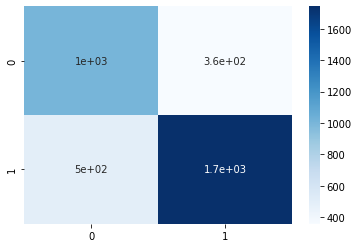

In [ ]:
import seaborn as sns
import sklearn
r2 = sklearn.metrics.confusion_matrix(y_predicted, data_test.maslow)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

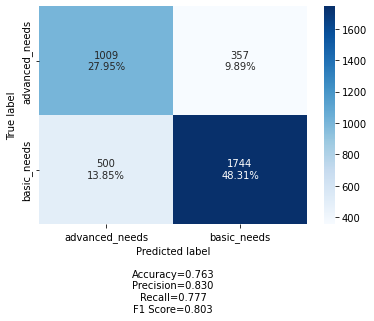

In [ ]:
import matplotlib.pyplot as plt
number = [0,1]
category = ['advanced_needs','basic_needs']
make_confusion_matrix(r2, group_names=number, categories=category, cmap='Blues')

In [ ]:
def get_mistakes(prediction_values, actual_values, test_sentences, actual_category, predicted_category,samples_shown):
    # Make sure you Map catgory with the labels mapping as index. If label is 0 then the category index in the list should be 0
    count = 0
    correct_index = category.index(actual_category)
    incorrect_index = category.index(predicted_category)
    print('Text classified as ',category[incorrect_index]," but actual category is ",category[correct_index])
    for i in range(0,len(prediction_values)):
        if prediction_values[i] == incorrect_index and actual_values[i] == correct_index and count != samples_shown:
            print(str(i),test_sentences[i])
            count = count + 1

In [ ]:
get_mistakes(prediction_values = list(y_predicted),
             actual_values = list(data_test.maslow),
             test_sentences = list(data_test.sentence),
             actual_category = 'advanced_needs', 
             predicted_category = 'basic_needs',
             samples_shown = 10)

Text classified as  basic_needs  but actual category is  advanced_needs
0 john forgot he had a gig after workhe already promised to his wife to go shopping with herhe had to call her and cancel
2 melba went to spend the night at her friend christines housethe two girls got along well up until bedtimechristine wanted to finish reading a book rather than visiting
15 yesterday i took a bottle of iced coffee outsidei packed it in a shoulder bag with a booki sat on a bench read and drank
17 my girlfriend planned a picnic for us last weekend
20 the man turned on the ovenhe opened itthe oven was not hothe checked the elements
21 levi spilled coffee on his shortshe took off his shortshe put his shorts in the sinkhe washed the shorts by hand
22 charles ran out of clean clothes to wearhe put all of his dirty clothes in a bag
43 tim was home alone
60 jerry went fishing last sundayhe caught a lot of catfish but one snapped his pole in halfjerry went to the store to buy a new fishing polejerry came

In [ ]:
get_mistakes(prediction_values = list(y_predicted),
             actual_values = list(data_test.maslow),
             test_sentences = list(data_test.sentence),
             actual_category = 'basic_needs', 
             predicted_category = 'advanced_needs',
             samples_shown = 10)

Text classified as  advanced_needs  but actual category is  basic_needs
3 i chewed my pen at my desk
32 tom was on vacationhim and his wife took several picturesunfortunately tom lost the memory cardsomeone else found it and posted it onlinetom was luckily able to get it back
109 tim had a local coffee shophe decided to have a bloghe posted a lot of personal informationmuch of it was unsavory and hurt his businesstim was forced to shut down shortly after
117 laura was really excited for her trip so she wanted to planshe was not sure exactly what to plan for so it was challengingshe looked around various websites and made herself a mental guideafter making a mental guide she asked me for input and i gave someafter a few days of planning she had the trip completely planned
121 tonedeaf melanie and her talented pal tried out for choir at schoolmelanie only mouthed the words while her friend sang aloudthe music teacher was impressed and accepted them into the choir
125 john loved working w

#### Ignore

In [ ]:
texts = input(str('input the text '))
x_val = tokenizer(
    text = texts,  
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = 'max_length',
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
)
validation = model.predict({'input_ids':x_val['input_ids'], 'attention_mask':x_val['attention_mask']})*100 
validation

input the text I am tired


array([[37.3986  , 10.790863, 97.73828 , 36.55313 , 39.555515]],
      dtype=float32)

In [ ]:
for key, value in zip(encoded_dict.keys(), validation[0]):
    print(key, value)

esteem 37.3986
love 10.790863
physiological 97.73828
spiritual growth 36.55313
stability 39.555515


In [ ]:
reddit_data = pd.read_excel('reddit_data_with_predictions.xlsx')
reddit_data = reddit_data[['sentence']]

In [ ]:
df_cleaned = text_preprocessing(reddit_data,'sentence')

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
df_cleaned['num_words'] = df_cleaned.sentence.apply(lambda x:len(x.split()))

In [ ]:
df_cleaned

,sentence,num_words
0,it feels like everyone else is passing me by a...,87
1,i do not know why but no matter what i do life...,79
2,recently i have been having obsessive thoughts...,417
3,he hides it from his friends whom he plays gam...,55
4,hello i have 22f struggled with my mental heal...,304
5,i fucked up and i need help apologizing to som...,70
6,i have just lost all my friends and i feel lik...,39
7,hello i am looking for support or just anyone ...,599
8,hey my friend has been struggling with a lot o...,69
9,everyday feels the same and i am distancing my...,136


In [ ]:
df_cleaned.num_words.max()

2608

In [ ]:
x_test = tokenizer(
    text = df_cleaned.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.49946058, 0.28485987, 0.04956754, 0.8316566 , 0.35192734],
      dtype=float32)

In [ ]:
predicted_raw[0][0]

0.49946058

In [ ]:
#y_predicted = np.argmax(predicted_raw[0])
#y_predicted
predicted_raw.shape

(49, 5)

In [ ]:
#'esteem':0, 'love':1,'physiological':2, 'spiritual growth':3, 'stability':4
category = ['esteem','love','physiological','spiritual growth','stability']
#category[y_predicted]

In [ ]:
df_cleaned.iloc[0][2]

'nan'

In [ ]:
predicted_raw[0][0]

0.49946058

In [ ]:
for i in category:
    df_cleaned[i] = 0

lis_esteem = []
lis_love = []
lis_physiological = []
lis_spiritual_growth = []
lis_stability = []

for i in range(len(predicted_raw)):
    lis_esteem.append(predicted_raw[i][0])
    lis_love.append(predicted_raw[i][1])
    lis_physiological.append(predicted_raw[i][2])
    lis_spiritual_growth.append(predicted_raw[i][3])
    lis_stability.append(predicted_raw[i][4])

df_cleaned['esteem'] = lis_esteem
df_cleaned['love'] = lis_love
df_cleaned['physiological'] = lis_physiological
df_cleaned['spiritual growth'] = lis_spiritual_growth
df_cleaned['stability'] = lis_stability
df_cleaned.head()

,sentence,num_words,esteem,love,physiological,spiritual growth,stability
0,it feels like everyone else is passing me by a...,87,0.499461,0.284860,0.049568,0.831657,0.351927
1,i do not know why but no matter what i do life...,79,0.308282,0.822921,0.173641,0.231122,0.290237
2,recently i have been having obsessive thoughts...,417,0.789368,0.185453,0.053224,0.683334,0.367675
3,he hides it from his friends whom he plays gam...,55,0.624000,0.583039,0.084634,0.422246,0.511769
4,hello i have 22f struggled with my mental heal...,304,0.477446,0.476595,0.095730,0.630944,0.310365


In [ ]:
from google.colab import files
df_cleaned.to_excel('reddit_data_with_predictions.xlsx')
files.download('reddit_data_with_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile

In [ ]:
!unzip file_location